<h3>Library Imports</h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MaxAbsScaler
import chemprop
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<h3>Data Import</h3>

In [2]:
df = pd.read_csv("updatedPK.csv")
df.head()

mol Cmpd Name      AUC  \
0  Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...  JSF-3131  15052.0   
1  Clc1c2c([nH]c(C(=O)NNC(=O)c3oc([N+](=O)[O-])cc...  JSF-3266  33043.0   
2  Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...  JSF-3263   2592.0   
3  Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...  JSF-3269  75175.0   
4  Brc1cc2c(Cl)c(C(=O)NNC(=O)c3oc([N+](=O)[O-])cc...  JSF-3271      2.0   

        apol  ast_fraglike  ast_fraglike_ext  ast_violation  \
0  42.364346             0                 0              2   
1  42.744343             0                 0              2   
2  46.259930             0                 0              2   
3  43.877552             0                 0              2   
4  43.614346             0                 0              2   

   ast_violation_ext  a_acc  a_acid  ...  vsa_acid  vsa_base    vsa_don  \
0                  3      2       0  ...       0.0       0.0  18.842079   
1                  3      2       0  ...       0.0       0.0  24.524654   
2                  3      3       0  ...       0.0       0.0  18.842079   
3                  3      2       0  ...       0.0       0.0  18.842079   
4                  3      2       0  ...       0.0       0.0  24.524654   

     vsa_hyd  vsa_other    vsa_pol     Weight  weinerPath  weinerPol  zagreb  
0  163.31906   83.74192  45.975922  365.75299        1489         36     126  
1  166.88153   83.74192  51.658497  383.14700        1693         37     132  
2  191.62750   83.74192  48.479675  395.77899        1872         40     136  
3  181.61226   83.74192  45.975922  400.19800        1668         38     132  
4  178.65691   83.74192  51.658497  427.59799        1667         38     132  

[5 rows x 209 columns]

In [3]:
conditions = [(df['AUC']>=1000),(df['AUC']<1000)]
values = [1,0]
df['Active'] = np.select(conditions, values)
df

mol Cmpd Name      AUC  \
0    Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...  JSF-3131  15052.0   
1    Clc1c2c([nH]c(C(=O)NNC(=O)c3oc([N+](=O)[O-])cc...  JSF-3266  33043.0   
2    Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...  JSF-3263   2592.0   
3    Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...  JSF-3269  75175.0   
4    Brc1cc2c(Cl)c(C(=O)NNC(=O)c3oc([N+](=O)[O-])cc...  JSF-3271      2.0   
..                                                 ...       ...      ...   
185  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C3)CCSCC4)[nH...      4700    102.0   
186                  S(=O)(=O)(Nc1nc2[nH]ncc2cn1)CCCCF      4710    168.0   
187  Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(C(=O)NCCC)CC2...      4715   4559.0   
188  Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(C(=O)NCCOCc3c...      4784    128.0   
189  Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(C(=O)NCCOC)CC...      4785   2901.0   

          apol  ast_fraglike  ast_fraglike_ext  ast_violation  \
0    42.364346             0                 0              2   
1    42.744343             0                 0              2   
2    46.259930             0                 0              2   
3    43.877552             0                 0              2   
4    43.614346             0                 0              2   
..         ...           ...               ...            ...   
185  67.802994             0                 0              2   
186  34.402515             0                 0              2   
187  66.919617             0                 0              2   
188  80.948792             0                 0              3   
189  67.721619             0                 0              3   

     ast_violation_ext  a_acc  a_acid  ...  vsa_base    vsa_don    vsa_hyd  \
0                    3      2       0  ...       0.0  18.842079  163.31906   
1                    3      2       0  ...       0.0  24.524654  166.88153   
2                    3      3       0  ...       0.0  18.842079  191.62750   
3                    3      2       0  ...       0.0  18.842079  181.61226   
4                    3      2       0  ...       0.0  24.524654  178.65691   
..                 ...    ...     ...  ...       ...        ...        ...   
185                  3      3       0  ...       0.0  13.757783  307.70538   
186                  4      6       0  ...       0.0   8.075207  126.73853   
187                  3      3       0  ...       0.0  11.365152  338.28323   
188                  4      4       0  ...       0.0  11.365152  418.43423   
189                  4      4       0  ...       0.0  11.365152  350.78320   

     vsa_other    vsa_pol     Weight  weinerPath  weinerPol  zagreb  Active  
0    83.741920  45.975922  365.75299        1489         36     126       1  
1    83.741920  51.658497  383.14700        1693         37     132       1  
2    83.741920  48.479675  395.77899        1872         40     136       1  
3    83.741920  45.975922  400.19800        1668         38     132       1  
4    83.741920  51.658497  427.59799        1667         38     132       0  
..         ...        ...        ...         ...        ...     ...     ...  
185  23.055140  59.341228  435.61301        2478         45     160       0  
186  36.977745  70.298958  273.29199         669         22      90       0  
187  25.899061  41.002750  444.93399        3026         49     156       1  
188  25.899061  43.506508  537.03101        5892         58     192       0  
189  25.899061  43.506508  460.93298        3363         50     160       1  

[190 rows x 210 columns]

<h3>Missing and Duplicates Check</h3>

In [4]:
df.isna().sum().sort_values(ascending=False)
#Although Cmpd Name has 23 missing values, it does not contribute to the model so we can ignore that.

Cmpd Name        23
PEOE_VSA-4        0
PEOE_VSA-6        0
PEOE_VSA_FHYD     0
PEOE_VSA_FNEG     0
                 ..
GCUT_SLOGP_1      0
GCUT_SLOGP_2      0
GCUT_SLOGP_3      0
GCUT_SMR_0        0
Active            0
Length: 210, dtype: int64

In [5]:
df['mol'].duplicated().sum()
#There are no duplicate molecules

0

<h3>Balance Check</h3>

In [6]:
df['Active'].value_counts()

1    96
0    94
Name: Active, dtype: int64

<h3>Data Processing</h3>

In [7]:
#Chemprop only needs the smiles on the first the column and all the properties to predict in subsequent columns(since it can
#predict more than property at the same time)
#Although instead of modifying the dataframe, you can also mention in chemprop which column has the smiles and which column
#has the property to predict
newdf = df[['mol','Active']]
newdf

mol  Active
0    Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...       1
1    Clc1c2c([nH]c(C(=O)NNC(=O)c3oc([N+](=O)[O-])cc...       1
2    Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...       1
3    Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...       1
4    Brc1cc2c(Cl)c(C(=O)NNC(=O)c3oc([N+](=O)[O-])cc...       0
..                                                 ...     ...
185  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C3)CCSCC4)[nH...       0
186                  S(=O)(=O)(Nc1nc2[nH]ncc2cn1)CCCCF       0
187  Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(C(=O)NCCC)CC2...       1
188  Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(C(=O)NCCOCc3c...       0
189  Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(C(=O)NCCOC)CC...       1

[190 rows x 2 columns]

In [17]:
newdf.to_csv('fulldf.csv',index=False)

In [8]:
y = df[['Active']]

In [9]:
train, test = train_test_split(newdf ,stratify=y, test_size=0.20, random_state=42)

In [10]:
train['Active'].value_counts()

1    77
0    75
Name: Active, dtype: int64

In [11]:
test['Active'].value_counts()

1    19
0    19
Name: Active, dtype: int64

In [12]:
testmol=test[['mol']]
testmol.head()

mol
43   Clc1ccc(-c2cc3c([nH]c(C(=O)NNC(=O)c4oc([N+](=O...
125  O=[N+]([O-])c1oc(C(=O)N2CCN(C(=O)c3ccc(COc4ccc...
5    O=[N+]([O-])c1oc(C(=O)NNC(=O)c2[nH]c3c(c2)cc(-...
186                  S(=O)(=O)(Nc1nc2[nH]ncc2cn1)CCCCF
121         S(=O)(=O)(Nc1cc2c(C)n[nH]c2cc1)CCCC(F)(F)F

In [13]:
test_actuals = test[['Active']]
test_actuals.head()

Active
43        1
125       0
5         0
186       0
121       1

In [14]:
#Chemprop needs training data in a csv form, so it is necessary to convert them
testmol.to_csv('test.csv',index=False)
train.to_csv('train.csv',index=False)

<h3>MPN without rdkit</h3>

In [14]:
parameters_opt = ['--data_path','train.csv', #location of the training data
                  '--dataset_type','classification', #Can also do regression, multiclass and spectra
                  '--loss_function','binary_cross_entropy', #Various loss functions available, since it's a binary classification I use binary cross entropy
                  '--num_folds','1', #Number of k-folds to do
                  '--extra_metrics','f1', #Other metrics to also calculate
                  '--metric','binary_cross_entropy', # The main metric used by Chemprop to optimize the training to minimize loss or maxmize accuracy depending on the metric used
                  '--epochs','100', #How many epochs to run
                  '--batch_size','16', #Default is 100 but I would increase in powers of 2
                  '--num_iters','10', # How many iterations of hyperparameter optimzations to run
                 # '--split_type','scaffold_balanced', 
                  '--class_balance', # Using this ensures balanced class is used for for batches, do not need if data is balanced already
                # '--features_generator','rdkit_2d', # Adds 2d rdkit features to the training aswell. Can also add morgan fingerprints
                 #'--no_features_scaling', # rdkit features are already scaled and normalized, can use this line if we need to use unscaled and unnormalized features instead
                  '--config_save_path','saveparam', # Save location of the best parameters
                 # '--seed','42',
                  '--num_workers','10' # How many CPUs to use
                 ]

[1, 2, 3, 4, 5, 6]

n_folds = 2

[1, 2, 3] / [4, 5, 6]
itr 1: trn = [4, 5, 6], val = [1, 2, 3]
itr 2: trn = [1, 2, 3], val = [4, 5, 6]

n_folds = 1

[1, 2, 3, 4, 5, 6]

itr 1: trn = [1, 2, 3, 4, 5, 6], val = []

In [15]:
#Hyperparameter optimization that is built into chemprop can only optimize ffn_hidden_layers, ffn_hidden_size, depth and dropout 
hyp = chemprop.hyperparameter_optimization.hyperopt(args=chemprop.args.HyperoptArgs().parse_args(parameters_opt))

Creating search space using parameters ['ffn_num_layers', 'depth', 'linked_hidden_size', 'dropout'].
No manual trials loaded as part of hyperparameter search
Initiating trial with seed 0
Loaded 0 previous trials
Parameters assigned with random search, 10 random trials remaining



  0%|                                                                            | 0/1 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':



Validation binary_cross_entropy = 0.682163

Validation f1 = 0.666667

  2%|#6                                                                                | 2/100 [00:08<06:40,  4.08s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.93it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.89it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.88it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.95it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.86it/s]

Loss = 6.7573e-01, PNorm = 61.4031, GNorm = 0.6972, lr_0 = 9.7678e-04

 


 43%|####################################                                                | 3/7 [00:01<00:02,  1.64it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.68it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.71it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.56it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.60it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.09it/s]


Validation binary_cross_entropy = 0.648925

Validation f1 = 0.545455

  8%|######5                                                                    


100%|####################################################################################| 7/7 [00:03<00:00,  1.83it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.51it/s]


Validation binary_cross_entropy = 0.731113

Validation f1 = 0.461538

 13%|##########5                                                                      | 13/100 [00:56<06:09,  4.25s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.82it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.67it/s]

 43%|####################################                             


Epoch 18

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.78it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.67it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.66it/s]

Loss = 3.0305e-01, PNorm = 63.6293, GNorm = 1.0168, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:02<00:01,  1.68it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.67it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.70it/s]

100%|##################################################################


 57%|################################################                                    | 4/7 [00:02<00:01,  1.55it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.64it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.51it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.51it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.10it/s]


Validation binary_cross_entropy = 0.536217

Validation f1 = 0.800000

 24%|###################4                                                             | 24/100 [01:47<05:52,  4.64s/it]

Epoch 24

  0%|                                                                 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.99it/s]


Validation binary_cross_entropy = 0.594025

Validation f1 = 0.857143

 29%|#######################4                                                         | 29/100 [02:10<05:24,  4.57s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.69it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.89it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.78it/s]

 57%|################################################                 


 14%|############                                                                        | 1/7 [00:00<00:04,  1.40it/s]

Loss = 2.2779e-02, PNorm = 65.2090, GNorm = 0.6243, lr_0 = 4.6676e-04

 29%|########################                                                            | 2/7 [00:01<00:03,  1.38it/s]

 43%|####################################                                                | 3/7 [00:02<00:02,  1.50it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.58it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.60it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.63it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.63it/s]


  0%|                                                                           


 71%|############################################################                        | 5/7 [00:03<00:01,  1.64it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.60it/s]

Loss = 2.5663e-02, PNorm = 65.5084, GNorm = 0.0511, lr_0 = 4.0812e-04

100%|####################################################################################| 7/7 [00:04<00:00,  1.62it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.34it/s]


Validation binary_cross_entropy = 0.859121

Validation f1 = 0.750000

 40%|################################4                                                | 40/100 [02:59<04:30,  4.50s/it]

Epoch 40

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



100%|####################################################################################| 1/1 [00:00<00:00,  7.00it/s]


Validation binary_cross_entropy = 0.873018

Validation f1 = 0.750000

 45%|####################################4                                            | 45/100 [03:21<04:04,  4.45s/it]

Epoch 45

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.63it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.71it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.70it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.61it/s]

Loss = 7.7669e-03, PNorm = 65.7211, GNorm = 0.4147, lr_0 = 3.5684e-04



 14%|############                                                                        | 1/7 [00:00<00:03,  1.68it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.73it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.76it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.69it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.52it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.53it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.54it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|##########################

 71%|############################################################                        | 5/7 [00:03<00:01,  1.56it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.59it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.66it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.81it/s]


Validation binary_cross_entropy = 0.938913

Validation f1 = 0.750000

 56%|#############################################3                                   | 56/100 [04:10<03:14,  4.41s/it]

Epoch 56

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                      



Validation binary_cross_entropy = 1.067416

Validation f1 = 0.750000

 61%|#################################################4                               | 61/100 [04:31<02:43,  4.20s/it]

Epoch 61

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.57it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.74it/s]

Loss = 7.2927e-04, PNorm = 65.8531, GNorm = 0.0399, lr_0 = 2.4668e-04

 43%|####################################                                                | 3/7 [00:01<00:02,  1.71it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.81it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.74it/s]



 29%|########################                                                            | 2/7 [00:01<00:03,  1.55it/s]

 43%|####################################                                                | 3/7 [00:02<00:02,  1.48it/s]

 57%|################################################                                    | 4/7 [00:02<00:02,  1.49it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.55it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.58it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.55it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.54it/s]


Validation binary_cross_entrop


 86%|########################################################################            | 6/7 [00:03<00:00,  1.55it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.49it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.21it/s]


Validation binary_cross_entropy = 1.021841

Validation f1 = 0.800000

 72%|##########################################################3                      | 72/100 [05:23<02:12,  4.74s/it]

Epoch 72

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.80it/s]

 29%|########################                                         

Validation f1 = 0.769231

 77%|##############################################################3                  | 77/100 [05:45<01:44,  4.53s/it]

Epoch 77

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 1.6915e-03, PNorm = 65.9449, GNorm = 0.0497, lr_0 = 1.7052e-04

 14%|############                                                                        | 1/7 [00:00<00:03,  1.61it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.63it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.75it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.79it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.74it/s]

 86%|#########################################


 43%|####################################                                                | 3/7 [00:01<00:02,  1.83it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.87it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.92it/s]

Loss = 1.6895e-03, PNorm = 65.9977, GNorm = 0.0210, lr_0 = 1.4910e-04

 86%|########################################################################            | 6/7 [00:03<00:00,  1.89it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.92it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.27it/s]


Validation binary_cross_entropy = 1.100913

Validation f1 = 0.750000

 83%|####


100%|####################################################################################| 7/7 [00:03<00:00,  1.83it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.39it/s]


Validation binary_cross_entropy = 1.149756

Validation f1 = 0.750000

 88%|#######################################################################2         | 88/100 [06:29<00:48,  4.03s/it]

Epoch 88

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.91it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.88it/s]

 43%|####################################                             

 93%|###########################################################################3     | 93/100 [06:48<00:27,  3.99s/it]

Epoch 93

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.97it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.92it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.90it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.83it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.81it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.78it/s]

100%|#################


Loss = 5.8438e-04, PNorm = 66.0331, GNorm = 0.0016, lr_0 = 1.0307e-04

 57%|################################################                                    | 4/7 [00:02<00:01,  1.85it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.89it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.91it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.86it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.47it/s]


Validation binary_cross_entropy = 1.224257

Validation f1 = 0.750000

 99%|################################################################################1| 99/100 [07:12<00:03,  3.97s/it]

Epoch 99


100%|██████████████████████████████████████████████████| 1/1 [07:18<00:00, 438.12s/trial, best loss: 0.943448543548584]

Initiating trial with seed 1
Loaded 1 previous trials
Parameters assigned with random search, 9 random trials remaining




 50%|██████████████████████████████████████                                      | 1/2 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':

Validation f1 = 0.000000

  2%|#6                                                                                | 2/100 [00:04<03:23,  2.07s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.71it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  3.29it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.48it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.55it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.44it/s]

Loss = 6.9972e-01, PNorm = 67.6368, GNorm = 1.4402, lr_0 = 9.7678e-04

 86%|##########################################


100%|####################################################################################| 7/7 [00:02<00:00,  3.23it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.676058

Validation f1 = 0.666667

  8%|######5                                                                           | 8/100 [00:16<03:14,  2.12s/it]

Epoch 8

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.69it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  3.80it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.99it/s]

Loss = 5.5462e-01, PNorm = 68.2637, GNorm = 0.5982, lr_0 = 8.5406e-04




 57%|################################################                                    | 4/7 [00:01<00:01,  2.51it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  2.54it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.60it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.62it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.648926

Validation f1 = 0.400000

 14%|###########3                                                                     | 14/100 [00:30<03:25,  2.39s/it]

Epoch 14

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     

Epoch 19

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.40it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  3.59it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.51it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.48it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.57it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  3.35it/s]

Loss = 2.9452e-01, PNorm = 69.3225, GNorm = 0.8000, lr_0 = 6.5293e-04

100%|###################################################################



Validation binary_cross_entropy = 0.765087

Validation f1 = 0.533333

 25%|####################2                                                            | 25/100 [00:55<02:47,  2.23s/it]

Epoch 25

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.22it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  3.56it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.46it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.49it/s]

Loss = 2.8902e-01, PNorm = 69.7667, GNorm = 4.7717, lr_0 = 5.7090e-04

 71%|############################################################                        | 5/7 [00:01<00:00,  3.29it/s]



100%|####################################################################################| 7/7 [00:02<00:00,  3.43it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.771365

Validation f1 = 0.500000

 31%|#########################1                                                       | 31/100 [01:08<02:30,  2.18s/it]

Epoch 31

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.65it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  3.57it/s]

Loss = 1.5977e-01, PNorm = 70.1611, GNorm = 0.8188, lr_0 = 4.9917e-04

 43%|####################################                                                | 3/7 [00:00<00:01,  3.25it/s]



 57%|################################################                                    | 4/7 [00:01<00:00,  3.24it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.28it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  3.27it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  3.38it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.835889

Validation f1 = 0.500000

 37%|#############################9                                                   | 37/100 [01:21<02:18,  2.20s/it]

Epoch 37

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 1.6139e-01, PNorm = 70.5445, GNorm = 2.2150, lr_0 = 4.3646e-04



  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.61it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.76it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  3.04it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.14it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.06it/s]

Loss = 1.1053e-01, PNorm = 70.8736, GNorm = 2.2396, lr_0 = 3.8162e-04

 86%|########################################################################            | 6/7 [00:01<00:00,  3.19it/s]

100%|#############################################################################



Validation binary_cross_entropy = 0.938565

Validation f1 = 0.615385

 48%|######################################8                                          | 48/100 [01:46<01:54,  2.19s/it]

Epoch 48

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.42it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  3.41it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.51it/s]

Loss = 1.3588e-01, PNorm = 71.1054, GNorm = 2.7270, lr_0 = 3.3367e-04

 57%|################################################                                    | 4/7 [00:01<00:00,  3.35it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.45it/s]



100%|####################################################################################| 7/7 [00:02<00:00,  3.20it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.076443

Validation f1 = 0.500000

 54%|###########################################7                                     | 54/100 [01:59<01:40,  2.19s/it]

Epoch 54

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.82it/s]

Loss = 8.3636e-02, PNorm = 71.3129, GNorm = 1.8182, lr_0 = 2.9175e-04

 29%|########################                                                            | 2/7 [00:00<00:01,  4.00it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.95it/s]



 71%|############################################################                        | 5/7 [00:01<00:00,  3.28it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  3.16it/s]

Loss = 3.5602e-02, PNorm = 71.4429, GNorm = 0.3953, lr_0 = 2.5510e-04

100%|####################################################################################| 7/7 [00:02<00:00,  3.18it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.909532

Validation f1 = 0.666667

 60%|################################################6                                | 60/100 [02:12<01:30,  2.27s/it]

Epoch 60

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.67it/s]



 29%|########################                                                            | 2/7 [00:00<00:01,  3.41it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.52it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.58it/s]

Loss = 4.6719e-02, PNorm = 71.5425, GNorm = 1.4667, lr_0 = 2.2305e-04

 71%|############################################################                        | 5/7 [00:01<00:00,  3.16it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  3.27it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  3.42it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.934222

Validation f1 = 0.714286

 66%|#####

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.79it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.80it/s]

Loss = 1.1129e-02, PNorm = 71.6032, GNorm = 0.6512, lr_0 = 1.9502e-04

 43%|####################################                                                | 3/7 [00:01<00:01,  3.05it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.17it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.24it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  3.37it/s]

100%|#############################################################################


100%|####################################################################################| 1/1 [00:00<00:00,  8.04it/s]


Validation binary_cross_entropy = 0.955888

Validation f1 = 0.769231

 77%|##############################################################3                  | 77/100 [02:50<00:50,  2.21s/it]

Epoch 77

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 4.3549e-03, PNorm = 71.6566, GNorm = 0.1439, lr_0 = 1.7052e-04

 14%|############                                                                        | 1/7 [00:00<00:01,  3.19it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  3.37it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.52it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.11it/s]



Loss = 6.6132e-02, PNorm = 71.7037, GNorm = 3.5646, lr_0 = 1.4910e-04

 86%|########################################################################            | 6/7 [00:01<00:00,  3.48it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  3.11it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.949261

Validation f1 = 0.714286

 83%|###################################################################2             | 83/100 [03:03<00:37,  2.22s/it]

Epoch 83

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.94it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  3.42it/s]



Loss = 3.4117e-02, PNorm = 71.7487, GNorm = 0.1245, lr_0 = 1.3036e-04

 57%|################################################                                    | 4/7 [00:01<00:00,  3.13it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.30it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  3.50it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  3.33it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.954872

Validation f1 = 0.714286

 89%|########################################################################         | 89/100 [03:16<00:24,  2.19s/it]

Epoch 89

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



Loss = 3.7460e-02, PNorm = 71.7816, GNorm = 1.6189, lr_0 = 1.1399e-04

 29%|########################                                                            | 2/7 [00:00<00:01,  3.35it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.23it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.23it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.32it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  3.17it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  3.22it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.946078

Validation f1 = 0.714286

 95%|#####

Validation f1 = 0.714286

100%|################################################################################| 100/100 [03:40<00:00,  2.22s/it]

100%|################################################################################| 100/100 [03:40<00:00,  2.21s/it]
Model 0 best validation binary_cross_entropy = 0.626176 on epoch 14

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".

Loading pretrained parameter "encoder.encoder.0.W_i.weight".

Loading pretrained parameter "encoder.encoder.0.W_h.weight".

Loading pretrained parameter "encoder.encoder.0.W_o.weight".

Loading pretrained parameter "encoder.encoder.0.W_o.bias".

Loading pretrained parameter "ffn.1.weight".

Loading pretrained parameter "ffn.1.bias".

Loading pretrained parameter "ffn.4.weight".

Loading pretrained parameter "ffn.4.bias".

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Model 0 test binary_cross_entropy = 0.590003



100%|██████████████████████████████████████████████████| 2/2 [03:41<00:00, 221.58s/trial, best loss: 0.590003490447998]

Initiating trial with seed 2
Loaded 2 previous trials
Parameters assigned with random search, 8 random trials remaining




 67%|██████████████████████████████████████████████████▋                         | 2/3 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':


100%|####################################################################################| 1/1 [00:00<00:00,  7.92it/s]


Validation binary_cross_entropy = 0.638997

Validation f1 = 0.769231

  2%|#6                                                                                | 2/100 [00:07<06:30,  3.98s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.99it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.85it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.86it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.82it/s]

 71%|############################################################       


 29%|########################                                                            | 2/7 [00:01<00:02,  1.91it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.93it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.89it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.87it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.87it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.80it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.58it/s]


Validation binary_cross_entro

 86%|########################################################################            | 6/7 [00:03<00:00,  1.89it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.87it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.16it/s]


Validation binary_cross_entropy = 0.671829

Validation f1 = 0.666667

 13%|##########5                                                                      | 13/100 [00:51<05:41,  3.93s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.06it/s]

 29%|########################                                          

Validation f1 = 0.500000

 18%|##############5                                                                  | 18/100 [01:12<05:42,  4.18s/it]

Epoch 18

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.93it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.82it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.80it/s]

Loss = 3.4692e-01, PNorm = 61.4735, GNorm = 1.1647, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:02<00:01,  1.75it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.82it/s]

 86%|#########################################


 43%|####################################                                                | 3/7 [00:01<00:02,  1.82it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.76it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.83it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.80it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.84it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.82it/s]


Validation binary_cross_entropy = 0.634200

Validation f1 = 0.545455

 24%|###################4                                                       


100%|####################################################################################| 7/7 [00:03<00:00,  1.87it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.08it/s]


Validation binary_cross_entropy = 0.663388

Validation f1 = 0.500000

 29%|#######################4                                                         | 29/100 [01:57<04:46,  4.03s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.81it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.80it/s]

 43%|####################################                             


Epoch 34

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.77it/s]

Loss = 1.4008e-01, PNorm = 62.8941, GNorm = 4.3102, lr_0 = 4.6676e-04

 29%|########################                                                            | 2/7 [00:01<00:02,  1.73it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.73it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.72it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.74it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.78it/s]

100%|##################################################################


 57%|################################################                                    | 4/7 [00:02<00:01,  1.77it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.79it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.78it/s]

Loss = 9.4487e-02, PNorm = 63.3629, GNorm = 1.6337, lr_0 = 4.0812e-04

100%|####################################################################################| 7/7 [00:03<00:00,  1.78it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.76it/s]


Validation binary_cross_entropy = 0.642192

Validation f1 = 0.769231

 40%|################################4                                                | 40/100 [02:42<04:04,  4.08s/it]

Epoch 40




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.64it/s]


Validation binary_cross_entropy = 0.849614

Validation f1 = 0.714286

 45%|####################################4                                            | 45/100 [03:02<03:42,  4.05s/it]

Epoch 45

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.85it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.87it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.77it/s]

 57%|################################################                 

Epoch 50

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.78it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.81it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.85it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.87it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.82it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.80it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.78it/s]


  0%|                


Loss = 2.5066e-02, PNorm = 63.9093, GNorm = 0.5980, lr_0 = 2.8212e-04

 71%|############################################################                        | 5/7 [00:02<00:01,  1.85it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.86it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.86it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.75it/s]


Validation binary_cross_entropy = 1.043684

Validation f1 = 0.615385

 56%|#############################################3                                   | 56/100 [03:47<02:58,  4.05s/it]

Epoch 56

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



100%|####################################################################################| 1/1 [00:00<00:00,  6.63it/s]


Validation binary_cross_entropy = 1.103845

Validation f1 = 0.750000

 61%|#################################################4                               | 61/100 [04:08<02:42,  4.16s/it]

Epoch 61

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.94it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.93it/s]

Loss = 6.7587e-03, PNorm = 64.0004, GNorm = 0.0825, lr_0 = 2.4668e-04

 43%|####################################                                                | 3/7 [00:01<00:02,  1.70it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.73it/s]



 14%|############                                                                        | 1/7 [00:00<00:03,  1.97it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.84it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.72it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.68it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.71it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.76it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.72it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|##########################


 71%|############################################################                        | 5/7 [00:02<00:01,  1.90it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.85it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.77it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.11it/s]


Validation binary_cross_entropy = 1.116391

Validation f1 = 0.769231

 72%|##########################################################3                      | 72/100 [04:54<01:55,  4.14s/it]

Epoch 72

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     



Validation binary_cross_entropy = 1.054288

Validation f1 = 0.666667

 77%|##############################################################3                  | 77/100 [05:16<01:40,  4.35s/it]

Epoch 77

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 2.7492e-04, PNorm = 64.1405, GNorm = 0.0067, lr_0 = 1.7052e-04

 14%|############                                                                        | 1/7 [00:00<00:05,  1.19it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.30it/s]

 43%|####################################                                                | 3/7 [00:02<00:02,  1.34it/s]

 57%|################################################                                    | 4/7 [00:02<00:02,  1.38it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.39it/s]



 29%|########################                                                            | 2/7 [00:01<00:02,  1.85it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.80it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.77it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.81it/s]

Loss = 1.7690e-03, PNorm = 64.1668, GNorm = 0.0584, lr_0 = 1.4910e-04

 86%|########################################################################            | 6/7 [00:03<00:00,  1.83it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.83it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|############################################################################


 86%|########################################################################            | 6/7 [00:03<00:00,  1.77it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.84it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.27it/s]


Validation binary_cross_entropy = 1.240987

Validation f1 = 0.666667

 88%|#######################################################################2         | 88/100 [06:02<00:48,  4.06s/it]

Epoch 88

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.78it/s]

 29%|########################                                         



Validation binary_cross_entropy = 1.253114

Validation f1 = 0.666667

 93%|###########################################################################3     | 93/100 [06:23<00:28,  4.12s/it]

Epoch 93

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.98it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.90it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.93it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.90it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.69it/s]

 86%|##################################################################


 43%|####################################                                                | 3/7 [00:01<00:02,  1.66it/s]

Loss = 1.7521e-03, PNorm = 64.2015, GNorm = 0.0017, lr_0 = 1.0307e-04

 57%|################################################                                    | 4/7 [00:02<00:01,  1.67it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.70it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.80it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.79it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.47it/s]


Validation binary_cross_entropy = 1.289422

Validation f1 = 0.666667

 99%|####

100%|██████████████████████████████████████████████████| 3/3 [06:52<00:00, 412.73s/trial, best loss: 0.590003490447998]

Initiating trial with seed 3
Loaded 3 previous trials
Parameters assigned with random search, 7 random trials remaining




 75%|█████████████████████████████████████████████████████████                   | 3/4 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':


100%|####################################################################################| 1/1 [00:00<00:00,  4.42it/s]


Validation binary_cross_entropy = 0.748660

Validation f1 = 0.636364

  2%|#6                                                                                | 2/100 [00:13<11:16,  6.90s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:05,  1.13it/s]

 29%|########################                                                            | 2/7 [00:01<00:04,  1.12it/s]

 43%|####################################                                                | 3/7 [00:02<00:03,  1.09it/s]

 57%|################################################                                    | 4/7 [00:03<00:02,  1.14it/s]

 71%|############################################################       


 29%|########################                                                            | 2/7 [00:01<00:04,  1.09it/s]

 43%|####################################                                                | 3/7 [00:02<00:03,  1.11it/s]

 57%|################################################                                    | 4/7 [00:03<00:02,  1.12it/s]

 71%|############################################################                        | 5/7 [00:04<00:01,  1.12it/s]

 86%|########################################################################            | 6/7 [00:05<00:00,  1.06it/s]

100%|####################################################################################| 7/7 [00:06<00:00,  1.03it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  4.26it/s]


Validation binary_cross_entro

 86%|########################################################################            | 6/7 [00:05<00:00,  1.09it/s]

100%|####################################################################################| 7/7 [00:06<00:00,  1.08it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  4.33it/s]


Validation binary_cross_entropy = 0.708003

Validation f1 = 0.666667

 13%|##########5                                                                      | 13/100 [01:28<09:47,  6.75s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:05,  1.07it/s]

 29%|########################                                          

Validation f1 = 0.615385

 18%|##############5                                                                  | 18/100 [02:02<09:10,  6.71s/it]

Epoch 18

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:05,  1.10it/s]

 29%|########################                                                            | 2/7 [00:01<00:04,  1.08it/s]

 43%|####################################                                                | 3/7 [00:02<00:03,  1.09it/s]

Loss = 2.0244e-01, PNorm = 86.2948, GNorm = 0.6055, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:03<00:02,  1.08it/s]

 71%|############################################################                        | 5/7 [00:04<00:01,  1.10it/s]

 86%|#########################################


 43%|####################################                                                | 3/7 [00:02<00:03,  1.16it/s]

 57%|################################################                                    | 4/7 [00:03<00:02,  1.13it/s]

 71%|############################################################                        | 5/7 [00:04<00:01,  1.19it/s]

 86%|########################################################################            | 6/7 [00:05<00:00,  1.19it/s]

100%|####################################################################################| 7/7 [00:05<00:00,  1.21it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  4.71it/s]


Validation binary_cross_entropy = 0.640428

Validation f1 = 0.714286

 24%|###################4                                                       


100%|####################################################################################| 7/7 [00:06<00:00,  1.16it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  4.46it/s]


Validation binary_cross_entropy = 1.087178

Validation f1 = 0.615385

 29%|#######################4                                                         | 29/100 [03:13<07:35,  6.42s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.21it/s]

 29%|########################                                                            | 2/7 [00:01<00:04,  1.23it/s]

 43%|####################################                             


Epoch 34

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:05,  1.10it/s]

Loss = 1.2545e-02, PNorm = 87.8452, GNorm = 0.8773, lr_0 = 4.6676e-04

 29%|########################                                                            | 2/7 [00:01<00:04,  1.03it/s]

 43%|####################################                                                | 3/7 [00:02<00:03,  1.08it/s]

 57%|################################################                                    | 4/7 [00:03<00:02,  1.11it/s]

 71%|############################################################                        | 5/7 [00:04<00:01,  1.13it/s]

 86%|########################################################################            | 6/7 [00:05<00:00,  1.13it/s]

100%|##################################################################


 57%|################################################                                    | 4/7 [00:03<00:02,  1.05it/s]

 71%|############################################################                        | 5/7 [00:04<00:01,  1.02it/s]

 86%|########################################################################            | 6/7 [00:05<00:01,  1.00s/it]

Loss = 4.5031e-03, PNorm = 87.9765, GNorm = 0.1277, lr_0 = 4.0812e-04

100%|####################################################################################| 7/7 [00:06<00:00,  1.04it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  4.64it/s]


Validation binary_cross_entropy = 1.459240

Validation f1 = 0.714286

 40%|################################4                                                | 40/100 [04:24<06:45,  6.75s/it]

Epoch 40




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  4.40it/s]


Validation binary_cross_entropy = 1.394333

Validation f1 = 0.750000

 45%|####################################4                                            | 45/100 [04:58<06:13,  6.80s/it]

Epoch 45

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:05,  1.12it/s]

 29%|########################                                                            | 2/7 [00:01<00:04,  1.07it/s]

 43%|####################################                                                | 3/7 [00:02<00:03,  1.07it/s]

 57%|################################################                 

Epoch 50

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:05,  1.09it/s]

 29%|########################                                                            | 2/7 [00:01<00:04,  1.11it/s]

 43%|####################################                                                | 3/7 [00:02<00:03,  1.09it/s]

 57%|################################################                                    | 4/7 [00:03<00:02,  1.08it/s]

 71%|############################################################                        | 5/7 [00:04<00:01,  1.07it/s]

 86%|########################################################################            | 6/7 [00:05<00:00,  1.09it/s]

100%|####################################################################################| 7/7 [00:06<00:00,  1.10it/s]


  0%|                


Loss = 3.3048e-04, PNorm = 88.1332, GNorm = 0.0048, lr_0 = 2.8212e-04

 71%|############################################################                        | 5/7 [00:04<00:01,  1.15it/s]

 86%|########################################################################            | 6/7 [00:05<00:00,  1.14it/s]

100%|####################################################################################| 7/7 [00:06<00:00,  1.14it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.68it/s]


Validation binary_cross_entropy = 1.592058

Validation f1 = 0.750000

 56%|#############################################3                                   | 56/100 [06:13<04:56,  6.74s/it]

Epoch 56

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



100%|####################################################################################| 1/1 [00:00<00:00,  4.63it/s]


Validation binary_cross_entropy = 1.675111

Validation f1 = 0.750000

 61%|#################################################4                               | 61/100 [06:46<04:23,  6.77s/it]

Epoch 61

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:05,  1.14it/s]

 29%|########################                                                            | 2/7 [00:01<00:04,  1.12it/s]

Loss = 1.1957e-04, PNorm = 88.1509, GNorm = 0.0056, lr_0 = 2.4668e-04

 43%|####################################                                                | 3/7 [00:02<00:03,  1.08it/s]

 57%|################################################                                    | 4/7 [00:03<00:02,  1.10it/s]



 14%|############                                                                        | 1/7 [00:01<00:06,  1.15s/it]

 29%|########################                                                            | 2/7 [00:02<00:05,  1.11s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.16s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.21s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.22s/it]

 86%|########################################################################            | 6/7 [00:07<00:01,  1.19s/it]

100%|####################################################################################| 7/7 [00:08<00:00,  1.27s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|##########################


 71%|############################################################                        | 5/7 [00:05<00:02,  1.09s/it]

 86%|########################################################################            | 6/7 [00:06<00:01,  1.06s/it]

100%|####################################################################################| 7/7 [00:07<00:00,  1.02s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.62it/s]


Validation binary_cross_entropy = 1.770668

Validation f1 = 0.800000

 72%|##########################################################3                      | 72/100 [08:16<03:41,  7.93s/it]

Epoch 72

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     



Validation binary_cross_entropy = 1.856271

Validation f1 = 0.800000

 77%|##############################################################3                  | 77/100 [08:55<03:00,  7.84s/it]

Epoch 77

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 6.7910e-05, PNorm = 88.1852, GNorm = 0.0034, lr_0 = 1.7052e-04

 14%|############                                                                        | 1/7 [00:01<00:06,  1.12s/it]

 29%|########################                                                            | 2/7 [00:02<00:05,  1.08s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.06s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.06s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.05s/it]



 29%|########################                                                            | 2/7 [00:02<00:05,  1.13s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.17s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.15s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.13s/it]

Loss = 4.7687e-05, PNorm = 88.1928, GNorm = 0.0009, lr_0 = 1.4910e-04

 86%|########################################################################            | 6/7 [00:06<00:01,  1.08s/it]

100%|####################################################################################| 7/7 [00:07<00:00,  1.07s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|############################################################################


 86%|########################################################################            | 6/7 [00:07<00:01,  1.26s/it]

100%|####################################################################################| 7/7 [00:08<00:00,  1.22s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.07it/s]


Validation binary_cross_entropy = 1.960577

Validation f1 = 0.714286

 88%|#######################################################################2         | 88/100 [10:26<01:37,  8.16s/it]

Epoch 88

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:07,  1.25s/it]

 29%|########################                                         



Validation binary_cross_entropy = 2.057985

Validation f1 = 0.800000

 93%|###########################################################################3     | 93/100 [11:11<01:02,  8.95s/it]

Epoch 93

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:07,  1.24s/it]

 29%|########################                                                            | 2/7 [00:02<00:06,  1.23s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.22s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.21s/it]

 71%|############################################################                        | 5/7 [00:06<00:02,  1.26s/it]

 86%|##################################################################


 43%|####################################                                                | 3/7 [00:03<00:04,  1.09s/it]

Loss = 3.5039e-05, PNorm = 88.2061, GNorm = 0.0000, lr_0 = 1.0307e-04

 57%|################################################                                    | 4/7 [00:04<00:03,  1.09s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.08s/it]

 86%|########################################################################            | 6/7 [00:06<00:01,  1.06s/it]

100%|####################################################################################| 7/7 [00:07<00:00,  1.05s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  4.02it/s]


Validation binary_cross_entropy = 2.107907

Validation f1 = 0.800000

 99%|####

100%|█████████████████████████████████████████████████| 4/4 [12:13<00:00, 733.28s/trial, best loss: 0.5702540278434753]

Initiating trial with seed 4
Loaded 4 previous trials
Parameters assigned with random search, 6 random trials remaining




 80%|████████████████████████████████████████████████████████████▊               | 4/5 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':

  2%|#6                                                                                | 2/100 [00:03<02:58,  1.83s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  4.26it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.06it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.20it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.23it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  4.05it/s]

Loss = 6.5822e-01, PNorm = 49.1947, GNorm = 2.4905, lr_0 = 9.7678e-04

 86%|####################################################################



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.652228

Validation f1 = 0.400000

  8%|######5                                                                           | 8/100 [00:14<02:37,  1.71s/it]

Epoch 8

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.63it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  3.64it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.74it/s]

Loss = 5.5708e-01, PNorm = 49.5321, GNorm = 1.4119, lr_0 = 8.5406e-04

 57%|################################################                                    | 4/7 [00:01<00:00,  3.96it/s]




 86%|########################################################################            | 6/7 [00:01<00:00,  4.32it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  4.19it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.594949

Validation f1 = 0.769231

 14%|###########3                                                                     | 14/100 [00:24<02:31,  1.76s/it]

Epoch 14

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  4.17it/s]

Loss = 3.4288e-01, PNorm = 49.9038, GNorm = 1.4856, lr_0 = 7.4675e-04

 29%|########################                                                            | 2/7 [00:00<00:01,  3.84it/s]



 57%|################################################                                    | 4/7 [00:01<00:00,  3.63it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.62it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  3.67it/s]

Loss = 3.2321e-01, PNorm = 50.3360, GNorm = 1.4812, lr_0 = 6.5293e-04

100%|####################################################################################| 7/7 [00:01<00:00,  3.87it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.638934

Validation f1 = 0.631579

 20%|################2                                                                | 20/100 [00:35<02:33,  1.92s/it]

Epoch 20

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



 14%|############                                                                        | 1/7 [00:00<00:01,  3.60it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.00it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.88it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.70it/s]

Loss = 1.5949e-01, PNorm = 50.6661, GNorm = 1.3959, lr_0 = 5.7090e-04

 71%|############################################################                        | 5/7 [00:01<00:00,  3.68it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  3.67it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  3.52it/s]


  0%|                                                                           

 31%|#########################1                                                       | 31/100 [00:57<02:13,  1.93s/it]

Epoch 31

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  4.05it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  3.93it/s]

Loss = 1.3822e-01, PNorm = 50.9875, GNorm = 1.8080, lr_0 = 4.9917e-04

 43%|####################################                                                | 3/7 [00:00<00:01,  3.80it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.71it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.70it/s]

 86%|###################################################################



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.866377

Validation f1 = 0.750000

 37%|#############################9                                                   | 37/100 [01:08<01:52,  1.78s/it]

Epoch 37

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 1.4614e-01, PNorm = 51.2055, GNorm = 4.8870, lr_0 = 4.3646e-04

 14%|############                                                                        | 1/7 [00:00<00:01,  4.23it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.35it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.58it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.53it/s]



 71%|############################################################                        | 5/7 [00:01<00:00,  4.59it/s]

Loss = 6.0135e-02, PNorm = 51.3797, GNorm = 3.0000, lr_0 = 3.8162e-04

 86%|########################################################################            | 6/7 [00:01<00:00,  4.62it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  4.76it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.814092

Validation f1 = 0.750000

 43%|##################################8                                              | 43/100 [01:18<01:33,  1.65s/it]

Epoch 43

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.51it/s]



 43%|####################################                                                | 3/7 [00:00<00:00,  4.48it/s]

Loss = 3.2221e-02, PNorm = 51.4933, GNorm = 3.2930, lr_0 = 3.3367e-04

 57%|################################################                                    | 4/7 [00:00<00:00,  4.31it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  4.48it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.43it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  4.59it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.934664

Validation f1 = 0.800000

 49%|#######################################6                                         | 49/100 [01:28<01:26,  1.69s/it]

Epoch 49



 14%|############                                                                        | 1/7 [00:00<00:01,  3.82it/s]

Loss = 1.1207e-02, PNorm = 51.5807, GNorm = 0.4676, lr_0 = 2.9175e-04

 29%|########################                                                            | 2/7 [00:00<00:01,  4.21it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.22it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.09it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  4.06it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.41it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  4.63it/s]


  0%|                                                                           

Validation binary_cross_entropy = 0.958771

Validation f1 = 0.666667

 60%|################################################6                                | 60/100 [01:46<01:08,  1.71s/it]

Epoch 60

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  5.38it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.37it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.42it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.30it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  4.60it/s]

 86%|####################################################################



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.082862

Validation f1 = 0.714286

 66%|#####################################################4                           | 66/100 [01:56<00:57,  1.68s/it]

Epoch 66

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  4.94it/s]

 29%|########################                                                            | 2/7 [00:00<00:00,  5.04it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  5.01it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.77it/s]

 71%|############################################################     


 71%|############################################################                        | 5/7 [00:01<00:00,  3.38it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  3.42it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  3.36it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.113970

Validation f1 = 0.714286

 72%|##########################################################3                      | 72/100 [02:08<00:59,  2.11s/it]

Epoch 72

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.31it/s]

 29%|########################                                         


 43%|####################################                                                | 3/7 [00:00<00:00,  4.02it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  4.04it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  4.10it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.14it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  4.34it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.128379

Validation f1 = 0.714286

 78%|###############################################################1                 | 78/100 [02:20<00:41,  1.88s/it]

Epoch 78

  0%|                                                                 


 14%|############                                                                        | 1/7 [00:00<00:01,  5.50it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.89it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.73it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.67it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  4.80it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.97it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  5.16it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entro

 89%|########################################################################         | 89/100 [02:36<00:16,  1.50s/it]

Epoch 89

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  4.17it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.71it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.84it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.93it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  5.17it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  5.30it/s]

Loss = 8.9006e-04, PNo


100%|####################################################################################| 7/7 [00:01<00:00,  5.05it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.239636

Validation f1 = 0.714286

 95%|############################################################################9    | 95/100 [02:45<00:07,  1.49s/it]

Epoch 95

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  5.19it/s]

 29%|########################                                                            | 2/7 [00:00<00:00,  5.18it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.58it/s]

 57%|################################################                 

Loading pretrained parameter "ffn.4.bias".

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Model 0 test binary_cross_entropy = 0.756747

Model 0 test f1 = 0.545455

Ensemble test binary_cross_entropy = 0.756747

Ensemble test f1 = 0.545455

1-fold cross validation

	Seed 0 ==> test binary_cross_entropy = 0.756747

	Seed 0 ==> test f1 = 0.545455

Overall test binary_cross_entropy = 0.756747 +/- 0.000000

Overall test f1 = 0.545455 +/- 0.000000

Elapsed time = 0:02:54

Trial results with seed 4
{'depth': 5, 'dropout': 0.05, 'ffn_num_layers': 2, 'linked_hidden_size': 700}
num params: 1,668,101
0.7567474246025085 +/- 0.0 binary_cross_entropy


100%|█████████████████████████████████████████████████| 5/5 [02:54<00:00, 174.50s/trial, best loss: 0.5702540278434753]

Initiating trial with seed 5
Loaded 5 previous trials
Parameters assigned with random search, 5 random trials remaining




 83%|███████████████████████████████████████████████████████████████▎            | 5/6 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':

Validation f1 = 0.636364

  2%|#6                                                                                | 2/100 [00:06<05:21,  3.28s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.20it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.32it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.30it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.32it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.21it/s]

Loss = 6.8146e-01, PNorm = 59.7878, GNorm = 0.7297, lr_0 = 9.7678e-04

 86%|##########################################


 43%|####################################                                                | 3/7 [00:01<00:01,  2.22it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.32it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.20it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.28it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.24it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.62it/s]


Validation binary_cross_entropy = 0.669050

Validation f1 = 0.666667

  8%|######5                                                                    



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.76it/s]


Validation binary_cross_entropy = 0.647787

Validation f1 = 0.750000

 13%|##########5                                                                      | 13/100 [00:42<04:38,  3.21s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.43it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.39it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.41it/s]

 57%|################################################                 


 14%|############                                                                        | 1/7 [00:00<00:02,  2.68it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.59it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.24it/s]

Loss = 4.5144e-01, PNorm = 61.3734, GNorm = 0.6826, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:01<00:01,  2.29it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.28it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.32it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.41it/s]


  0%|                                                                           


 86%|########################################################################            | 6/7 [00:02<00:00,  2.34it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.34it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.72it/s]


Validation binary_cross_entropy = 0.684965

Validation f1 = 0.615385

 24%|###################4                                                             | 24/100 [01:17<03:56,  3.11s/it]

Epoch 24

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.06it/s]

Loss = 3.1756e-01, PNorm = 61.9333, GNorm = 0.7232, lr_0 = 5.9039e-04




Validation binary_cross_entropy = 0.725394

Validation f1 = 0.500000

 29%|#######################4                                                         | 29/100 [01:32<03:33,  3.01s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.51it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.45it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.47it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.44it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.32it/s]

 86%|##################################################################

 57%|################################################                                    | 4/7 [00:01<00:01,  2.37it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.45it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.36it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.36it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.37it/s]


Validation binary_cross_entropy = 0.693293

Validation f1 = 0.571429

 35%|############################3                                                    | 35/100 [01:50<03:17,  3.04s/it]

Epoch 35

  0%|                                                                  


100%|####################################################################################| 1/1 [00:00<00:00,  9.83it/s]


Validation binary_cross_entropy = 0.857890

Validation f1 = 0.615385

 40%|################################4                                                | 40/100 [02:05<03:00,  3.02s/it]

Epoch 40

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.58it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.30it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.48it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.43it/s]

 71%|############################################################      


 43%|####################################                                                | 3/7 [00:01<00:01,  2.61it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.48it/s]

Loss = 9.9929e-02, PNorm = 63.6313, GNorm = 0.5544, lr_0 = 3.5684e-04

 71%|############################################################                        | 5/7 [00:01<00:00,  2.51it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.48it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.49it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.46it/s]


Validation binary_cross_entropy = 0.832308

Validation f1 = 0.714286

 46%|####



Validation binary_cross_entropy = 1.104247

Validation f1 = 0.615385

 51%|#########################################3                                       | 51/100 [02:38<02:25,  2.96s/it]

Epoch 51

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.56it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.62it/s]

Loss = 4.6697e-02, PNorm = 63.9237, GNorm = 2.1071, lr_0 = 3.1201e-04

 43%|####################################                                                | 3/7 [00:01<00:01,  2.60it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.49it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  2.47it/s]



 29%|########################                                                            | 2/7 [00:00<00:01,  2.62it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.53it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.62it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.32it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.38it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.48it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.43it/s]


Validation binary_cross_entrop


 86%|########################################################################            | 6/7 [00:02<00:00,  2.43it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.52it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.297301

Validation f1 = 0.571429

 62%|##################################################2                              | 62/100 [03:10<01:52,  2.95s/it]

Epoch 62

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.62it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.60it/s]

 43%|####################################                             


Loss = 1.7926e-02, PNorm = 64.4267, GNorm = 0.4417, lr_0 = 2.1568e-04

 14%|############                                                                        | 1/7 [00:00<00:02,  2.35it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.48it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.35it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.46it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  2.59it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.36it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.50it/s]


  0%|                                                                           


 71%|############################################################                        | 5/7 [00:01<00:00,  2.50it/s]

Loss = 2.1545e-02, PNorm = 64.5288, GNorm = 0.6238, lr_0 = 1.8859e-04

 86%|########################################################################            | 6/7 [00:02<00:00,  2.41it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.36it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.64it/s]


Validation binary_cross_entropy = 1.353828

Validation f1 = 0.666667

 73%|###########################################################1                     | 73/100 [03:43<01:20,  3.00s/it]

Epoch 73

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]




Validation binary_cross_entropy = 1.247517

Validation f1 = 0.666667

 78%|###############################################################1                 | 78/100 [03:58<01:06,  3.01s/it]

Epoch 78

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.24it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.47it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.33it/s]

Loss = 1.0279e-02, PNorm = 64.6084, GNorm = 0.0969, lr_0 = 1.6489e-04

 57%|################################################                                    | 4/7 [00:01<00:01,  2.56it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.52it/s]



 43%|####################################                                                | 3/7 [00:01<00:01,  2.27it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.48it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.53it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.31it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.33it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.12it/s]


Validation binary_cross_entropy = 1.358911

Validation f1 = 0.666667

 84%|####################################################################        



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.396100

Validation f1 = 0.666667

 89%|########################################################################         | 89/100 [04:31<00:32,  2.99s/it]

Epoch 89

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.51it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.39it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.32it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.50it/s]

 71%|############################################################     

 29%|########################                                                            | 2/7 [00:00<00:01,  2.52it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.35it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.33it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.47it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.36it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.27it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.54it/s]


Validation binary_cross_entrop


Loss = 1.0041e-02, PNorm = 64.8010, GNorm = 0.6998, lr_0 = 1.0000e-04

100%|####################################################################################| 7/7 [00:02<00:00,  2.44it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.03it/s]


Validation binary_cross_entropy = 1.568907

Validation f1 = 0.666667

100%|################################################################################| 100/100 [05:05<00:00,  3.07s/it]

100%|################################################################################| 100/100 [05:05<00:00,  3.05s/it]
Model 0 best validation binary_cross_entropy = 0.609034 on epoch 19

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".

Loading pretrained parameter "encoder.encoder.0.W_i.weight".

Loading pretrained parameter "encoder.encoder.0.W_h

100%|█████████████████████████████████████████████████| 6/6 [05:06<00:00, 306.48s/trial, best loss: 0.5702540278434753]

Initiating trial with seed 6
Loaded 6 previous trials
Parameters assigned with random search, 4 random trials remaining




 86%|█████████████████████████████████████████████████████████████████▏          | 6/7 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':



Validation binary_cross_entropy = 0.738383

Validation f1 = 0.000000

  2%|#6                                                                                | 2/100 [00:06<05:34,  3.41s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.50it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.29it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.06it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.10it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.08it/s]

Loss = 7.3636e-01, PNorm = 61.4936, GNorm = 1.3549, lr_0 = 9.7678e-04

 


 43%|####################################                                                | 3/7 [00:01<00:01,  2.40it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.32it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.29it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.14it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.09it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.43it/s]


Validation binary_cross_entropy = 0.675135

Validation f1 = 0.666667

  8%|######5                                                                    


100%|####################################################################################| 7/7 [00:03<00:00,  2.26it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.79it/s]


Validation binary_cross_entropy = 0.865600

Validation f1 = 0.666667

 13%|##########5                                                                      | 13/100 [00:43<04:46,  3.30s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.51it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.28it/s]

 43%|####################################                             


Epoch 18

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.19it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.18it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.09it/s]

Loss = 4.3791e-01, PNorm = 62.8086, GNorm = 1.1700, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:01<00:01,  2.09it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.15it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.14it/s]

100%|##################################################################


 57%|################################################                                    | 4/7 [00:01<00:01,  2.16it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.35it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.14it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.19it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.02it/s]


Validation binary_cross_entropy = 0.673607

Validation f1 = 0.545455

 24%|###################4                                                             | 24/100 [01:20<04:13,  3.33s/it]

Epoch 24

  0%|                                                                 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.83it/s]


Validation binary_cross_entropy = 0.679756

Validation f1 = 0.500000

 29%|#######################4                                                         | 29/100 [01:36<03:54,  3.30s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.27it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.24it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.26it/s]

 57%|################################################                 


 14%|############                                                                        | 1/7 [00:00<00:02,  2.17it/s]

Loss = 2.7236e-01, PNorm = 63.6312, GNorm = 2.7885, lr_0 = 4.6676e-04

 29%|########################                                                            | 2/7 [00:00<00:02,  2.08it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.22it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.28it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.32it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.33it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.25it/s]


  0%|                                                                           


 71%|############################################################                        | 5/7 [00:02<00:00,  2.15it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.22it/s]

Loss = 2.1628e-01, PNorm = 63.8490, GNorm = 2.2167, lr_0 = 4.0812e-04

100%|####################################################################################| 7/7 [00:03<00:00,  2.20it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.02it/s]


Validation binary_cross_entropy = 0.871560

Validation f1 = 0.500000

 40%|################################4                                                | 40/100 [02:13<03:17,  3.29s/it]

Epoch 40

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



100%|####################################################################################| 1/1 [00:00<00:00,  9.03it/s]


Validation binary_cross_entropy = 0.764766

Validation f1 = 0.545455

 45%|####################################4                                            | 45/100 [02:29<02:59,  3.26s/it]

Epoch 45

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.39it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.28it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.27it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.36it/s]

Loss = 1.9929e-01, PNorm = 64.0758, GNorm = 2.3696, lr_0 = 3.5684e-04



 29%|########################                                                            | 2/7 [00:00<00:02,  2.40it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.29it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.41it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.25it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.34it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.29it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.71it/s]


Validation binary_cross_entrop


 86%|########################################################################            | 6/7 [00:02<00:00,  2.31it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.26it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.87it/s]


Validation binary_cross_entropy = 0.901337

Validation f1 = 0.571429

 56%|#############################################3                                   | 56/100 [03:04<02:21,  3.22s/it]

Epoch 56

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.67it/s]

 29%|########################                                         

Validation f1 = 0.571429

 61%|#################################################4                               | 61/100 [03:20<02:06,  3.23s/it]

Epoch 61

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.26it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.29it/s]

Loss = 1.2287e-01, PNorm = 64.5441, GNorm = 2.5349, lr_0 = 2.4668e-04

 43%|####################################                                                | 3/7 [00:01<00:01,  2.25it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.26it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.35it/s]

 86%|#########################################


 43%|####################################                                                | 3/7 [00:01<00:01,  2.20it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.16it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.25it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.23it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.21it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.37it/s]


Validation binary_cross_entropy = 0.894170

Validation f1 = 0.666667

 67%|######################################################2                    


100%|####################################################################################| 7/7 [00:03<00:00,  2.29it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.15it/s]


Validation binary_cross_entropy = 1.147915

Validation f1 = 0.461538

 72%|##########################################################3                      | 72/100 [03:56<01:30,  3.23s/it]

Epoch 72

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.23it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.36it/s]

 43%|####################################                             


Loss = 8.5487e-02, PNorm = 64.8308, GNorm = 3.5248, lr_0 = 1.7052e-04

 14%|############                                                                        | 1/7 [00:00<00:02,  2.18it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.08it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.25it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.20it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.33it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.40it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.36it/s]


  0%|                                                                           


 71%|############################################################                        | 5/7 [00:02<00:00,  2.03it/s]

Loss = 7.7233e-02, PNorm = 64.9001, GNorm = 3.5566, lr_0 = 1.4910e-04

 86%|########################################################################            | 6/7 [00:02<00:00,  1.99it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.01it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.83it/s]


Validation binary_cross_entropy = 1.113253

Validation f1 = 0.500000

 83%|###################################################################2             | 83/100 [04:32<00:56,  3.33s/it]

Epoch 83

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



100%|####################################################################################| 1/1 [00:00<00:00,  8.50it/s]


Validation binary_cross_entropy = 1.103618

Validation f1 = 0.571429

 88%|#######################################################################2         | 88/100 [04:48<00:39,  3.26s/it]

Epoch 88

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.74it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.35it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.28it/s]

Loss = 9.6301e-02, PNorm = 64.9582, GNorm = 0.9505, lr_0 = 1.3036e-04

 57%|################################################                                    | 4/7 [00:01<00:01,  2.30it/s]



 14%|############                                                                        | 1/7 [00:00<00:02,  2.78it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.41it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.26it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.23it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.18it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.16it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.28it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|##########################


 71%|############################################################                        | 5/7 [00:02<00:00,  2.43it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.39it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.34it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.36it/s]


Validation binary_cross_entropy = 1.179579

Validation f1 = 0.666667

 99%|################################################################################1| 99/100 [05:24<00:03,  3.22s/it]

Epoch 99

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     

100%|█████████████████████████████████████████████████| 7/7 [05:28<00:00, 328.67s/trial, best loss: 0.5702540278434753]

Initiating trial with seed 7
Loaded 7 previous trials
Parameters assigned with random search, 3 random trials remaining




 88%|██████████████████████████████████████████████████████████████████▌         | 7/8 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':

  2%|#6                                                                                | 2/100 [00:03<02:47,  1.71s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  4.56it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.35it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.30it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.38it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  4.73it/s]

Loss = 7.2370e-01, PNorm = 52.2214, GNorm = 2.6716, lr_0 = 9.7678e-04

 86%|####################################################################


100%|####################################################################################| 7/7 [00:01<00:00,  4.33it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.701138

Validation f1 = 0.600000

  8%|######5                                                                           | 8/100 [00:13<02:33,  1.67s/it]

Epoch 8

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  5.06it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.89it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.66it/s]

Loss = 6.1773e-01, PNorm = 52.5413, GNorm = 0.5793, lr_0 = 8.5406e-04




 71%|############################################################                        | 5/7 [00:01<00:00,  4.71it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.98it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  4.90it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.694218

Validation f1 = 0.222222

 14%|###########3                                                                     | 14/100 [00:22<02:14,  1.56s/it]

Epoch 14

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  4.23it/s]

Loss = 4.5767e-01, PNorm = 52.7845, GNorm = 2.2741, lr_0 = 7.4675e-04



 43%|####################################                                                | 3/7 [00:00<00:00,  4.50it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.83it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  4.81it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.52it/s]

Loss = 3.8814e-01, PNorm = 53.0691, GNorm = 2.8031, lr_0 = 6.5293e-04

100%|####################################################################################| 7/7 [00:01<00:00,  4.44it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.788980

Validation f1 = 0.444444

 20%|################2                                                                | 20/100 [00:32<02:07,  1.60s/it]

Epoch 20



 14%|############                                                                        | 1/7 [00:00<00:01,  5.51it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.24it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.52it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.58it/s]

Loss = 2.6683e-01, PNorm = 53.3185, GNorm = 2.0384, lr_0 = 5.7090e-04

 71%|############################################################                        | 5/7 [00:01<00:00,  4.15it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.27it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  3.85it/s]


  0%|                                                                           

 31%|#########################1                                                       | 31/100 [00:49<01:47,  1.56s/it]

Epoch 31

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  4.30it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.38it/s]

Loss = 2.3514e-01, PNorm = 53.5080, GNorm = 1.6989, lr_0 = 4.9917e-04

 43%|####################################                                                | 3/7 [00:00<00:00,  4.61it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.97it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  5.00it/s]

 86%|###################################################################


100%|####################################################################################| 7/7 [00:01<00:00,  4.69it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.676840

Validation f1 = 0.666667

 37%|#############################9                                                   | 37/100 [00:59<01:38,  1.57s/it]

Epoch 37

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 1.9978e-01, PNorm = 53.6858, GNorm = 3.5999, lr_0 = 4.3646e-04

 14%|############                                                                        | 1/7 [00:00<00:01,  4.84it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.32it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.50it/s]



 71%|############################################################                        | 5/7 [00:01<00:00,  4.30it/s]

Loss = 1.3165e-01, PNorm = 53.8470, GNorm = 1.8839, lr_0 = 3.8162e-04

 86%|########################################################################            | 6/7 [00:01<00:00,  4.65it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  4.90it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.736485

Validation f1 = 0.714286

 43%|##################################8                                              | 43/100 [01:08<01:28,  1.56s/it]

Epoch 43

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  5.39it/s]



 43%|####################################                                                | 3/7 [00:00<00:00,  4.61it/s]

Loss = 2.4307e-01, PNorm = 53.9739, GNorm = 2.2940, lr_0 = 3.3367e-04

 57%|################################################                                    | 4/7 [00:00<00:00,  4.74it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  4.59it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.72it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  4.50it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.966788

Validation f1 = 0.444444

 49%|#######################################6                                         | 49/100 [01:18<01:21,  1.59s/it]

Epoch 49


Epoch 54

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.58it/s]

Loss = 1.9915e-01, PNorm = 54.0814, GNorm = 4.9341, lr_0 = 2.9175e-04

 29%|########################                                                            | 2/7 [00:00<00:01,  4.28it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.79it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.76it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  4.78it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.30it/s]

100%|###################################################################

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.890567

Validation f1 = 0.714286

 60%|################################################6                                | 60/100 [01:35<01:01,  1.55s/it]

Epoch 60

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:00,  6.08it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.46it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.71it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.51it/s]

 71%|############################################################       


100%|####################################################################################| 7/7 [00:01<00:00,  4.58it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.101518

Validation f1 = 0.615385

 66%|#####################################################4                           | 66/100 [01:44<00:53,  1.57s/it]

Epoch 66

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  4.75it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.77it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.70it/s]

 57%|################################################                 


 71%|############################################################                        | 5/7 [00:01<00:00,  4.67it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.76it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  4.72it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.003319

Validation f1 = 0.666667

 72%|##########################################################3                      | 72/100 [01:53<00:43,  1.56s/it]

Epoch 72

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  4.66it/s]

 29%|########################                                         


 43%|####################################                                                | 3/7 [00:00<00:00,  5.18it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  5.03it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  4.72it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.69it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  4.82it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.033677

Validation f1 = 0.666667

 78%|###############################################################1                 | 78/100 [02:03<00:34,  1.56s/it]

Epoch 78

  0%|                                                                 


 14%|############                                                                        | 1/7 [00:00<00:01,  5.31it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.78it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.82it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.68it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  4.38it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.69it/s]

100%|####################################################################################| 7/7 [00:01<00:00,  5.02it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entro

 89%|########################################################################         | 89/100 [02:20<00:17,  1.55s/it]

Epoch 89

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  4.13it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.57it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.61it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.86it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  5.11it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  4.57it/s]

Loss = 2.7783e-02, PNo



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.209418

Validation f1 = 0.666667

 95%|############################################################################9    | 95/100 [02:29<00:07,  1.57s/it]

Epoch 95

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.51it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  4.48it/s]

 43%|####################################                                                | 3/7 [00:00<00:00,  4.99it/s]

 57%|################################################                                    | 4/7 [00:00<00:00,  4.84it/s]

Loss = 1.8977e-02, PNorm = 54.3845, GNorm = 0.1968, lr_0 = 1.1022e-04




Model 0 test binary_cross_entropy = 0.742966

Model 0 test f1 = 0.545455

Ensemble test binary_cross_entropy = 0.742966

Ensemble test f1 = 0.545455

1-fold cross validation

	Seed 0 ==> test binary_cross_entropy = 0.742966

	Seed 0 ==> test f1 = 0.545455

Overall test binary_cross_entropy = 0.742966 +/- 0.000000

Overall test f1 = 0.545455 +/- 0.000000

Elapsed time = 0:02:38

Trial results with seed 7
{'depth': 5, 'dropout': 0.25, 'ffn_num_layers': 2, 'linked_hidden_size': 800}
num params: 2,146,401
0.7429656386375427 +/- 0.0 binary_cross_entropy


100%|█████████████████████████████████████████████████| 8/8 [02:38<00:00, 158.55s/trial, best loss: 0.5702540278434753]

Initiating trial with seed 8
Loaded 8 previous trials
Parameters assigned with random search, 2 random trials remaining




 89%|███████████████████████████████████████████████████████████████████▌        | 8/9 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':



Validation binary_cross_entropy = 0.668183

Validation f1 = 0.000000

  2%|#6                                                                                | 2/100 [00:06<05:23,  3.31s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.18it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.24it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.32it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.24it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.40it/s]

Loss = 7.5198e-01, PNorm = 56.2298, GNorm = 1.1421, lr_0 = 9.7678e-04

 


 57%|################################################                                    | 4/7 [00:01<00:01,  2.33it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.35it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.31it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.28it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.12it/s]


Validation binary_cross_entropy = 0.675641

Validation f1 = 0.222222

  8%|######5                                                                           | 8/100 [00:25<04:49,  3.15s/it]

Epoch 8

  0%|                                                                  


100%|####################################################################################| 1/1 [00:00<00:00,  8.43it/s]


Validation binary_cross_entropy = 0.676693

Validation f1 = 0.222222

 13%|##########5                                                                      | 13/100 [00:40<04:23,  3.03s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.60it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.35it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.56it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.30it/s]

 71%|############################################################      


 43%|####################################                                                | 3/7 [00:01<00:01,  2.24it/s]

Loss = 3.9627e-01, PNorm = 57.2001, GNorm = 2.2223, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:01<00:01,  2.31it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.44it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.44it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.55it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.64it/s]


Validation binary_cross_entropy = 0.773643

Validation f1 = 0.444444

 19%|####


100%|####################################################################################| 7/7 [00:03<00:00,  2.26it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.72it/s]


Validation binary_cross_entropy = 0.641625

Validation f1 = 0.500000

 24%|###################4                                                             | 24/100 [01:14<03:57,  3.12s/it]

Epoch 24

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.38it/s]

Loss = 3.0193e-01, PNorm = 57.4894, GNorm = 0.7098, lr_0 = 5.9039e-04

 29%|########################                                                            | 2/7 [00:00<00:02,  2.37it/s]


Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.12it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.40it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.20it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.35it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.39it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.25it/s]

Loss = 2.6721e-01, PNorm = 57.7510, GNorm = 2.0915, lr_0 = 5.1621e-04

100%|###################################################################


 71%|############################################################                        | 5/7 [00:02<00:00,  2.36it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.38it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.35it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.64it/s]


Validation binary_cross_entropy = 0.804311

Validation f1 = 0.500000

 35%|############################3                                                    | 35/100 [01:48<03:19,  3.07s/it]

Epoch 35

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     



Validation binary_cross_entropy = 0.802915

Validation f1 = 0.461538

 40%|################################4                                                | 40/100 [02:03<03:01,  3.03s/it]

Epoch 40

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.70it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.52it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.25it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.27it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.45it/s]

 86%|##################################################################


 43%|####################################                                                | 3/7 [00:01<00:01,  2.55it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.57it/s]

Loss = 2.0701e-01, PNorm = 58.2716, GNorm = 0.8162, lr_0 = 3.5684e-04

 71%|############################################################                        | 5/7 [00:02<00:00,  2.40it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.36it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.44it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.73it/s]


Validation binary_cross_entropy = 0.669447

Validation f1 = 0.750000

 46%|####


100%|####################################################################################| 7/7 [00:03<00:00,  2.28it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.09it/s]


Validation binary_cross_entropy = 0.726457

Validation f1 = 0.545455

 51%|#########################################3                                       | 51/100 [02:37<02:28,  3.04s/it]

Epoch 51

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.78it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.50it/s]

Loss = 8.7856e-02, PNorm = 58.4192, GNorm = 1.1163, lr_0 = 3.1201e-04



 14%|############                                                                        | 1/7 [00:00<00:02,  2.71it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.33it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.45it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.52it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  2.52it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.46it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.34it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|#########################


 86%|########################################################################            | 6/7 [00:02<00:00,  2.32it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.43it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.20it/s]


Validation binary_cross_entropy = 0.808337

Validation f1 = 0.545455

 62%|##################################################2                              | 62/100 [03:11<01:56,  3.06s/it]

Epoch 62

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.23it/s]

 29%|########################                                         

Validation f1 = 0.750000

 67%|######################################################2                          | 67/100 [03:26<01:40,  3.04s/it]

Epoch 67

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 7.6098e-02, PNorm = 58.7489, GNorm = 1.9295, lr_0 = 2.1568e-04

 14%|############                                                                        | 1/7 [00:00<00:02,  2.65it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.47it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.36it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.31it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.33it/s]

 86%|#########################################


 71%|############################################################                        | 5/7 [00:01<00:00,  2.48it/s]

Loss = 9.7381e-02, PNorm = 58.8194, GNorm = 2.3385, lr_0 = 1.8859e-04

 86%|########################################################################            | 6/7 [00:02<00:00,  2.42it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.34it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.37it/s]


Validation binary_cross_entropy = 1.024854

Validation f1 = 0.666667

 73%|###########################################################1                     | 73/100 [03:44<01:22,  3.06s/it]

Epoch 73

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



100%|####################################################################################| 1/1 [00:00<00:00,  7.37it/s]


Validation binary_cross_entropy = 0.814953

Validation f1 = 0.666667

 78%|###############################################################1                 | 78/100 [04:00<01:08,  3.12s/it]

Epoch 78

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.56it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.32it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.26it/s]

Loss = 3.5216e-02, PNorm = 58.8980, GNorm = 1.3829, lr_0 = 1.6489e-04

 57%|################################################                                    | 4/7 [00:01<00:01,  2.51it/s]



 43%|####################################                                                | 3/7 [00:01<00:01,  2.46it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.43it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.47it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.38it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.41it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.50it/s]


Validation binary_cross_entropy = 0.886217

Validation f1 = 0.714286

 84%|####################################################################        


100%|####################################################################################| 7/7 [00:02<00:00,  2.42it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.83it/s]


Validation binary_cross_entropy = 0.953902

Validation f1 = 0.714286

 89%|########################################################################         | 89/100 [04:33<00:33,  3.07s/it]

Epoch 89

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.84it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.65it/s]

 43%|####################################                             


Epoch 94

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.18it/s]

Loss = 5.6828e-02, PNorm = 59.0023, GNorm = 2.1649, lr_0 = 1.1399e-04

 29%|########################                                                            | 2/7 [00:00<00:02,  2.33it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.43it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.31it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.39it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.44it/s]

100%|##################################################################


 86%|########################################################################            | 6/7 [00:02<00:00,  2.38it/s]

Loss = 4.9623e-02, PNorm = 59.0256, GNorm = 1.6656, lr_0 = 1.0000e-04

100%|####################################################################################| 7/7 [00:02<00:00,  2.34it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.15it/s]


Validation binary_cross_entropy = 1.046661

Validation f1 = 0.714286

100%|################################################################################| 100/100 [05:07<00:00,  3.10s/it]

100%|################################################################################| 100/100 [05:07<00:00,  3.08s/it]
Model 0 best validation binary_cross_entropy = 0.593769 on epoch 21

Loading pretrained parameter "encoder.encoder.0.cached_zero_ve

100%|█████████████████████████████████████████████████| 9/9 [05:08<00:00, 308.82s/trial, best loss: 0.5702540278434753]

Initiating trial with seed 9
Loaded 9 previous trials
Parameters assigned with random search, 1 random trials remaining




 90%|███████████████████████████████████████████████████████████████████▌       | 9/10 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':


100%|####################################################################################| 1/1 [00:00<00:00,  9.28it/s]


Validation binary_cross_entropy = 0.668894

Validation f1 = 0.700000

  2%|#6                                                                                | 2/100 [00:05<04:08,  2.53s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.07it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  3.08it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  2.98it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.06it/s]

 71%|############################################################       


100%|####################################################################################| 7/7 [00:02<00:00,  3.02it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.645011

Validation f1 = 0.545455

  8%|######5                                                                           | 8/100 [00:19<03:42,  2.42s/it]

Epoch 8

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.30it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.86it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.99it/s]

Loss = 5.2691e-01, PNorm = 80.6730, GNorm = 0.6701, lr_0 = 8.5406e-04




 71%|############################################################                        | 5/7 [00:01<00:00,  2.84it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  3.08it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  3.15it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.672850

Validation f1 = 0.250000

 14%|###########3                                                                     | 14/100 [00:34<03:25,  2.39s/it]

Epoch 14

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.93it/s]

Loss = 4.6559e-01, PNorm = 81.4386, GNorm = 1.4626, lr_0 = 7.4675e-04



 43%|####################################                                                | 3/7 [00:00<00:01,  3.35it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.41it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.16it/s]

 86%|########################################################################            | 6/7 [00:01<00:00,  3.17it/s]

Loss = 2.7684e-01, PNorm = 82.1109, GNorm = 1.0765, lr_0 = 6.5293e-04

100%|####################################################################################| 7/7 [00:02<00:00,  3.25it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.659968

Validation f1 = 0.615385

 20%|################2                                                                | 20/100 [00:48<03:06,  2.33s/it]

Epoch 20



 14%|############                                                                        | 1/7 [00:00<00:02,  2.36it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.62it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.84it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.02it/s]

Loss = 1.6624e-01, PNorm = 82.6325, GNorm = 3.6693, lr_0 = 5.7090e-04

 71%|############################################################                        | 5/7 [00:01<00:00,  3.13it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  3.14it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  3.13it/s]


  0%|                                                                           

 31%|#########################1                                                       | 31/100 [01:14<02:42,  2.35s/it]

Epoch 31

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.08it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  3.20it/s]

Loss = 1.4901e-01, PNorm = 83.1064, GNorm = 0.8018, lr_0 = 4.9917e-04

 43%|####################################                                                | 3/7 [00:00<00:01,  2.98it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.94it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.12it/s]

 86%|###################################################################



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.779147

Validation f1 = 0.769231

 37%|#############################9                                                   | 37/100 [01:28<02:27,  2.35s/it]

Epoch 37

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 1.2014e-01, PNorm = 83.4584, GNorm = 3.6054, lr_0 = 4.3646e-04

 14%|############                                                                        | 1/7 [00:00<00:02,  2.99it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.97it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.14it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.24it/s]



 71%|############################################################                        | 5/7 [00:01<00:00,  2.96it/s]

Loss = 6.0032e-02, PNorm = 83.7018, GNorm = 0.4579, lr_0 = 3.8162e-04

 86%|########################################################################            | 6/7 [00:01<00:00,  3.12it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  3.13it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.023731

Validation f1 = 0.666667

 43%|##################################8                                              | 43/100 [01:42<02:12,  2.32s/it]

Epoch 43

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.08it/s]



 29%|########################                                                            | 2/7 [00:00<00:01,  2.87it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.96it/s]

Loss = 4.2797e-02, PNorm = 83.9126, GNorm = 2.4531, lr_0 = 3.3367e-04

 57%|################################################                                    | 4/7 [00:01<00:01,  2.89it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  2.91it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.94it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.94it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|###########################################################################



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.124616

Validation f1 = 0.714286

 54%|###########################################7                                     | 54/100 [02:08<01:48,  2.37s/it]

Epoch 54

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.89it/s]

Loss = 1.7449e-02, PNorm = 84.0731, GNorm = 0.3951, lr_0 = 2.9175e-04

 29%|########################                                                            | 2/7 [00:00<00:01,  3.08it/s]

 43%|####################################                                                | 3/7 [00:00<00:01,  3.26it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.98it/s]



 43%|####################################                                                | 3/7 [00:01<00:01,  2.88it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.84it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  3.01it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.96it/s]

Loss = 6.9625e-03, PNorm = 84.1548, GNorm = 0.0319, lr_0 = 2.5510e-04

100%|####################################################################################| 7/7 [00:02<00:00,  2.95it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.245782

Validation f1 = 0.714286

 60%|################################################6                                | 60/100 [02:24<01:46,  2.66s/it]

Epoch 60


 65%|####################################################6                            | 65/100 [02:38<01:35,  2.73s/it]

Epoch 65

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.09it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.10it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.43it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.53it/s]

Loss = 9.5084e-03, PNorm = 84.2126, GNorm = 1.2524, lr_0 = 2.2305e-04

 71%|############################################################                        | 5/7 [00:02<00:00,  2.54it/s]

 86%|###################################################################


 86%|########################################################################            | 6/7 [00:02<00:00,  2.76it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.84it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.170143

Validation f1 = 0.714286

 71%|#########################################################5                       | 71/100 [02:55<01:18,  2.72s/it]

Epoch 71

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.78it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.53it/s]

Loss = 8.9528e-04, PNorm = 84.2663, GNorm = 0.0728, lr_0 = 1.9502e-04



 43%|####################################                                                | 3/7 [00:00<00:01,  3.15it/s]

 57%|################################################                                    | 4/7 [00:01<00:00,  3.07it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  2.96it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.87it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.86it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.175375

Validation f1 = 0.714286

 77%|##############################################################3                  | 77/100 [03:11<01:01,  2.69s/it]

Epoch 77

  0%|                                                                 



Validation binary_cross_entropy = 1.192461

Validation f1 = 0.714286

 82%|##################################################################4              | 82/100 [03:24<00:47,  2.63s/it]

Epoch 82

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.57it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.57it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.35it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.28it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.42it/s]

Loss = 5.8213e-03, PNorm = 84.3390, GNorm = 0.4283, lr_0 = 1.4910e-04



 86%|########################################################################            | 6/7 [00:02<00:00,  2.70it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.88it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 1.199299

Validation f1 = 0.714286

 88%|#######################################################################2         | 88/100 [03:40<00:31,  2.66s/it]

Epoch 88

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:01,  3.10it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.82it/s]

 43%|####################################                              

 43%|####################################                                                | 3/7 [00:01<00:01,  2.72it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.40it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.31it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.20it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.22it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.50it/s]


Validation binary_cross_entropy = 1.205971

Validation f1 = 0.714286

 94%|############################################################################


100%|####################################################################################| 1/1 [00:00<00:00,  7.38it/s]


Validation binary_cross_entropy = 1.222025

Validation f1 = 0.714286

 99%|################################################################################1| 99/100 [04:11<00:02,  2.93s/it]

Epoch 99

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.23it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.28it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.13it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.10it/s]

 71%|############################################################      

100%|███████████████████████████████████████████████| 10/10 [04:16<00:00, 256.52s/trial, best loss: 0.5702540278434753]

Initiating trial with seed 10
Loaded 10 previous trials
Parameters assigned with TPE directed search




 91%|███████████████████████████████████████████████████████████████████▎      | 10/11 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':


100%|####################################################################################| 7/7 [00:03<00:00,  1.84it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.93it/s]


Validation binary_cross_entropy = 0.894271

Validation f1 = 0.636364

  2%|#6                                                                                | 2/100 [00:08<06:39,  4.07s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.97it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.90it/s]

 43%|####################################                              


Epoch 7

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 5.4348e-01, PNorm = 101.5344, GNorm = 1.0115, lr_0 = 8.8321e-04

 14%|############                                                                        | 1/7 [00:00<00:03,  1.89it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  2.00it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.95it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.80it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.77it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.73it/s]

100%|##################################################################


 71%|############################################################                        | 5/7 [00:02<00:01,  1.82it/s]

Loss = 5.1239e-01, PNorm = 102.1930, GNorm = 0.9787, lr_0 = 7.7224e-04

 86%|########################################################################            | 6/7 [00:03<00:00,  1.87it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.87it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.99it/s]


Validation binary_cross_entropy = 0.941308

Validation f1 = 0.666667

 13%|##########5                                                                      | 13/100 [00:51<05:47,  4.00s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



Validation binary_cross_entropy = 0.723139

Validation f1 = 0.500000

 18%|##############5                                                                  | 18/100 [01:10<05:08,  3.77s/it]

Epoch 18

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.18it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.92it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.99it/s]

Loss = 3.5591e-01, PNorm = 102.7105, GNorm = 1.1283, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:02<00:01,  1.90it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.90it/s]



 57%|################################################                                    | 4/7 [00:02<00:01,  1.92it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.84it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.74it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.74it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.87it/s]


Validation binary_cross_entropy = 0.676585

Validation f1 = 0.571429

 24%|###################4                                                             | 24/100 [01:33<04:55,  3.88s/it]

Epoch 24

  0%|                                                                 


100%|####################################################################################| 1/1 [00:00<00:00,  8.55it/s]


Validation binary_cross_entropy = 0.768749

Validation f1 = 0.545455

 29%|#######################4                                                         | 29/100 [01:52<04:40,  3.94s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.31it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.52it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.67it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.66it/s]

 71%|############################################################      


Loss = 1.4922e-01, PNorm = 103.7554, GNorm = 1.2911, lr_0 = 4.6676e-04

 29%|########################                                                            | 2/7 [00:01<00:03,  1.63it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.66it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.75it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.82it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.89it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.94it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.713071

Validation f1 = 0.571429

 35%|###



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.07it/s]


Validation binary_cross_entropy = 0.807152

Validation f1 = 0.461538

 40%|################################4                                                | 40/100 [02:35<03:50,  3.84s/it]

Epoch 40

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.99it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.84it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.88it/s]

 57%|################################################                 


 29%|########################                                                            | 2/7 [00:01<00:02,  1.95it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.86it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.87it/s]

Loss = 1.5865e-01, PNorm = 104.2937, GNorm = 1.2937, lr_0 = 3.5684e-04

 71%|############################################################                        | 5/7 [00:02<00:01,  1.87it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.89it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.90it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|##########################################################################


 86%|########################################################################            | 6/7 [00:03<00:00,  1.89it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.87it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  9.07it/s]


Validation binary_cross_entropy = 1.176126

Validation f1 = 0.545455

 51%|#########################################3                                       | 51/100 [03:18<03:11,  3.91s/it]

Epoch 51

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.74it/s]

 29%|########################                                         


Epoch 56

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.16it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.13it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.20it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.08it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.04it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.06it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.94it/s]


  0%|               


 71%|############################################################                        | 5/7 [00:02<00:00,  2.01it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  1.98it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.02it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.964742

Validation f1 = 0.666667

 62%|##################################################2                              | 62/100 [04:00<02:28,  3.91s/it]

Epoch 62

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.72it/s]

 29%|########################                                         


Epoch 67

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 1.7889e-01, PNorm = 104.9088, GNorm = 3.7257, lr_0 = 2.1568e-04

 14%|############                                                                        | 1/7 [00:00<00:03,  1.90it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.98it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.00it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.05it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.01it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.94it/s]

100%|#################################################################


 71%|############################################################                        | 5/7 [00:02<00:00,  2.01it/s]

Loss = 3.4343e-02, PNorm = 104.9967, GNorm = 0.8941, lr_0 = 1.8859e-04

 86%|########################################################################            | 6/7 [00:02<00:00,  1.93it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.90it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.931263

Validation f1 = 0.666667

 73%|###########################################################1                     | 73/100 [04:42<01:41,  3.77s/it]

Epoch 73

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  2.00it/s]

 78%|###############################################################1                 | 78/100 [04:59<01:15,  3.45s/it]

Epoch 78

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.96it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.07it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.07it/s]

Loss = 4.5617e-02, PNorm = 105.0707, GNorm = 0.8328, lr_0 = 1.6489e-04

 57%|################################################                                    | 4/7 [00:01<00:01,  2.20it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.19it/s]

 86%|##################################################################


 71%|############################################################                        | 5/7 [00:02<00:01,  1.81it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.78it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.80it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.49it/s]


Validation binary_cross_entropy = 0.841420

Validation f1 = 0.750000

 84%|####################################################################             | 84/100 [05:21<00:58,  3.66s/it]

Epoch 84

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     


Epoch 89

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.08it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  1.99it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.94it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.96it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.97it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.84it/s]

Loss = 5.9375e-02, PNorm = 105.1672, GNorm = 3.6200, lr_0 = 1.2606e-04

100%|#################################################################


 71%|############################################################                        | 5/7 [00:02<00:01,  1.76it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.74it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.74it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.920919

Validation f1 = 0.750000

 95%|############################################################################9    | 95/100 [06:02<00:19,  3.94s/it]

Epoch 95

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.79it/s]

 29%|########################                                         



Validation binary_cross_entropy = 1.005135

Validation f1 = 0.769231

100%|################################################################################| 100/100 [06:24<00:00,  4.18s/it]

100%|################################################################################| 100/100 [06:24<00:00,  3.84s/it]
Model 0 best validation binary_cross_entropy = 0.598234 on epoch 10

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".

Loading pretrained parameter "encoder.encoder.0.W_i.weight".

Loading pretrained parameter "encoder.encoder.0.W_h.weight".

Loading pretrained parameter "encoder.encoder.0.W_o.weight".

Loading pretrained parameter "encoder.encoder.0.W_o.bias".

Loading pretrained parameter "ffn.1.weight".

Loading pretrained parameter "ffn.1.bias".

Loading pretrained parameter "ffn.4.weight".

Loading pretrained parameter "ffn.4.bias".

Loading pretrained parameter "ffn.7.weight".

Loading pretrained parameter "ffn.7.bias".

  0%|                           

100%|███████████████████████████████████████████████| 11/11 [06:25<00:00, 385.93s/trial, best loss: 0.5702540278434753]

Initiating trial with seed 11
Loaded 11 previous trials
Parameters assigned with TPE directed search




 92%|███████████████████████████████████████████████████████████████████▊      | 11/12 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.83it/s]


Validation binary_cross_entropy = 0.712817

Validation f1 = 0.000000

  2%|#6                                                                                | 2/100 [00:17<14:00,  8.58s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:06,  1.12s/it]

 29%|########################                                                            | 2/7 [00:02<00:06,  1.29s/it]

 43%|####################################                                                | 3/7 [00:04<00:05,  1.39s/it]

 57%|################################################                  


Loss = 6.3283e-01, PNorm = 101.3785, GNorm = 0.4075, lr_0 = 8.8321e-04

 14%|############                                                                        | 1/7 [00:01<00:06,  1.16s/it]

 29%|########################                                                            | 2/7 [00:02<00:05,  1.17s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.14s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.12s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.11s/it]

 86%|########################################################################            | 6/7 [00:06<00:01,  1.13s/it]

100%|####################################################################################| 7/7 [00:08<00:00,  1.16s/it]


  0%|                                                                          


 71%|############################################################                        | 5/7 [00:05<00:02,  1.04s/it]

Loss = 4.3193e-01, PNorm = 102.2896, GNorm = 2.0746, lr_0 = 7.7224e-04

 86%|########################################################################            | 6/7 [00:06<00:01,  1.04s/it]

100%|####################################################################################| 7/7 [00:07<00:00,  1.06s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.19it/s]


Validation binary_cross_entropy = 0.724884

Validation f1 = 0.777778

 13%|##########5                                                                      | 13/100 [01:52<12:15,  8.46s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


100%|####################################################################################| 1/1 [00:00<00:00,  3.15it/s]


Validation binary_cross_entropy = 0.594217

Validation f1 = 0.800000

 18%|##############5                                                                  | 18/100 [02:35<11:46,  8.61s/it]

Epoch 18

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:06,  1.15s/it]

 29%|########################                                                            | 2/7 [00:02<00:06,  1.22s/it]

 43%|####################################                                                | 3/7 [00:03<00:05,  1.29s/it]

Loss = 1.8450e-01, PNorm = 103.3137, GNorm = 1.1160, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:05<00:03,  1.32s/it]



 14%|############                                                                        | 1/7 [00:01<00:06,  1.09s/it]

 29%|########################                                                            | 2/7 [00:02<00:05,  1.03s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.11s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.19s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.16s/it]

 86%|########################################################################            | 6/7 [00:06<00:01,  1.16s/it]

100%|####################################################################################| 7/7 [00:08<00:00,  1.15s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|#########################


 71%|############################################################                        | 5/7 [00:05<00:02,  1.09s/it]

 86%|########################################################################            | 6/7 [00:06<00:01,  1.09s/it]

100%|####################################################################################| 7/7 [00:07<00:00,  1.05s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.61it/s]


Validation binary_cross_entropy = 1.176491

Validation f1 = 0.714286

 29%|#######################4                                                         | 29/100 [04:08<09:50,  8.32s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     



Validation binary_cross_entropy = 1.741701

Validation f1 = 0.666667

 34%|###########################5                                                     | 34/100 [04:48<08:56,  8.13s/it]

Epoch 34

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:05,  1.02it/s]

Loss = 5.3230e-03, PNorm = 104.6844, GNorm = 0.5782, lr_0 = 4.6676e-04

 29%|########################                                                            | 2/7 [00:02<00:05,  1.08s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.02s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.05s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.05s/it]



 29%|########################                                                            | 2/7 [00:02<00:05,  1.17s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.20s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.20s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.18s/it]

 86%|########################################################################            | 6/7 [00:07<00:01,  1.18s/it]

Loss = 4.8160e-02, PNorm = 104.8020, GNorm = 0.0093, lr_0 = 4.0812e-04

100%|####################################################################################| 7/7 [00:08<00:00,  1.21s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|##########################################################################


 86%|########################################################################            | 6/7 [00:06<00:01,  1.14s/it]

100%|####################################################################################| 7/7 [00:07<00:00,  1.10s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.27it/s]


Validation binary_cross_entropy = 1.189633

Validation f1 = 0.666667

 45%|####################################4                                            | 45/100 [06:20<07:33,  8.25s/it]

Epoch 45

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:06,  1.06s/it]

 29%|########################                                         



Validation binary_cross_entropy = 1.102638

Validation f1 = 0.769231

 50%|########################################5                                        | 50/100 [06:59<06:31,  7.82s/it]

Epoch 50

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:06,  1.05s/it]

 29%|########################                                                            | 2/7 [00:02<00:05,  1.08s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.04s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.03s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.07s/it]

 86%|##################################################################


 43%|####################################                                                | 3/7 [00:03<00:04,  1.07s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.07s/it]

Loss = 1.5980e-04, PNorm = 105.0472, GNorm = 0.0046, lr_0 = 2.8212e-04

 71%|############################################################                        | 5/7 [00:05<00:02,  1.05s/it]

 86%|########################################################################            | 6/7 [00:06<00:01,  1.07s/it]

100%|####################################################################################| 7/7 [00:07<00:00,  1.06s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.36it/s]


Validation binary_cross_entropy = 1.654056

Validation f1 = 0.769231

 56%|###


100%|####################################################################################| 7/7 [00:08<00:00,  1.16s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.42it/s]


Validation binary_cross_entropy = 1.859819

Validation f1 = 0.769231

 61%|#################################################4                               | 61/100 [08:28<05:25,  8.35s/it]

Epoch 61

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:07,  1.18s/it]

 29%|########################                                                            | 2/7 [00:02<00:05,  1.16s/it]

Loss = 3.5144e-05, PNorm = 105.0824, GNorm = 0.0015, lr_0 = 2.4668e-04

 66%|#####################################################4                           | 66/100 [09:13<05:10,  9.13s/it]

Epoch 66

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:06,  1.06s/it]

 29%|########################                                                            | 2/7 [00:02<00:05,  1.06s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.08s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.08s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.12s/it]

 86%|########################################################################            | 6/7 [00:06<00:01,  1.17s/it]

100%|#################

 43%|####################################                                                | 3/7 [00:03<00:05,  1.29s/it]

 57%|################################################                                    | 4/7 [00:05<00:04,  1.40s/it]

 71%|############################################################                        | 5/7 [00:06<00:02,  1.33s/it]

 86%|########################################################################            | 6/7 [00:07<00:01,  1.28s/it]

100%|####################################################################################| 7/7 [00:09<00:00,  1.27s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.37it/s]


Validation binary_cross_entropy = 2.070958

Validation f1 = 0.769231

 72%|##########################################################3                 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.03it/s]


Validation binary_cross_entropy = 2.153553

Validation f1 = 0.769231

 77%|##############################################################3                  | 77/100 [10:52<03:25,  8.93s/it]

Epoch 77

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 1.5891e-05, PNorm = 105.1670, GNorm = 0.0010, lr_0 = 1.7052e-04

 14%|############                                                                        | 1/7 [00:01<00:07,  1.21s/it]

 29%|########################                                                            | 2/7 [00:02<00:06,  1.22s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.18s/it]


Epoch 82

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:06,  1.11s/it]

 29%|########################                                                            | 2/7 [00:02<00:05,  1.09s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.11s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.12s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.14s/it]

Loss = 8.0053e-06, PNorm = 105.1869, GNorm = 0.0000, lr_0 = 1.4910e-04

 86%|########################################################################            | 6/7 [00:06<00:01,  1.10s/it]

100%|#################################################################


 57%|################################################                                    | 4/7 [00:04<00:03,  1.14s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.11s/it]

 86%|########################################################################            | 6/7 [00:06<00:01,  1.11s/it]

100%|####################################################################################| 7/7 [00:07<00:00,  1.07s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.48it/s]


Validation binary_cross_entropy = 2.239585

Validation f1 = 0.769231

 88%|#######################################################################2         | 88/100 [12:22<01:35,  7.93s/it]

Epoch 88

  0%|                                                                 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.51it/s]


Validation binary_cross_entropy = 2.276724

Validation f1 = 0.769231

 93%|###########################################################################3     | 93/100 [13:03<00:56,  8.05s/it]

Epoch 93

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:06,  1.10s/it]

 29%|########################                                                            | 2/7 [00:02<00:05,  1.14s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.09s/it]

 57%|################################################                 


 14%|############                                                                        | 1/7 [00:01<00:07,  1.25s/it]

 29%|########################                                                            | 2/7 [00:02<00:05,  1.19s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.16s/it]

Loss = 3.3154e-06, PNorm = 105.2193, GNorm = 0.0002, lr_0 = 1.0307e-04

 57%|################################################                                    | 4/7 [00:04<00:03,  1.18s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.19s/it]

 86%|########################################################################            | 6/7 [00:07<00:01,  1.15s/it]

100%|####################################################################################| 7/7 [00:08<00:00,  1.13s/it]


  0%|                                                                          

100%|███████████████████████████████████████████████| 12/12 [14:04<00:00, 844.74s/trial, best loss: 0.5702540278434753]

Initiating trial with seed 12
Loaded 12 previous trials
Parameters assigned with TPE directed search




 92%|████████████████████████████████████████████████████████████████████▎     | 12/13 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.56it/s]


Validation binary_cross_entropy = 0.660991

Validation f1 = 0.250000

  2%|#6                                                                                | 2/100 [00:08<07:08,  4.37s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.70it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.79it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.70it/s]

 57%|################################################                  


Loss = 6.1245e-01, PNorm = 84.7428, GNorm = 1.5273, lr_0 = 8.8321e-04

 14%|############                                                                        | 1/7 [00:00<00:04,  1.48it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.48it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.55it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.60it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.65it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.70it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.67it/s]


  0%|                                                                           


 71%|############################################################                        | 5/7 [00:02<00:01,  1.74it/s]

Loss = 4.2414e-01, PNorm = 85.4584, GNorm = 1.2084, lr_0 = 7.7224e-04

 86%|########################################################################            | 6/7 [00:03<00:00,  1.73it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.77it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.04it/s]


Validation binary_cross_entropy = 0.745638

Validation f1 = 0.625000

 13%|##########5                                                                      | 13/100 [00:55<06:08,  4.24s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



100%|####################################################################################| 1/1 [00:00<00:00,  6.85it/s]


Validation binary_cross_entropy = 0.761713

Validation f1 = 0.545455

 18%|##############5                                                                  | 18/100 [01:18<06:10,  4.52s/it]

Epoch 18

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.52it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.58it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.58it/s]

Loss = 3.7390e-01, PNorm = 86.0055, GNorm = 1.5445, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:02<00:01,  1.55it/s]



 14%|############                                                                        | 1/7 [00:00<00:03,  1.60it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.55it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.58it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.55it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.60it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.56it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.58it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|##########################


 71%|############################################################                        | 5/7 [00:03<00:01,  1.57it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.56it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.59it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.62it/s]


Validation binary_cross_entropy = 0.783566

Validation f1 = 0.571429

 29%|#######################4                                                         | 29/100 [02:09<05:28,  4.62s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     



Validation binary_cross_entropy = 1.204479

Validation f1 = 0.545455

 34%|###########################5                                                     | 34/100 [02:32<05:02,  4.58s/it]

Epoch 34

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.60it/s]

Loss = 1.9575e-01, PNorm = 87.3508, GNorm = 1.7477, lr_0 = 4.6676e-04

 29%|########################                                                            | 2/7 [00:01<00:03,  1.55it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.58it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.60it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.58it/s]



 29%|########################                                                            | 2/7 [00:01<00:03,  1.61it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.60it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.59it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.59it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.58it/s]

Loss = 1.3961e-01, PNorm = 87.7548, GNorm = 1.6944, lr_0 = 4.0812e-04

100%|####################################################################################| 7/7 [00:04<00:00,  1.62it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|############################################################################


 86%|########################################################################            | 6/7 [00:03<00:00,  1.54it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.50it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.25it/s]


Validation binary_cross_entropy = 1.055196

Validation f1 = 0.500000

 45%|####################################4                                            | 45/100 [03:23<04:17,  4.68s/it]

Epoch 45

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.72it/s]

 29%|########################                                         



Validation binary_cross_entropy = 0.832261

Validation f1 = 0.714286

 50%|########################################5                                        | 50/100 [03:45<03:46,  4.53s/it]

Epoch 50

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.47it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.58it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.56it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.58it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.57it/s]

 86%|##################################################################


 43%|####################################                                                | 3/7 [00:01<00:02,  1.57it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.57it/s]

Loss = 5.2232e-02, PNorm = 88.4578, GNorm = 0.4769, lr_0 = 2.8212e-04

 71%|############################################################                        | 5/7 [00:03<00:01,  1.61it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.60it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.61it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.41it/s]


Validation binary_cross_entropy = 1.040371

Validation f1 = 0.571429

 56%|####


100%|####################################################################################| 7/7 [00:04<00:00,  1.57it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.22it/s]


Validation binary_cross_entropy = 1.155510

Validation f1 = 0.666667

 61%|#################################################4                               | 61/100 [04:37<03:01,  4.66s/it]

Epoch 61

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.67it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.67it/s]

Loss = 1.7379e-01, PNorm = 88.5765, GNorm = 0.5520, lr_0 = 2.4668e-04


 66%|#####################################################4                           | 66/100 [05:00<02:37,  4.63s/it]

Epoch 66

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.61it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.68it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.58it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.55it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.54it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.55it/s]

100%|#################

 43%|####################################                                                | 3/7 [00:01<00:02,  1.59it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.54it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.58it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.53it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.54it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.62it/s]


Validation binary_cross_entropy = 1.058323

Validation f1 = 0.615385

 72%|##########################################################3                 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.71it/s]


Validation binary_cross_entropy = 1.039615

Validation f1 = 0.666667

 77%|##############################################################3                  | 77/100 [05:51<01:46,  4.65s/it]

Epoch 77

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 4.2922e-03, PNorm = 88.7979, GNorm = 0.1688, lr_0 = 1.7052e-04

 14%|############                                                                        | 1/7 [00:00<00:03,  1.52it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.52it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.52it/s]


Epoch 82

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.67it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.61it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.55it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.52it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.53it/s]

Loss = 3.8138e-02, PNorm = 88.8483, GNorm = 2.8617, lr_0 = 1.4910e-04

 86%|########################################################################            | 6/7 [00:03<00:00,  1.56it/s]

100%|###################################################################


 57%|################################################                                    | 4/7 [00:02<00:01,  1.58it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.57it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.56it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.58it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.95it/s]


Validation binary_cross_entropy = 1.079476

Validation f1 = 0.714286

 88%|#######################################################################2         | 88/100 [06:42<00:55,  4.59s/it]

Epoch 88

  0%|                                                                 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.54it/s]


Validation binary_cross_entropy = 1.069802

Validation f1 = 0.666667

 93%|###########################################################################3     | 93/100 [07:05<00:32,  4.61s/it]

Epoch 93

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.67it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.57it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.57it/s]

 57%|################################################                 


 14%|############                                                                        | 1/7 [00:00<00:04,  1.45it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.51it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.53it/s]

Loss = 3.0477e-02, PNorm = 88.9300, GNorm = 0.0072, lr_0 = 1.0307e-04

 57%|################################################                                    | 4/7 [00:02<00:01,  1.54it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.50it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.54it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.54it/s]


  0%|                                                                           

100%|███████████████████████████████████████████████| 13/13 [07:40<00:00, 460.56s/trial, best loss: 0.5322001576423645]

Initiating trial with seed 13
Loaded 13 previous trials
Parameters assigned with TPE directed search




 93%|████████████████████████████████████████████████████████████████████▋     | 13/14 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':


Epoch 3

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 43%|####################################                                                | 3/7 [00:00<00:00, 20.58it/s]

 86%|########################################################################            | 6/7 [00:00<00:00, 20.56it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.665002

Validation f1 = 0.666667

  4%|###2                                                                              | 4/100 [00:02<00:47,  2.01it/s]

Epoch 4

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 7.5947e-01, PNorm = 43.3789, GNorm = 2.5192, lr_0 = 9.4454e-04

 29%|########################                                                            | 2/7 [00:00<00:00, 16.

Validation binary_cross_entropy = 0.666672

Validation f1 = 0.769231

 13%|##########5                                                                      | 13/100 [00:06<00:36,  2.39it/s]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 43%|####################################                                                | 3/7 [00:00<00:00, 21.60it/s]

 86%|########################################################################            | 6/7 [00:00<00:00, 19.45it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.686177

Validation f1 = 0.400000

 14%|###########3                                                                     | 14/100 [00:06<00:35,  2.42it/s]

Epoch 14

  0%|                                                                                            | 0/7 [00:00<?,


 57%|################################################                                    | 4/7 [00:00<00:00, 15.52it/s]

Loss = 5.5011e-01, PNorm = 43.9814, GNorm = 1.6662, lr_0 = 6.1054e-04

 86%|########################################################################            | 6/7 [00:00<00:00, 16.89it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.643435

Validation f1 = 0.714286

 23%|##################6                                                              | 23/100 [00:10<00:33,  2.28it/s]

Epoch 23

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 29%|########################                                                            | 2/7 [00:00<00:00, 17.54it/s]

 57%|################################################                                    | 4/7 [00:00<00:00, 17.24it/s]



 86%|########################################################################            | 6/7 [00:00<00:00, 18.59it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.593026

Validation f1 = 0.400000

 32%|#########################9                                                       | 32/100 [00:14<00:30,  2.21it/s]

Epoch 32

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 43%|####################################                                                | 3/7 [00:00<00:00, 19.21it/s]

 71%|############################################################                        | 5/7 [00:00<00:00, 17.96it/s]

Loss = 3.8886e-01, PNorm = 44.2694, GNorm = 2.5871, lr_0 = 4.8270e-04

100%|####################################################################################| 7/7 [00:00<00:00, 18.19it/s]



Loss = 4.2670e-01, PNorm = 44.4506, GNorm = 5.3879, lr_0 = 3.9465e-04

 57%|################################################                                    | 4/7 [00:00<00:00, 14.30it/s]

100%|####################################################################################| 7/7 [00:00<00:00, 17.96it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.712859

Validation f1 = 0.545455

 42%|##################################                                               | 42/100 [00:18<00:24,  2.33it/s]

Epoch 42

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 43%|####################################                                                | 3/7 [00:00<00:00, 20.97it/s]

Loss = 3.4886e-01, PNorm = 44.4733, GNorm = 1.4339, lr_0 = 3.8162e-04

 86%|############################################


Epoch 51

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 2.3983e-01, PNorm = 44.5868, GNorm = 5.1504, lr_0 = 3.1201e-04

 43%|####################################                                                | 3/7 [00:00<00:00, 21.43it/s]

 86%|########################################################################            | 6/7 [00:00<00:00, 20.24it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.733062

Validation f1 = 0.545455

 52%|##########################################1                                      | 52/100 [00:22<00:19,  2.48it/s]

Epoch 52

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 43%|####################################                                                | 3/7 [00:00<00:00, 2


Loss = 2.9086e-01, PNorm = 44.6786, GNorm = 3.7994, lr_0 = 2.4668e-04

 43%|####################################                                                | 3/7 [00:00<00:00, 15.79it/s]

 71%|############################################################                        | 5/7 [00:00<00:00, 17.01it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.704673

Validation f1 = 0.500000

 62%|##################################################2                              | 62/100 [00:26<00:15,  2.47it/s]

Epoch 62

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 43%|####################################                                                | 3/7 [00:00<00:00, 20.83it/s]

Loss = 2.8010e-01, PNorm = 44.6874, GNorm = 1.6581, lr_0 = 2.3853e-04

 86%|############################################


Epoch 71

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 29%|########################                                                            | 2/7 [00:00<00:00, 18.69it/s]

Loss = 3.9164e-01, PNorm = 44.7461, GNorm = 9.6764, lr_0 = 1.9502e-04

 57%|################################################                                    | 4/7 [00:00<00:00, 17.53it/s]

 86%|########################################################################            | 6/7 [00:00<00:00, 18.34it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.751380

Validation f1 = 0.500000

 72%|##########################################################3                      | 72/100 [00:30<00:11,  2.41it/s]

Epoch 72

  0%|                                                                                            | 0/7 [00:00<


Validation binary_cross_entropy = 0.760847

Validation f1 = 0.545455

 81%|#################################################################6               | 81/100 [00:34<00:07,  2.46it/s]

Epoch 81

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 29%|########################                                                            | 2/7 [00:00<00:00, 19.43it/s]

Loss = 2.8101e-01, PNorm = 44.7997, GNorm = 1.5443, lr_0 = 1.5419e-04

 57%|################################################                                    | 4/7 [00:00<00:00, 15.52it/s]

100%|####################################################################################| 7/7 [00:00<00:00, 17.74it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.763753

Validation f1 = 0.461538

 82%|#############################################


 86%|########################################################################            | 6/7 [00:00<00:00, 18.35it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.849736

Validation f1 = 0.545455

 91%|#########################################################################7       | 91/100 [00:38<00:03,  2.25it/s]

Epoch 91

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 29%|########################                                                            | 2/7 [00:00<00:00, 15.48it/s]

Loss = 2.3228e-01, PNorm = 44.8382, GNorm = 7.1627, lr_0 = 1.2190e-04

 57%|################################################                                    | 4/7 [00:00<00:00, 17.51it/s]

100%|####################################################################################| 7/7 [00:00<00:00, 19.72it/s]


Loading pretrained parameter "encoder.encoder.0.W_h.weight".

Loading pretrained parameter "encoder.encoder.0.W_o.weight".

Loading pretrained parameter "encoder.encoder.0.W_o.bias".

Loading pretrained parameter "ffn.1.weight".

Loading pretrained parameter "ffn.1.bias".

Loading pretrained parameter "ffn.4.weight".

Loading pretrained parameter "ffn.4.bias".

Loading pretrained parameter "ffn.7.weight".

Loading pretrained parameter "ffn.7.bias".

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Model 0 test binary_cross_entropy = 0.708614

Model 0 test f1 = 0.250000

Ensemble test binary_cross_entropy = 0.708614

Ensemble test f1 = 0.250000

1-fold cross validation

	Seed 0 ==> test binary_cross_entropy = 0.708614

	Seed 0 ==> test f1 = 0.250000

Overall test binary_cross_entropy = 0.708614 +/- 0.000000

Overall test f1 = 0.250000 +/- 0.000000

Elapsed time = 0:00:43

Trial results with seed 13
{'depth': 2, 'dr

100%|████████████████████████████████████████████████| 14/14 [00:43<00:00, 43.51s/trial, best loss: 0.5322001576423645]

Initiating trial with seed 14
Loaded 14 previous trials
Parameters assigned with TPE directed search




 93%|█████████████████████████████████████████████████████████████████████     | 14/15 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.13it/s]


Validation binary_cross_entropy = 0.672022

Validation f1 = 0.714286

  2%|#6                                                                                | 2/100 [00:07<06:28,  3.96s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.94it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.90it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.81it/s]

 57%|################################################                  


Loss = 5.2442e-01, PNorm = 80.9085, GNorm = 1.3439, lr_0 = 8.8321e-04

 14%|############                                                                        | 1/7 [00:00<00:03,  1.93it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.99it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.99it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.94it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.91it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.86it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.86it/s]


  0%|                                                                           


 71%|############################################################                        | 5/7 [00:02<00:01,  1.89it/s]

Loss = 5.3356e-01, PNorm = 81.5304, GNorm = 1.9281, lr_0 = 7.7224e-04

 86%|########################################################################            | 6/7 [00:03<00:00,  1.94it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.85it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.72it/s]


Validation binary_cross_entropy = 0.699728

Validation f1 = 0.700000

 13%|##########5                                                                      | 13/100 [00:50<05:37,  3.88s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



100%|####################################################################################| 1/1 [00:00<00:00,  7.75it/s]


Validation binary_cross_entropy = 0.662816

Validation f1 = 0.600000

 18%|##############5                                                                  | 18/100 [01:10<05:19,  3.90s/it]

Epoch 18

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.72it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.80it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.76it/s]

Loss = 3.6652e-01, PNorm = 82.0520, GNorm = 1.5586, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:02<00:01,  1.78it/s]



 14%|############                                                                        | 1/7 [00:00<00:02,  2.02it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.90it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.91it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.82it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.89it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.82it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.92it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|##########################


 71%|############################################################                        | 5/7 [00:02<00:01,  1.78it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.79it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.84it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.76it/s]


Validation binary_cross_entropy = 0.602250

Validation f1 = 0.615385

 29%|#######################4                                                         | 29/100 [01:53<04:37,  3.91s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     



Validation binary_cross_entropy = 0.765593

Validation f1 = 0.500000

 34%|###########################5                                                     | 34/100 [02:12<04:13,  3.85s/it]

Epoch 34

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.90it/s]

Loss = 1.3650e-01, PNorm = 83.2516, GNorm = 2.4002, lr_0 = 4.6676e-04

 29%|########################                                                            | 2/7 [00:01<00:02,  1.76it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.84it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.92it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.88it/s]



 29%|########################                                                            | 2/7 [00:01<00:02,  1.85it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.86it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.89it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.88it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.87it/s]

Loss = 1.1441e-01, PNorm = 83.6376, GNorm = 0.6325, lr_0 = 4.0812e-04

100%|####################################################################################| 7/7 [00:03<00:00,  1.91it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|############################################################################


 86%|########################################################################            | 6/7 [00:03<00:00,  1.93it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.89it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.20it/s]


Validation binary_cross_entropy = 0.985391

Validation f1 = 0.500000

 45%|####################################4                                            | 45/100 [02:55<03:32,  3.87s/it]

Epoch 45

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.94it/s]

 29%|########################                                         



Validation binary_cross_entropy = 1.092266

Validation f1 = 0.714286

 50%|########################################5                                        | 50/100 [03:14<03:14,  3.90s/it]

Epoch 50

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.92it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.92it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.98it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.81it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.81it/s]

 86%|##################################################################


 43%|####################################                                                | 3/7 [00:01<00:02,  1.92it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.89it/s]

Loss = 7.9447e-02, PNorm = 84.3767, GNorm = 0.3825, lr_0 = 2.8212e-04

 71%|############################################################                        | 5/7 [00:02<00:01,  1.84it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.79it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.84it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.52it/s]


Validation binary_cross_entropy = 1.168379

Validation f1 = 0.545455

 56%|####


100%|####################################################################################| 7/7 [00:03<00:00,  1.81it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.36it/s]


Validation binary_cross_entropy = 0.975393

Validation f1 = 0.666667

 61%|#################################################4                               | 61/100 [03:57<02:32,  3.90s/it]

Epoch 61

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  2.00it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.95it/s]

Loss = 4.2954e-02, PNorm = 84.5177, GNorm = 3.8208, lr_0 = 2.4668e-04


 66%|#####################################################4                           | 66/100 [04:16<02:11,  3.86s/it]

Epoch 66

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.94it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.99it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.97it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.87it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.88it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.90it/s]

100%|#################

 43%|####################################                                                | 3/7 [00:01<00:02,  1.81it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.83it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.85it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.87it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.92it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.80it/s]


Validation binary_cross_entropy = 0.830423

Validation f1 = 0.714286

 72%|##########################################################3                 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.27it/s]


Validation binary_cross_entropy = 0.739577

Validation f1 = 0.714286

 77%|##############################################################3                  | 77/100 [04:59<01:28,  3.86s/it]

Epoch 77

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 9.3731e-03, PNorm = 84.7336, GNorm = 0.1851, lr_0 = 1.7052e-04

 14%|############                                                                        | 1/7 [00:00<00:03,  1.82it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.90it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.97it/s]


Epoch 82

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.95it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.90it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.80it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.84it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.78it/s]

Loss = 4.4466e-02, PNorm = 84.7844, GNorm = 2.1304, lr_0 = 1.4910e-04

 86%|########################################################################            | 6/7 [00:03<00:00,  1.86it/s]

100%|###################################################################


 57%|################################################                                    | 4/7 [00:02<00:01,  1.83it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.87it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.83it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.88it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.35it/s]


Validation binary_cross_entropy = 0.771910

Validation f1 = 0.714286

 88%|#######################################################################2         | 88/100 [05:41<00:46,  3.90s/it]

Epoch 88

  0%|                                                                 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.70it/s]


Validation binary_cross_entropy = 0.784957

Validation f1 = 0.666667

 93%|###########################################################################3     | 93/100 [06:01<00:27,  3.97s/it]

Epoch 93

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.00it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.83it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.85it/s]

 57%|################################################                 


 14%|############                                                                        | 1/7 [00:00<00:03,  1.72it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.72it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.77it/s]

Loss = 4.6970e-02, PNorm = 84.8635, GNorm = 0.0150, lr_0 = 1.0307e-04

 57%|################################################                                    | 4/7 [00:02<00:01,  1.77it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.79it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.81it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.81it/s]


  0%|                                                                           

100%|███████████████████████████████████████████████| 15/15 [06:31<00:00, 391.20s/trial, best loss: 0.5322001576423645]

Initiating trial with seed 15
Loaded 15 previous trials
Parameters assigned with TPE directed search




 94%|█████████████████████████████████████████████████████████████████████▍    | 15/16 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.675981

Validation f1 = 0.666667

  2%|#6                                                                                | 2/100 [00:06<05:13,  3.20s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.39it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.51it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.46it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.49it/s]

 71%|############################################################      

 86%|########################################################################            | 6/7 [00:02<00:00,  2.39it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.41it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.677820

Validation f1 = 0.533333

  8%|######5                                                                           | 8/100 [00:24<04:35,  2.99s/it]

Epoch 8

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.28it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.51it/s]

 43%|####################################                               

 57%|################################################                                    | 4/7 [00:01<00:01,  2.44it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.43it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.54it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.52it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.684488

Validation f1 = 0.444444

 14%|###########3                                                                     | 14/100 [00:42<04:13,  2.95s/it]

Epoch 14

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                      

 29%|########################                                                            | 2/7 [00:00<00:02,  2.46it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.50it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.48it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.40it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.41it/s]

Loss = 3.9280e-01, PNorm = 93.9583, GNorm = 1.5109, lr_0 = 6.5293e-04

100%|####################################################################################| 7/7 [00:02<00:00,  2.49it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.638897

Validation f1 = 0.571429

 20%|#####

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.49it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.43it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.48it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.42it/s]

Loss = 3.0746e-01, PNorm = 94.3437, GNorm = 3.5725, lr_0 = 5.7090e-04

 71%|############################################################                        | 5/7 [00:02<00:00,  2.47it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.46it/s]

100%|#############################################################################



Validation binary_cross_entropy = 0.624653

Validation f1 = 0.571429

 31%|#########################1                                                       | 31/100 [01:33<03:26,  2.99s/it]

Epoch 31

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.61it/s]

 29%|########################                                                            | 2/7 [00:00<00:01,  2.69it/s]

Loss = 2.8450e-01, PNorm = 94.6759, GNorm = 4.7037, lr_0 = 4.9917e-04

 43%|####################################                                                | 3/7 [00:01<00:01,  2.72it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.61it/s]

 71%|############################################################                        | 5/7 [00:01<00:00,  2.58it/s]



100%|####################################################################################| 7/7 [00:02<00:00,  2.38it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.721903

Validation f1 = 0.545455

 37%|#############################9                                                   | 37/100 [01:51<03:18,  3.16s/it]

Epoch 37

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 2.3766e-01, PNorm = 94.9753, GNorm = 1.6181, lr_0 = 4.3646e-04

 14%|############                                                                        | 1/7 [00:00<00:02,  2.27it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.36it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.44it/s]



 71%|############################################################                        | 5/7 [00:02<00:00,  2.36it/s]

Loss = 2.1448e-01, PNorm = 95.2491, GNorm = 1.4752, lr_0 = 3.8162e-04

 86%|########################################################################            | 6/7 [00:02<00:00,  2.36it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.38it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.77it/s]


Validation binary_cross_entropy = 0.561714

Validation f1 = 0.714286

 43%|##################################8                                              | 43/100 [02:10<02:59,  3.14s/it]

Epoch 43

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



 14%|############                                                                        | 1/7 [00:00<00:02,  2.35it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.26it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.38it/s]

Loss = 1.8184e-01, PNorm = 95.4798, GNorm = 1.5028, lr_0 = 3.3367e-04

 57%|################################################                                    | 4/7 [00:01<00:01,  2.39it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.32it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.32it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.31it/s]


  0%|                                                                            


Epoch 54

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.38it/s]

Loss = 1.3993e-01, PNorm = 95.6828, GNorm = 2.0047, lr_0 = 2.9175e-04

 29%|########################                                                            | 2/7 [00:00<00:02,  2.46it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.43it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.36it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.34it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.37it/s]

100%|##################################################################

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.97it/s]


Validation binary_cross_entropy = 0.622505

Validation f1 = 0.666667

 60%|################################################6                                | 60/100 [03:02<02:04,  3.11s/it]

Epoch 60

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.59it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.47it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.31it/s]

 57%|################################################                   


 86%|########################################################################            | 6/7 [00:02<00:00,  2.36it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.45it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.758991

Validation f1 = 0.666667

 66%|#####################################################4                           | 66/100 [03:21<01:43,  3.05s/it]

Epoch 66

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.34it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.46it/s]

 43%|####################################                             


 57%|################################################                                    | 4/7 [00:01<00:01,  2.30it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.37it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.38it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.39it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.731408

Validation f1 = 0.714286

 72%|##########################################################3                      | 72/100 [03:39<01:24,  3.01s/it]

Epoch 72

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     


 29%|########################                                                            | 2/7 [00:00<00:02,  2.50it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.46it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.41it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.43it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.35it/s]

100%|####################################################################################| 7/7 [00:02<00:00,  2.39it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.736683

Validation f1 = 0.750000

 78%|###############################################################1           

 83%|###################################################################2             | 83/100 [04:12<00:51,  3.03s/it]

Epoch 83

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.59it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.49it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.41it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.47it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.46it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.40it/s]

100%|#################


100%|####################################################################################| 7/7 [00:03<00:00,  2.33it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.62it/s]


Validation binary_cross_entropy = 0.766420

Validation f1 = 0.769231

 89%|########################################################################         | 89/100 [04:30<00:33,  3.05s/it]

Epoch 89

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.46it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.40it/s]

 43%|####################################                             

 29%|########################                                                            | 2/7 [00:00<00:02,  2.17it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.11it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.11it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.18it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.05it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.10it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Validation binary_cross_entropy = 0.786282

Validation f1 = 0.769231

 95%|############################################################################

Model 0 best validation binary_cross_entropy = 0.561714 on epoch 42

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".

Loading pretrained parameter "encoder.encoder.0.W_i.weight".

Loading pretrained parameter "encoder.encoder.0.W_h.weight".

Loading pretrained parameter "encoder.encoder.0.W_o.weight".

Loading pretrained parameter "encoder.encoder.0.W_o.bias".

Loading pretrained parameter "ffn.1.weight".

Loading pretrained parameter "ffn.1.bias".

Loading pretrained parameter "ffn.4.weight".

Loading pretrained parameter "ffn.4.bias".

Loading pretrained parameter "ffn.7.weight".

Loading pretrained parameter "ffn.7.bias".

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


Model 0 test binary_cross_entropy = 1.165269

Model 0 test f1 = 0.428571

Ensemble test binary_cross_entropy = 1.165269

Ensemble test f1 = 0.428571

1-fold cross validation

	Seed 0 ==> test binary_cross_entropy = 1.165269

100%|███████████████████████████████████████████████| 16/16 [05:08<00:00, 308.97s/trial, best loss: 0.5322001576423645]

Initiating trial with seed 16
Loaded 16 previous trials
Parameters assigned with TPE directed search




 94%|█████████████████████████████████████████████████████████████████████▋    | 16/17 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.90it/s]


Validation binary_cross_entropy = 0.666802

Validation f1 = 0.000000

  2%|#6                                                                                | 2/100 [00:06<05:34,  3.41s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.22it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.00it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.08it/s]

 57%|################################################                  


Loss = 6.2250e-01, PNorm = 60.8009, GNorm = 1.0192, lr_0 = 8.8321e-04

 14%|############                                                                        | 1/7 [00:00<00:02,  2.27it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.33it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.24it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.29it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.25it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.21it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.20it/s]


  0%|                                                                           


 71%|############################################################                        | 5/7 [00:02<00:00,  2.24it/s]

Loss = 5.5603e-01, PNorm = 61.1479, GNorm = 2.2013, lr_0 = 7.7224e-04

 86%|########################################################################            | 6/7 [00:02<00:00,  2.29it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.22it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.48it/s]


Validation binary_cross_entropy = 0.697734

Validation f1 = 0.823529

 13%|##########5                                                                      | 13/100 [00:44<04:46,  3.29s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



100%|####################################################################################| 1/1 [00:00<00:00,  8.33it/s]


Validation binary_cross_entropy = 0.763149

Validation f1 = 0.750000

 18%|##############5                                                                  | 18/100 [01:00<04:29,  3.29s/it]

Epoch 18

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.15it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.20it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.15it/s]

Loss = 3.7943e-01, PNorm = 61.5552, GNorm = 1.6261, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:01<00:01,  2.20it/s]



 14%|############                                                                        | 1/7 [00:00<00:02,  2.06it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.16it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.18it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.16it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.28it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.14it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.24it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|##########################


 71%|############################################################                        | 5/7 [00:02<00:00,  2.06it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.12it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.17it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.62it/s]


Validation binary_cross_entropy = 0.647597

Validation f1 = 0.714286

 29%|#######################4                                                         | 29/100 [01:37<03:56,  3.33s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     



Validation binary_cross_entropy = 0.882058

Validation f1 = 0.666667

 34%|###########################5                                                     | 34/100 [01:53<03:38,  3.31s/it]

Epoch 34

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.19it/s]

Loss = 1.2005e-01, PNorm = 62.3744, GNorm = 3.6195, lr_0 = 4.6676e-04

 29%|########################                                                            | 2/7 [00:00<00:02,  2.21it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.98it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.09it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.06it/s]



 29%|########################                                                            | 2/7 [00:00<00:02,  2.23it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.16it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.20it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.18it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.20it/s]

Loss = 5.8425e-02, PNorm = 62.6036, GNorm = 1.1908, lr_0 = 4.0812e-04

100%|####################################################################################| 7/7 [00:03<00:00,  2.19it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|############################################################################


 86%|########################################################################            | 6/7 [00:02<00:00,  2.24it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.19it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.81it/s]


Validation binary_cross_entropy = 0.974109

Validation f1 = 0.714286

 45%|####################################4                                            | 45/100 [02:30<03:03,  3.34s/it]

Epoch 45

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.23it/s]

 29%|########################                                         



Validation binary_cross_entropy = 1.265159

Validation f1 = 0.714286

 50%|########################################5                                        | 50/100 [02:47<02:47,  3.35s/it]

Epoch 50

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.01it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.19it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.27it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.25it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.18it/s]

 86%|##################################################################


 43%|####################################                                                | 3/7 [00:01<00:01,  2.25it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.29it/s]

Loss = 2.2806e-02, PNorm = 62.9898, GNorm = 0.0860, lr_0 = 2.8212e-04

 71%|############################################################                        | 5/7 [00:02<00:00,  2.32it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.26it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.27it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  4.43it/s]


Validation binary_cross_entropy = 1.872857

Validation f1 = 0.750000

 56%|####


100%|####################################################################################| 7/7 [00:03<00:00,  2.29it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.36it/s]


Validation binary_cross_entropy = 1.749995

Validation f1 = 0.666667

 61%|#################################################4                               | 61/100 [03:23<02:07,  3.27s/it]

Epoch 61

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.29it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.38it/s]

Loss = 6.2779e-03, PNorm = 63.0567, GNorm = 0.5693, lr_0 = 2.4668e-04


 66%|#####################################################4                           | 66/100 [03:40<01:52,  3.29s/it]

Epoch 66

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.13it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.31it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.18it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.19it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.23it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.27it/s]

100%|#################

 43%|####################################                                                | 3/7 [00:01<00:01,  2.27it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.17it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.23it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.25it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.25it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.00it/s]


Validation binary_cross_entropy = 1.891380

Validation f1 = 0.666667

 72%|##########################################################3                 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.47it/s]


Validation binary_cross_entropy = 1.942442

Validation f1 = 0.714286

 77%|##############################################################3                  | 77/100 [04:16<01:15,  3.27s/it]

Epoch 77

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 3.2693e-04, PNorm = 63.0981, GNorm = 0.0143, lr_0 = 1.7052e-04

 14%|############                                                                        | 1/7 [00:00<00:02,  2.24it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.28it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.33it/s]


Epoch 82

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.15it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.24it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.19it/s]

 57%|################################################                                    | 4/7 [00:01<00:01,  2.16it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.18it/s]

Loss = 4.0451e-04, PNorm = 63.1048, GNorm = 0.0061, lr_0 = 1.4910e-04

 86%|########################################################################            | 6/7 [00:02<00:00,  2.30it/s]

100%|###################################################################


 57%|################################################                                    | 4/7 [00:01<00:01,  2.23it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.25it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.26it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.26it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  8.77it/s]


Validation binary_cross_entropy = 2.064934

Validation f1 = 0.666667

 88%|#######################################################################2         | 88/100 [04:52<00:38,  3.25s/it]

Epoch 88

  0%|                                                                 



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.87it/s]


Validation binary_cross_entropy = 2.105909

Validation f1 = 0.666667

 93%|###########################################################################3     | 93/100 [05:08<00:22,  3.25s/it]

Epoch 93

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:02,  2.47it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.41it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.27it/s]

 57%|################################################                 


 14%|############                                                                        | 1/7 [00:00<00:02,  2.14it/s]

 29%|########################                                                            | 2/7 [00:00<00:02,  2.11it/s]

 43%|####################################                                                | 3/7 [00:01<00:01,  2.23it/s]

Loss = 3.6291e-04, PNorm = 63.1183, GNorm = 0.0006, lr_0 = 1.0307e-04

 57%|################################################                                    | 4/7 [00:01<00:01,  2.24it/s]

 71%|############################################################                        | 5/7 [00:02<00:00,  2.15it/s]

 86%|########################################################################            | 6/7 [00:02<00:00,  2.23it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  2.19it/s]


  0%|                                                                           

100%|███████████████████████████████████████████████| 17/17 [05:32<00:00, 332.73s/trial, best loss: 0.5322001576423645]

Initiating trial with seed 17
Loaded 17 previous trials
Parameters assigned with TPE directed search




 94%|█████████████████████████████████████████████████████████████████████▉    | 17/18 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':


100%|####################################################################################| 1/1 [00:00<00:00,  5.00it/s]


Validation binary_cross_entropy = 0.713018

Validation f1 = 0.636364

  2%|#6                                                                                | 2/100 [00:11<09:28,  5.81s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.32it/s]

 29%|########################                                                            | 2/7 [00:01<00:04,  1.25it/s]

 43%|####################################                                                | 3/7 [00:02<00:03,  1.27it/s]

 57%|################################################                                    | 4/7 [00:03<00:02,  1.33it/s]

 71%|############################################################       


 29%|########################                                                            | 2/7 [00:01<00:03,  1.33it/s]

 43%|####################################                                                | 3/7 [00:02<00:03,  1.32it/s]

 57%|################################################                                    | 4/7 [00:03<00:02,  1.32it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.30it/s]

 86%|########################################################################            | 6/7 [00:04<00:00,  1.31it/s]

100%|####################################################################################| 7/7 [00:05<00:00,  1.29it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.02it/s]


Validation binary_cross_entro

 86%|########################################################################            | 6/7 [00:04<00:00,  1.29it/s]

100%|####################################################################################| 7/7 [00:05<00:00,  1.28it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.59it/s]


Validation binary_cross_entropy = 0.694825

Validation f1 = 0.750000

 13%|##########5                                                                      | 13/100 [01:14<08:13,  5.67s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.31it/s]

 29%|########################                                          

Validation f1 = 0.705882

 18%|##############5                                                                  | 18/100 [01:42<07:40,  5.61s/it]

Epoch 18

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.32it/s]

 29%|########################                                                            | 2/7 [00:01<00:04,  1.18it/s]

 43%|####################################                                                | 3/7 [00:02<00:03,  1.22it/s]

Loss = 3.5912e-01, PNorm = 83.9056, GNorm = 1.1567, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:03<00:02,  1.25it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.27it/s]

 86%|#########################################


 43%|####################################                                                | 3/7 [00:02<00:03,  1.33it/s]

 57%|################################################                                    | 4/7 [00:03<00:02,  1.28it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.32it/s]

 86%|########################################################################            | 6/7 [00:04<00:00,  1.28it/s]

100%|####################################################################################| 7/7 [00:05<00:00,  1.27it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  4.95it/s]


Validation binary_cross_entropy = 0.732492

Validation f1 = 0.500000

 24%|###################4                                                       


100%|####################################################################################| 7/7 [00:05<00:00,  1.29it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.32it/s]


Validation binary_cross_entropy = 0.667901

Validation f1 = 0.714286

 29%|#######################4                                                         | 29/100 [02:43<06:37,  5.60s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.27it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.33it/s]

 43%|####################################                             


Epoch 34

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.37it/s]

Loss = 1.2562e-01, PNorm = 85.2767, GNorm = 2.0094, lr_0 = 4.6676e-04

 29%|########################                                                            | 2/7 [00:01<00:03,  1.28it/s]

 43%|####################################                                                | 3/7 [00:02<00:03,  1.29it/s]

 57%|################################################                                    | 4/7 [00:03<00:02,  1.31it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.25it/s]

 86%|########################################################################            | 6/7 [00:04<00:00,  1.26it/s]

100%|##################################################################


 57%|################################################                                    | 4/7 [00:03<00:02,  1.32it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.32it/s]

 86%|########################################################################            | 6/7 [00:04<00:00,  1.33it/s]

Loss = 6.4870e-02, PNorm = 85.6278, GNorm = 0.1483, lr_0 = 4.0812e-04

100%|####################################################################################| 7/7 [00:05<00:00,  1.34it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.59it/s]


Validation binary_cross_entropy = 0.979476

Validation f1 = 0.714286

 40%|################################4                                                | 40/100 [03:44<05:29,  5.50s/it]

Epoch 40




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.13it/s]


Validation binary_cross_entropy = 1.267309

Validation f1 = 0.750000

 45%|####################################4                                            | 45/100 [04:11<04:57,  5.40s/it]

Epoch 45

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.35it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.36it/s]

 43%|####################################                                                | 3/7 [00:02<00:02,  1.36it/s]

 57%|################################################                 

Epoch 50

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.32it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.33it/s]

 43%|####################################                                                | 3/7 [00:02<00:02,  1.39it/s]

 57%|################################################                                    | 4/7 [00:02<00:02,  1.38it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.34it/s]

 86%|########################################################################            | 6/7 [00:04<00:00,  1.38it/s]

100%|####################################################################################| 7/7 [00:05<00:00,  1.35it/s]


  0%|                


Loss = 7.0451e-02, PNorm = 86.1850, GNorm = 0.7867, lr_0 = 2.8212e-04

 71%|############################################################                        | 5/7 [00:03<00:01,  1.37it/s]

 86%|########################################################################            | 6/7 [00:04<00:00,  1.36it/s]

100%|####################################################################################| 7/7 [00:05<00:00,  1.38it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.71it/s]


Validation binary_cross_entropy = 1.675770

Validation f1 = 0.545455

 56%|#############################################3                                   | 56/100 [05:10<03:54,  5.34s/it]

Epoch 56

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



100%|####################################################################################| 1/1 [00:00<00:00,  5.38it/s]


Validation binary_cross_entropy = 0.795195

Validation f1 = 0.714286

 61%|#################################################4                               | 61/100 [05:37<03:29,  5.37s/it]

Epoch 61

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.41it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.39it/s]

Loss = 5.1631e-02, PNorm = 86.3599, GNorm = 0.1434, lr_0 = 2.4668e-04

 43%|####################################                                                | 3/7 [00:02<00:02,  1.36it/s]

 57%|################################################                                    | 4/7 [00:02<00:02,  1.39it/s]



 14%|############                                                                        | 1/7 [00:00<00:04,  1.46it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.43it/s]

 43%|####################################                                                | 3/7 [00:02<00:02,  1.38it/s]

 57%|################################################                                    | 4/7 [00:02<00:02,  1.30it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.30it/s]

 86%|########################################################################            | 6/7 [00:04<00:00,  1.37it/s]

100%|####################################################################################| 7/7 [00:05<00:00,  1.37it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|##########################


 71%|############################################################                        | 5/7 [00:03<00:01,  1.33it/s]

 86%|########################################################################            | 6/7 [00:04<00:00,  1.35it/s]

100%|####################################################################################| 7/7 [00:05<00:00,  1.37it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  4.88it/s]


Validation binary_cross_entropy = 1.182229

Validation f1 = 0.666667

 72%|##########################################################3                      | 72/100 [06:36<02:28,  5.31s/it]

Epoch 72

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     



Validation binary_cross_entropy = 1.304718

Validation f1 = 0.714286

 77%|##############################################################3                  | 77/100 [07:03<02:02,  5.34s/it]

Epoch 77

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 8.0809e-04, PNorm = 86.5289, GNorm = 0.0293, lr_0 = 1.7052e-04

 14%|############                                                                        | 1/7 [00:00<00:04,  1.31it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.39it/s]

 43%|####################################                                                | 3/7 [00:02<00:02,  1.36it/s]

 57%|################################################                                    | 4/7 [00:02<00:02,  1.36it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.36it/s]



 29%|########################                                                            | 2/7 [00:01<00:03,  1.37it/s]

 43%|####################################                                                | 3/7 [00:02<00:03,  1.32it/s]

 57%|################################################                                    | 4/7 [00:02<00:02,  1.33it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.32it/s]

Loss = 4.8164e-03, PNorm = 86.5581, GNorm = 0.1815, lr_0 = 1.4910e-04

 86%|########################################################################            | 6/7 [00:04<00:00,  1.38it/s]

100%|####################################################################################| 7/7 [00:05<00:00,  1.36it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|############################################################################


 86%|########################################################################            | 6/7 [00:04<00:00,  1.34it/s]

100%|####################################################################################| 7/7 [00:05<00:00,  1.37it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.68it/s]


Validation binary_cross_entropy = 1.396912

Validation f1 = 0.714286

 88%|#######################################################################2         | 88/100 [08:02<01:04,  5.37s/it]

Epoch 88

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.41it/s]

 29%|########################                                         



Validation binary_cross_entropy = 1.575311

Validation f1 = 0.666667

 93%|###########################################################################3     | 93/100 [08:28<00:37,  5.36s/it]

Epoch 93

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:04,  1.37it/s]

 29%|########################                                                            | 2/7 [00:01<00:03,  1.38it/s]

 43%|####################################                                                | 3/7 [00:02<00:02,  1.41it/s]

 57%|################################################                                    | 4/7 [00:02<00:02,  1.36it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.31it/s]

 86%|##################################################################


 43%|####################################                                                | 3/7 [00:02<00:03,  1.31it/s]

Loss = 4.0089e-03, PNorm = 86.6211, GNorm = 0.0585, lr_0 = 1.0307e-04

 57%|################################################                                    | 4/7 [00:03<00:02,  1.33it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.32it/s]

 86%|########################################################################            | 6/7 [00:04<00:00,  1.34it/s]

100%|####################################################################################| 7/7 [00:05<00:00,  1.33it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  5.62it/s]


Validation binary_cross_entropy = 1.423506

Validation f1 = 0.666667

 99%|####

100%|███████████████████████████████████████████████| 18/18 [09:09<00:00, 549.17s/trial, best loss: 0.5322001576423645]

Initiating trial with seed 18
Loaded 18 previous trials
Parameters assigned with TPE directed search




 95%|██████████████████████████████████████████████████████████████████████    | 18/19 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':


100%|####################################################################################| 1/1 [00:00<00:00,  7.41it/s]


Validation binary_cross_entropy = 0.639810

Validation f1 = 0.714286

  2%|#6                                                                                | 2/100 [00:09<07:21,  4.51s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.80it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.72it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.71it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.79it/s]

 71%|############################################################       


 29%|########################                                                            | 2/7 [00:01<00:02,  1.70it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.69it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.76it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.69it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.70it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.65it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.09it/s]


Validation binary_cross_entro

 86%|########################################################################            | 6/7 [00:03<00:00,  1.75it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.74it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.37it/s]


Validation binary_cross_entropy = 0.735402

Validation f1 = 0.571429

 13%|##########5                                                                      | 13/100 [00:56<06:13,  4.30s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.59it/s]

 29%|########################                                          

Validation f1 = 0.500000

 18%|##############5                                                                  | 18/100 [01:18<05:52,  4.30s/it]

Epoch 18

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.86it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.69it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.70it/s]

Loss = 2.6493e-01, PNorm = 86.8384, GNorm = 0.6564, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:02<00:01,  1.73it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.76it/s]

 86%|#########################################


 43%|####################################                                                | 3/7 [00:01<00:02,  1.73it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.66it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.71it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.64it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.70it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.96it/s]


Validation binary_cross_entropy = 0.931069

Validation f1 = 0.500000

 24%|###################4                                                       


100%|####################################################################################| 7/7 [00:04<00:00,  1.70it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.33it/s]


Validation binary_cross_entropy = 0.796003

Validation f1 = 0.500000

 29%|#######################4                                                         | 29/100 [02:05<05:06,  4.32s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.70it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.71it/s]

 43%|####################################                             


Epoch 34

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.74it/s]

Loss = 1.2995e-01, PNorm = 89.1817, GNorm = 0.8051, lr_0 = 4.6676e-04

 29%|########################                                                            | 2/7 [00:01<00:03,  1.67it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.76it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.72it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.74it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.76it/s]

100%|##################################################################


 57%|################################################                                    | 4/7 [00:02<00:01,  1.63it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.66it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.70it/s]

Loss = 2.0854e-02, PNorm = 89.6780, GNorm = 0.2199, lr_0 = 4.0812e-04

100%|####################################################################################| 7/7 [00:04<00:00,  1.71it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.71it/s]


Validation binary_cross_entropy = 1.393759

Validation f1 = 0.615385

 40%|################################4                                                | 40/100 [02:52<04:17,  4.29s/it]

Epoch 40




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.76it/s]


Validation binary_cross_entropy = 1.235269

Validation f1 = 0.615385

 45%|####################################4                                            | 45/100 [03:13<03:55,  4.29s/it]

Epoch 45

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.74it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.72it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.75it/s]

 57%|################################################                 

Epoch 50

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.74it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.71it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.73it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.72it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.75it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.77it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.78it/s]


  0%|                


Loss = 1.6831e-02, PNorm = 90.4102, GNorm = 0.0518, lr_0 = 2.8212e-04

 71%|############################################################                        | 5/7 [00:02<00:01,  1.70it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.73it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.73it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.92it/s]


Validation binary_cross_entropy = 1.488999

Validation f1 = 0.500000

 56%|#############################################3                                   | 56/100 [04:00<03:05,  4.23s/it]

Epoch 56

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



100%|####################################################################################| 1/1 [00:00<00:00,  6.99it/s]


Validation binary_cross_entropy = 1.494456

Validation f1 = 0.714286

 61%|#################################################4                               | 61/100 [04:21<02:44,  4.23s/it]

Epoch 61

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.85it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.79it/s]

Loss = 2.7971e-02, PNorm = 90.6089, GNorm = 0.4041, lr_0 = 2.4668e-04

 43%|####################################                                                | 3/7 [00:01<00:02,  1.74it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.73it/s]



 14%|############                                                                        | 1/7 [00:00<00:03,  1.90it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.85it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.75it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.72it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.78it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.76it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.76it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|##########################


 71%|############################################################                        | 5/7 [00:03<00:01,  1.47it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.62it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.66it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  7.31it/s]


Validation binary_cross_entropy = 1.400497

Validation f1 = 0.714286

 72%|##########################################################3                      | 72/100 [05:09<02:03,  4.42s/it]

Epoch 72

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     



Validation binary_cross_entropy = 1.411059

Validation f1 = 0.714286

 77%|##############################################################3                  | 77/100 [05:29<01:34,  4.10s/it]

Epoch 77

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 4.0397e-04, PNorm = 90.8771, GNorm = 0.0140, lr_0 = 1.7052e-04

 14%|############                                                                        | 1/7 [00:00<00:03,  1.80it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.73it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.75it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.77it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.83it/s]



 29%|########################                                                            | 2/7 [00:01<00:02,  1.78it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.71it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.78it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.75it/s]

Loss = 1.4098e-03, PNorm = 90.9134, GNorm = 0.0832, lr_0 = 1.4910e-04

 86%|########################################################################            | 6/7 [00:03<00:00,  1.82it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.84it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|############################################################################


 86%|########################################################################            | 6/7 [00:03<00:00,  1.79it/s]

100%|####################################################################################| 7/7 [00:03<00:00,  1.81it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.88it/s]


Validation binary_cross_entropy = 1.433101

Validation f1 = 0.714286

 88%|#######################################################################2         | 88/100 [06:13<00:48,  4.07s/it]

Epoch 88

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.84it/s]

 29%|########################                                         



Validation binary_cross_entropy = 1.432503

Validation f1 = 0.714286

 93%|###########################################################################3     | 93/100 [06:34<00:29,  4.16s/it]

Epoch 93

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:00<00:03,  1.72it/s]

 29%|########################                                                            | 2/7 [00:01<00:02,  1.76it/s]

 43%|####################################                                                | 3/7 [00:01<00:02,  1.73it/s]

 57%|################################################                                    | 4/7 [00:02<00:01,  1.70it/s]

 71%|############################################################                        | 5/7 [00:02<00:01,  1.64it/s]

 86%|##################################################################


 43%|####################################                                                | 3/7 [00:01<00:02,  1.63it/s]

Loss = 9.3463e-04, PNorm = 90.9845, GNorm = 0.0005, lr_0 = 1.0307e-04

 57%|################################################                                    | 4/7 [00:02<00:01,  1.64it/s]

 71%|############################################################                        | 5/7 [00:03<00:01,  1.64it/s]

 86%|########################################################################            | 6/7 [00:03<00:00,  1.66it/s]

100%|####################################################################################| 7/7 [00:04<00:00,  1.67it/s]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  6.45it/s]


Validation binary_cross_entropy = 1.440957

Validation f1 = 0.714286

 99%|####

100%|███████████████████████████████████████████████| 19/19 [07:06<00:00, 426.29s/trial, best loss: 0.5322001576423645]

Initiating trial with seed 19
Loaded 19 previous trials
Parameters assigned with TPE directed search




 95%|██████████████████████████████████████████████████████████████████████▎   | 19/20 [00:00<?, ?trial/s, best loss=?]

Command line

python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-282fbb98-f43b-472b-9cca-e5e78c35167d.json

Args

{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'config_save_path': 'saveparam',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'train.csv',
 'data_weights_path': None,
 'dataset_type':


100%|####################################################################################| 1/1 [00:00<00:00,  3.56it/s]


Validation binary_cross_entropy = 0.665745

Validation f1 = 0.000000

  2%|#6                                                                                | 2/100 [00:17<14:08,  8.66s/it]

Epoch 2

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:07,  1.17s/it]

 29%|########################                                                            | 2/7 [00:02<00:06,  1.27s/it]

 43%|####################################                                                | 3/7 [00:03<00:05,  1.34s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.22s/it]

 71%|############################################################       


 29%|########################                                                            | 2/7 [00:02<00:05,  1.09s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.10s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.10s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.13s/it]

 86%|########################################################################            | 6/7 [00:06<00:01,  1.17s/it]

100%|####################################################################################| 7/7 [00:08<00:00,  1.17s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.22it/s]


Validation binary_cross_entro

 86%|########################################################################            | 6/7 [00:08<00:01,  1.39s/it]

100%|####################################################################################| 7/7 [00:09<00:00,  1.40s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  2.71it/s]


Validation binary_cross_entropy = 0.660095

Validation f1 = 0.461538

 13%|##########5                                                                      | 13/100 [01:55<13:49,  9.53s/it]

Epoch 13

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:08,  1.36s/it]

 29%|########################                                          

Validation f1 = 0.500000

 18%|##############5                                                                  | 18/100 [02:43<12:55,  9.46s/it]

Epoch 18

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:06,  1.08s/it]

 29%|########################                                                            | 2/7 [00:02<00:05,  1.13s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.16s/it]

Loss = 3.3064e-01, PNorm = 87.6958, GNorm = 1.6824, lr_0 = 6.7522e-04

 57%|################################################                                    | 4/7 [00:04<00:03,  1.18s/it]

 71%|############################################################                        | 5/7 [00:06<00:02,  1.27s/it]

 86%|#########################################


 43%|####################################                                                | 3/7 [00:03<00:05,  1.27s/it]

 57%|################################################                                    | 4/7 [00:05<00:03,  1.31s/it]

 71%|############################################################                        | 5/7 [00:06<00:02,  1.28s/it]

 86%|########################################################################            | 6/7 [00:07<00:01,  1.31s/it]

100%|####################################################################################| 7/7 [00:09<00:00,  1.28s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.15it/s]


Validation binary_cross_entropy = 0.546437

Validation f1 = 0.615385

 24%|###################4                                                       


100%|####################################################################################| 7/7 [00:08<00:00,  1.21s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.42it/s]


Validation binary_cross_entropy = 0.730119

Validation f1 = 0.750000

 29%|#######################4                                                         | 29/100 [04:25<10:52,  9.19s/it]

Epoch 29

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:07,  1.20s/it]

 29%|########################                                                            | 2/7 [00:02<00:06,  1.24s/it]

 43%|####################################                             


Epoch 34

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:07,  1.30s/it]

Loss = 6.1530e-02, PNorm = 89.0434, GNorm = 2.4284, lr_0 = 4.6676e-04

 29%|########################                                                            | 2/7 [00:02<00:06,  1.31s/it]

 43%|####################################                                                | 3/7 [00:03<00:05,  1.27s/it]

 57%|################################################                                    | 4/7 [00:05<00:03,  1.26s/it]

 71%|############################################################                        | 5/7 [00:06<00:02,  1.26s/it]

 86%|########################################################################            | 6/7 [00:07<00:01,  1.27s/it]

100%|##################################################################


 57%|################################################                                    | 4/7 [00:05<00:03,  1.28s/it]

 71%|############################################################                        | 5/7 [00:06<00:02,  1.28s/it]

 86%|########################################################################            | 6/7 [00:07<00:01,  1.27s/it]

Loss = 4.3631e-02, PNorm = 89.2717, GNorm = 0.3049, lr_0 = 4.0812e-04

100%|####################################################################################| 7/7 [00:08<00:00,  1.27s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  2.98it/s]


Validation binary_cross_entropy = 1.135813

Validation f1 = 0.615385

 40%|################################4                                                | 40/100 [06:07<09:13,  9.23s/it]

Epoch 40




  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.08it/s]


Validation binary_cross_entropy = 1.444246

Validation f1 = 0.666667

 45%|####################################4                                            | 45/100 [06:53<08:33,  9.33s/it]

Epoch 45

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:07,  1.31s/it]

 29%|########################                                                            | 2/7 [00:02<00:06,  1.24s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.25s/it]

 57%|################################################                 

Epoch 50

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:07,  1.28s/it]

 29%|########################                                                            | 2/7 [00:02<00:06,  1.26s/it]

 43%|####################################                                                | 3/7 [00:03<00:05,  1.25s/it]

 57%|################################################                                    | 4/7 [00:05<00:03,  1.28s/it]

 71%|############################################################                        | 5/7 [00:06<00:02,  1.28s/it]

 86%|########################################################################            | 6/7 [00:07<00:01,  1.27s/it]

100%|####################################################################################| 7/7 [00:09<00:00,  1.32s/it]


  0%|                


Loss = 6.6692e-04, PNorm = 89.4758, GNorm = 0.0757, lr_0 = 2.8212e-04

 71%|############################################################                        | 5/7 [00:06<00:02,  1.20s/it]

 86%|########################################################################            | 6/7 [00:07<00:01,  1.22s/it]

100%|####################################################################################| 7/7 [00:08<00:00,  1.21s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.03it/s]


Validation binary_cross_entropy = 1.642195

Validation f1 = 0.714286

 56%|#############################################3                                   | 56/100 [08:35<06:39,  9.09s/it]

Epoch 56

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]



100%|####################################################################################| 1/1 [00:00<00:00,  2.90it/s]


Validation binary_cross_entropy = 1.771243

Validation f1 = 0.615385

 61%|#################################################4                               | 61/100 [09:20<05:52,  9.04s/it]

Epoch 61

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:07,  1.20s/it]

 29%|########################                                                            | 2/7 [00:02<00:06,  1.26s/it]

Loss = 5.0893e-04, PNorm = 89.4943, GNorm = 0.0229, lr_0 = 2.4668e-04

 43%|####################################                                                | 3/7 [00:03<00:05,  1.29s/it]

 57%|################################################                                    | 4/7 [00:05<00:03,  1.27s/it]



 14%|############                                                                        | 1/7 [00:01<00:06,  1.14s/it]

 29%|########################                                                            | 2/7 [00:02<00:05,  1.10s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.19s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.20s/it]

 71%|############################################################                        | 5/7 [00:05<00:02,  1.20s/it]

 86%|########################################################################            | 6/7 [00:07<00:01,  1.19s/it]

100%|####################################################################################| 7/7 [00:08<00:00,  1.21s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|##########################


 71%|############################################################                        | 5/7 [00:06<00:02,  1.27s/it]

 86%|########################################################################            | 6/7 [00:07<00:01,  1.26s/it]

100%|####################################################################################| 7/7 [00:08<00:00,  1.25s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.03it/s]


Validation binary_cross_entropy = 1.747494

Validation f1 = 0.714286

 72%|##########################################################3                      | 72/100 [10:59<04:13,  9.04s/it]

Epoch 72

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                     



Validation binary_cross_entropy = 1.861782

Validation f1 = 0.714286

 77%|##############################################################3                  | 77/100 [11:45<03:30,  9.14s/it]

Epoch 77

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

Loss = 4.4370e-04, PNorm = 89.5229, GNorm = 0.0234, lr_0 = 1.7052e-04

 14%|############                                                                        | 1/7 [00:01<00:07,  1.33s/it]

 29%|########################                                                            | 2/7 [00:02<00:06,  1.28s/it]

 43%|####################################                                                | 3/7 [00:03<00:04,  1.23s/it]

 57%|################################################                                    | 4/7 [00:04<00:03,  1.22s/it]

 71%|############################################################                        | 5/7 [00:06<00:02,  1.25s/it]



 29%|########################                                                            | 2/7 [00:02<00:06,  1.26s/it]

 43%|####################################                                                | 3/7 [00:03<00:05,  1.30s/it]

 57%|################################################                                    | 4/7 [00:05<00:03,  1.29s/it]

 71%|############################################################                        | 5/7 [00:06<00:02,  1.30s/it]

Loss = 2.8122e-04, PNorm = 89.5289, GNorm = 0.0012, lr_0 = 1.4910e-04

 86%|########################################################################            | 6/7 [00:07<00:01,  1.26s/it]

100%|####################################################################################| 7/7 [00:08<00:00,  1.24s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|############################################################################


 86%|########################################################################            | 6/7 [00:07<00:01,  1.28s/it]

100%|####################################################################################| 7/7 [00:09<00:00,  1.26s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  2.93it/s]


Validation binary_cross_entropy = 1.926476

Validation f1 = 0.714286

 88%|#######################################################################2         | 88/100 [13:27<01:52,  9.41s/it]

Epoch 88

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:07,  1.21s/it]

 29%|########################                                         



Validation binary_cross_entropy = 1.957247

Validation f1 = 0.714286

 93%|###########################################################################3     | 93/100 [14:14<01:05,  9.41s/it]

Epoch 93

  0%|                                                                                            | 0/7 [00:00<?, ?it/s]

 14%|############                                                                        | 1/7 [00:01<00:07,  1.21s/it]

 29%|########################                                                            | 2/7 [00:02<00:06,  1.26s/it]

 43%|####################################                                                | 3/7 [00:03<00:05,  1.26s/it]

 57%|################################################                                    | 4/7 [00:05<00:03,  1.28s/it]

 71%|############################################################                        | 5/7 [00:06<00:02,  1.33s/it]

 86%|##################################################################


 43%|####################################                                                | 3/7 [00:04<00:05,  1.32s/it]

Loss = 1.3625e-04, PNorm = 89.5388, GNorm = 0.0002, lr_0 = 1.0307e-04

 57%|################################################                                    | 4/7 [00:05<00:03,  1.31s/it]

 71%|############################################################                        | 5/7 [00:06<00:02,  1.30s/it]

 86%|########################################################################            | 6/7 [00:07<00:01,  1.28s/it]

100%|####################################################################################| 7/7 [00:09<00:00,  1.29s/it]


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

100%|####################################################################################| 1/1 [00:00<00:00,  3.03it/s]


Validation binary_cross_entropy = 1.976431

Validation f1 = 0.615385

 99%|####

100%|███████████████████████████████████████████████| 20/20 [15:23<00:00, 923.67s/trial, best loss: 0.5322001576423645]

Best trial, with seed 12
{'depth': 3, 'dropout': 0.30000000000000004, 'ffn_num_layers': 2, 'linked_hidden_size': 2200}
num params: 15,142,601
0.5322001576423645 +/- 0.0 binary_cross_entropy
Elapsed time = 2:13:27


In [18]:
chemprop_parameters = ['--data_path','fulldf.csv',
                      '--dataset_type','classification',
                      '--loss_function','binary_cross_entropy',
                      '--num_folds','1',
                      '--extra_metrics','f1',
                      '--metric','binary_cross_entropy',
                      '--epochs','200',
                      '--batch_size','16',
                      '--hidden_size','2200',
                      '--ffn_num_layers','2',
                      '--dropout','0.3', 
                      #'--init_lr','0.0001', # Learning rate can be changed but as far as I have tried, it's already optimized pretty well 
                     # '--final_lr','0.0001',
                     # '--max_lr','0.001,
                      '--depth','3',
                     # '--split_type','scaffold_balanced',
                      '--class_balance',
                     # '--features_generator','rdkit_2d_normalized', 
                     #'--no_features_scaling',
                      '--save_dir','checkpoints', # Save location of model. For different datasets make sure to use different folders, otherwise it will RUN into errors
                      '--num_workers','8',
                      '--seed','42']

In [19]:
mpnn = chemprop.args.TrainArgs().parse_args(chemprop_parameters)

In [20]:
mean_score, std_score = chemprop.train.cross_validate(args=mpnn,train_func=chemprop.train.run_training)

Command line
python C:\Users\Faheem\.conda\envs\chemprop\lib\site-packages\ipykernel_launcher.py -f C:\Users\Faheem\AppData\Roaming\jupyter\runtime\kernel-6c16c784-0e31-4f5f-ab30-0a585b084d5f.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 16,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': True,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': False,
 'data_path': 'fulldf.csv',
 'data_weights_path': None,
 'dataset_type': 'classification',
 'depth': 3,
 'de

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.31it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  6.78it/s]
                                                                                                                       Validation binary_cross_entropy = 0.595949
Validation f1 = 0.800000
  3%|██▍                                                                               | 6/200 [00:31<16:59,  5.25s/it]Epoch 6

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:02<00:02,  1.87it/s]Loss = 5.4393e-01, PNorm = 84.9811, GNorm = 2.1798, lr_0 = 9.3865e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.34it/s]
               

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.41it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.58it/s]
                                                                                                                       Validation binary_cross_entropy = 0.444986
Validation f1 = 0.818182
  7%|█████▋                                                                           | 14/200 [01:12<15:51,  5.12s/it]Epoch 14

 20%|████████████████▌                                                                  | 2/10 [00:00<00:03,  2.02it/s]Loss = 5.1529e-01, PNorm = 86.3401, GNorm = 3.1582, lr_0 = 8.4975e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.47it/s]
              

                                                                                                                       Validation binary_cross_entropy = 0.605086
Validation f1 = 0.533333
 10%|████████▌                                                                        | 21/200 [01:48<15:11,  5.09s/it]Epoch 21

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:04<00:01,  1.90it/s]Loss = 3.6368e-01, PNorm = 87.5529, GNorm = 1.5314, lr_0 = 7.7027e-04

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:04<00:00,  1.96it/s]Loss = 3.1261e-01, PNorm = 87.5696, GNorm = 2.6107, lr_0 = 7.6928e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.43it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                 

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.28it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  6.75it/s]
                                                                                                                       Validation binary_cross_entropy = 0.504605
Validation f1 = 0.900000
 14%|███████████▋                                                                     | 29/200 [02:30<14:52,  5.22s/it]Epoch 29

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:02<00:02,  1.79it/s]Loss = 2.6193e-01, PNorm = 88.7922, GNorm = 1.8875, lr_0 = 6.9732e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.36it/s]
              

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.39it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.82it/s]
                                                                                                                       Validation binary_cross_entropy = 0.536008
Validation f1 = 0.782609
 18%|██████████████▉                                                                  | 37/200 [03:11<14:14,  5.24s/it]Epoch 37

 20%|████████████████▌                                                                  | 2/10 [00:01<00:04,  1.85it/s]Loss = 2.7007e-01, PNorm = 89.9534, GNorm = 3.0133, lr_0 = 6.3128e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.34it/s]
              

 22%|█████████████████▊                                                               | 44/200 [03:49<14:04,  5.41s/it]Epoch 44

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:04<00:01,  1.88it/s]Loss = 1.6670e-01, PNorm = 90.8400, GNorm = 0.6568, lr_0 = 5.7224e-04

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:04<00:00,  1.88it/s]Loss = 3.1115e-03, PNorm = 90.8490, GNorm = 0.1577, lr_0 = 5.7150e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.35it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.12it/s]
                                                                                                                       Validation b

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.37it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  5.13it/s]
                                                                                                                       Validation binary_cross_entropy = 1.039927
Validation f1 = 0.782609
 26%|█████████████████████                                                            | 52/200 [04:31<12:56,  5.25s/it]Epoch 52

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:02<00:02,  1.87it/s]Loss = 1.0672e-01, PNorm = 91.4623, GNorm = 1.3076, lr_0 = 5.1804e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.30it/s]
              

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.41it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.48it/s]
                                                                                                                       Validation binary_cross_entropy = 1.100328
Validation f1 = 0.818182
 30%|████████████████████████▎                                                        | 60/200 [05:13<12:08,  5.20s/it]Epoch 60

 20%|████████████████▌                                                                  | 2/10 [00:01<00:04,  1.80it/s]Loss = 1.3719e-01, PNorm = 91.9705, GNorm = 1.3510, lr_0 = 4.6898e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.27it/s]
              

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:04<00:01,  1.82it/s]Loss = 7.9067e-02, PNorm = 92.3169, GNorm = 1.4298, lr_0 = 4.2512e-04

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:04<00:00,  1.78it/s]Loss = 8.1882e-03, PNorm = 92.3226, GNorm = 0.3724, lr_0 = 4.2457e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.21it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  8.48it/s]
                                                                                                                       Validation binary_cross_entropy = 1.377372
Validation f1 = 0.818182
 34%|███████████████████████████▌                                        

                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  5.25it/s]
                                                                                                                       Validation binary_cross_entropy = 1.464220
Validation f1 = 0.818182
 38%|██████████████████████████████▍                                                  | 75/200 [06:33<11:21,  5.45s/it]Epoch 75

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:02<00:02,  1.86it/s]Loss = 1.5873e-01, PNorm = 92.6944, GNorm = 2.3948, lr_0 = 3.8486e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.24it/s]
                                                                                                                       
 50%|█████████


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:05<00:00,  1.76it/s]Loss = 1.4104e-01, PNorm = 92.8886, GNorm = 2.6091, lr_0 = 3.6831e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.20it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  8.21it/s]
                                                                                                                       Validation binary_cross_entropy = 1.269854
Validation f1 = 0.818182
 40%|███████████████████████████████▉                                                 | 79/200 [06:55<10:59,  5.45s/it]Epoch 79

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:05<00:00,  1.78it/s]Loss = 6.1740e

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:02<00:02,  1.67it/s]Loss = 6.3073e-02, PNorm = 93.1879, GNorm = 0.1168, lr_0 = 3.3386e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.19it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.86it/s]
                                                                                                                       Validation binary_cross_entropy = 1.795920
Validation f1 = 0.900000
 44%|███████████████████████████████████▏                                             | 87/200 [07:39<10:24,  5.52s/it]Epoch 87

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:03<00:02,  1.79it/s]Loss = 5.8002e-

 47%|██████████████████████████████████████                                           | 94/200 [08:19<09:54,  5.60s/it]Epoch 94

 20%|████████████████▌                                                                  | 2/10 [00:01<00:04,  1.83it/s]Loss = 7.0307e-02, PNorm = 93.4246, GNorm = 2.5999, lr_0 = 3.0225e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.15it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.64it/s]
                                                                                                                       Validation binary_cross_entropy = 1.820225
Validation f1 = 0.818182
 48%|██████████████████████████████████████▍                                          | 95/200 [08:24<09:47,  5.60s/it]Epoch 95

 30%|

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.18it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.45it/s]
                                                                                                                       Validation binary_cross_entropy = 2.220883
Validation f1 = 0.857143
 51%|████████████████████████████████████████▊                                       | 102/200 [09:03<09:04,  5.55s/it]Epoch 102

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.19it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                    


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.20it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.58it/s]
                                                                                                                       Validation binary_cross_entropy = 1.710327
Validation f1 = 0.857143
 55%|████████████████████████████████████████████                                    | 110/200 [09:48<08:19,  5.56s/it]Epoch 110

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:03<00:02,  1.72it/s]Loss = 7.2211e-02, PNorm = 93.9571, GNorm = 1.7399, lr_0 = 2.4453e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.13it/s]
            

 20%|████████████████▌                                                                  | 2/10 [00:01<00:04,  1.80it/s]Loss = 3.6442e-02, PNorm = 94.1729, GNorm = 0.5585, lr_0 = 2.2454e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.18it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.15it/s]
                                                                                                                       Validation binary_cross_entropy = 2.056828
Validation f1 = 0.900000
 59%|███████████████████████████████████████████████▏                                | 118/200 [10:32<07:37,  5.57s/it]Epoch 118

 30%|████████████████████████▉                                                          | 3/10 [00:01<00:04,  1.73it/s]Loss = 2.0240e

 60%|████████████████████████████████████████████████▍                               | 121/200 [10:49<07:24,  5.63s/it]Epoch 121

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:02<00:02,  1.76it/s]Loss = 4.3290e-02, PNorm = 94.2999, GNorm = 0.2026, lr_0 = 2.1240e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.09it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  8.42it/s]
                                                                                                                       Validation binary_cross_entropy = 2.059697
Validation f1 = 0.900000
 61%|████████████████████████████████████████████████▊                               | 122/200 [10:55<07:18,  5.62s/it]Epoch 122

 60

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.19it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.33it/s]
                                                                                                                       Validation binary_cross_entropy = 2.169936
Validation f1 = 0.818182
 64%|███████████████████████████████████████████████████▌                            | 129/200 [11:35<06:42,  5.67s/it]Epoch 129

 20%|████████████████▌                                                                  | 2/10 [00:01<00:04,  1.66it/s]Loss = 3.0510e-02, PNorm = 94.5340, GNorm = 0.6629, lr_0 = 1.9229e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.18it/s]
             

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:04<00:01,  1.80it/s]Loss = 3.7817e-02, PNorm = 94.6383, GNorm = 1.2108, lr_0 = 1.7430e-04

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:04<00:00,  1.82it/s]Loss = 2.1755e-05, PNorm = 94.6394, GNorm = 0.0011, lr_0 = 1.7408e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.23it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.93it/s]
                                                                                                                       Validation binary_cross_entropy = 2.043764
Validation f1 = 0.818182
 68%|██████████████████████████████████████████████████████▊             


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:02<00:02,  1.77it/s]Loss = 5.6765e-02, PNorm = 94.7169, GNorm = 2.2707, lr_0 = 1.5779e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.24it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.56it/s]
                                                                                                                       Validation binary_cross_entropy = 2.268836
Validation f1 = 0.900000
 72%|██████████████████████████████████████████████████████████                      | 145/200 [13:04<05:03,  5.52s/it]Epoch 145

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:03<00:02,  1.77it/s]Loss = 3.3557

                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.52it/s]
                                                                                                                       Validation binary_cross_entropy = 2.020369
Validation f1 = 0.857143
 76%|████████████████████████████████████████████████████████████▊                   | 152/200 [13:43<04:30,  5.64s/it]Epoch 152

 20%|████████████████▌                                                                  | 2/10 [00:01<00:04,  1.80it/s]Loss = 1.6192e-02, PNorm = 94.8158, GNorm = 1.1288, lr_0 = 1.4285e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.08it/s]
                                                                                                                       
 50%|████████

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:05<00:00,  1.76it/s]Loss = 1.7359e-02, PNorm = 94.8785, GNorm = 0.0000, lr_0 = 1.2932e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.20it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  6.27it/s]
                                                                                                                       Validation binary_cross_entropy = 2.137736
Validation f1 = 0.857143
 80%|████████████████████████████████████████████████████████████████                | 160/200 [14:28<03:44,  5.61s/it]Epoch 160

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.16it/s]
             


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.22it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  5.80it/s]
                                                                                                                       Validation binary_cross_entropy = 2.284505
Validation f1 = 0.900000
 82%|█████████████████████████████████████████████████████████████████▌              | 164/200 [14:51<03:21,  5.61s/it]Epoch 164

 30%|████████████████████████▉                                                          | 3/10 [00:01<00:03,  1.79it/s]Loss = 1.7933e-02, PNorm = 94.9137, GNorm = 1.0286, lr_0 = 1.2217e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.12it/s]
            

                                                                                                                       Validation binary_cross_entropy = 2.229032
Validation f1 = 0.900000
 86%|████████████████████████████████████████████████████████████████████▍           | 171/200 [15:30<02:41,  5.56s/it]Epoch 171

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.23it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.24it/s]
                                                                                                                       Validation binary_cross_entropy = 2.082348
Validation f1 = 0.782609
 86%|████████████████████████████████████████████████████████████████████▊           | 172/200 [15:35<02:35,  5.55s/it]Epoch 172

  0%| 

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.21it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  7.09it/s]
                                                                                                                       Validation binary_cross_entropy = 2.133787
Validation f1 = 0.900000
 90%|███████████████████████████████████████████████████████████████████████▌        | 179/200 [16:14<01:56,  5.54s/it]Epoch 179

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:03<00:02,  1.75it/s]Loss = 1.9946e-02, PNorm = 95.0392, GNorm = 0.1705, lr_0 = 1.0026e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.10it/s]
             

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.98it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  5.40it/s]
                                                                                                                       Validation binary_cross_entropy = 2.224942
Validation f1 = 0.900000
 94%|██████████████████████████████████████████████████████████████████████████▊     | 187/200 [17:01<01:16,  5.90s/it]Epoch 187

 30%|████████████████████████▉                                                          | 3/10 [00:01<00:04,  1.72it/s]Loss = 7.2501e-03, PNorm = 95.0908, GNorm = 0.8259, lr_0 = 1.0000e-04

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.14it/s]
             

                                                                                                                       Validation binary_cross_entropy = 1.764946
Validation f1 = 0.782609
 97%|█████████████████████████████████████████████████████████████████████████████▌  | 194/200 [17:41<00:34,  5.73s/it]Epoch 194

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  2.22it/s]
                                                                                                                       
 50%|██████████████████████████████████████████                                          | 1/2 [00:00<00:00,  5.89it/s]
                                                                                                                       Validation binary_cross_entropy = 1.880894
Validation f1 = 0.900000
 98%|██████████████████████████████████████████████████████████████████████████████  | 195/200 [17:46<00:28,  5.69s/it]Epoch 195

  0%| 

In [21]:
test_parameters = ['--test_path','test.csv', # Location of the test file with only smiles column
                  '--preds_path','preds.csv', # Where to save the predictions, can use 
                  #'--features_generator','rdkit_2d_normalized', #For the below three features, if the training is done with them, prediction also has to be done with them
                 #'--no_features_scaling',
                 #'--individual_ensemble_predictions',
                  '--checkpoint_dir','checkpoints'] # Same location where the saved model is located

In [22]:
pred = chemprop.args.PredictArgs().parse_args(test_parameters)

In [23]:
y_p = chemprop.train.make_predictions(args=pred)

Loading training args
Setting molecule featurization parameters to default.
Loading data


38it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<?, ?it/s]


Validating SMILES
Test size = 38



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.66s/it]

Saving predictions to preds.csv
Elapsed time = 0:00:07


In [24]:
preds = pd.read_csv('preds.csv')

In [25]:
preds.head()

mol    Active
0  Clc1ccc(-c2cc3c([nH]c(C(=O)NNC(=O)c4oc([N+](=O...  0.926527
1  O=[N+]([O-])c1oc(C(=O)N2CCN(C(=O)c3ccc(COc4ccc...  0.007090
2  O=[N+]([O-])c1oc(C(=O)NNC(=O)c2[nH]c3c(c2)cc(-...  0.715205
3                  S(=O)(=O)(Nc1nc2[nH]ncc2cn1)CCCCF  0.270381
4         S(=O)(=O)(Nc1cc2c(C)n[nH]c2cc1)CCCC(F)(F)F  0.995696

<h4>MPN Distribution</h4>

In [26]:
actuals = test_actuals['Active'].tolist()
preds['Actuals'] = actuals
preds

mol    Active  Actuals
0   Clc1ccc(-c2cc3c([nH]c(C(=O)NNC(=O)c4oc([N+](=O...  0.926527        1
1   O=[N+]([O-])c1oc(C(=O)N2CCN(C(=O)c3ccc(COc4ccc...  0.007090        0
2   O=[N+]([O-])c1oc(C(=O)NNC(=O)c2[nH]c3c(c2)cc(-...  0.715205        0
3                   S(=O)(=O)(Nc1nc2[nH]ncc2cn1)CCCCF  0.270381        0
4          S(=O)(=O)(Nc1cc2c(C)n[nH]c2cc1)CCCC(F)(F)F  0.995696        1
5   O=[N+]([O-])c1oc(C(=O)NC(C)(C)c2sc3c(c2)cccc3)cc1  0.038932        0
6   O=[N+]([O-])c1oc(C(=O)NNc2nc(Nc3ccccc3)nc(Nc3c...  0.476289        0
7   O=[N+]([O-])c1oc(C(=O)N2CC(NC(=O)c3[nH]c4c(c3)...  0.704639        1
8   O=[N+]([O-])c1oc(C(=O)NNC(=O)c2n(C)c3c(c2)cccc...  0.848274        1
9   O=[N+]([O-])c1oc(C(=O)NNC(=O)c2cc3c(cc2)cccc3)cc1  0.854124        1
10        S(=O)(=O)(Nc1cc2c(C)c(C(=O)N)[nH]c2cc1)CCCC  0.736351        1
11  O=[N+]([O-])c1oc(C(=O)NC(C)(C)c2ccc(COc3c(OC)c...  0.014289        0
12  O=[N+]([O-])c1oc(C(=O)NNC(=O)c2ccc(COc3ccc(OCC...  0.602761        1
13  Clc1cc2c([nH]c(C(=O)NNC(=O)c3oc([N+](=O)[O-])c...  0.975506        1
14  O=[N+]([O-])c1oc(/C=N/N=C/2\[NH+]=C(NC3(C)CC3)...  0.247648        0
15  O=C(C1=C(C2=CC(N(S(CCCC)(=O)=O)[H])=CC=C2N1[H]...  0.021713        0
16                     O=C(Nc1c2c(ncc1)cccc2)c1nccnc1  0.003590        0
17  Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...  0.962272        1
18  Clc1c(C(=O)Nc2cc(c(F)cc2)C2=CCC(C(=O)NC)CC2)cc...  0.951544        1
19  Clc1ccc(OCc2ccc(C(NC(=O)c3oc([N+](=O)[O-])cc3)...  0.105909        0
20        Clc1c(C(=O)Nc2cc(c(OC)cc2)C2CCCCC2)ccc(F)c1  0.151309        0
21                          O=C(Nc1ncc(C)cc1)c1nccnc1  0.005149        0
22  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NC(C)C)[nH]c2cc1)CCCCC  0.478429        0
23  O=[N+]([O-])c1oc(C(=O)NC(C)(C)c2cc3c(cc2)cccc3...  0.023685        0
24  O=[N+]([O-])c1oc(C(=O)NNC(=O)c2n(-c3ccccc3)c3c...  0.628974        0
25  O=[N+]([O-])c1oc(C(=O)N2CCN(C(=O)c3ccc(N4CC[NH...  0.001923        0
26  O=[N+]([O-])c1oc(/C=N/Nc2nc(Nc3ccccc3)nc(NC3CC...  0.607554        1
27  Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(C(=O)NCCOC)CC...  0.901215        1
28   Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(OC)CC2)ccc(F)c1  0.220439        0
29  Clc1ccc(Oc2cc3c([nH]c(C(=O)NNC(=O)c4oc([N+](=O...  0.934631        1
30  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(COC4)CC3)[nH]...  0.272797        1
31                     O=C(Nc1c2c(cnc1)cccc2)c1nccnc1  0.004941        0
32  O=[N+]([O-])c1oc(C(=O)N/N=C/2\N=C(NC(C)C)NC(NC...  0.470489        1
33  O=[N+]([O-])c1oc(/C=N/Nc2nc(NC(C)C)nc(NC(C)C)n...  0.895597        1
34  Clc1c(C(CN2C(=O)C(C(=O)O)=CC=C2)c2c3c([nH]c2)c...  0.990071        1
35    S(=O)(=O)(/N=C\1/C=C2N(C)NC=C2C=C/1)CCCC(F)(F)F  0.990300        1
36  O=[N+]([O-])c1oc(C(=O)N2CCN(C(=O)c3ccc(COc4ccc...  0.004465        0
37  Clc1c(C(=O)Nc2cc(c(F)cc2)C2=CCC(C(=O)NCCO)CC2)...  0.979892        1

In [27]:
preds_1 = preds.loc[preds['Actuals']==1]
preds_0 = preds.loc[preds['Actuals']==0]

In [28]:
k = preds_1['Active'].tolist()
t = preds_0['Active'].tolist()

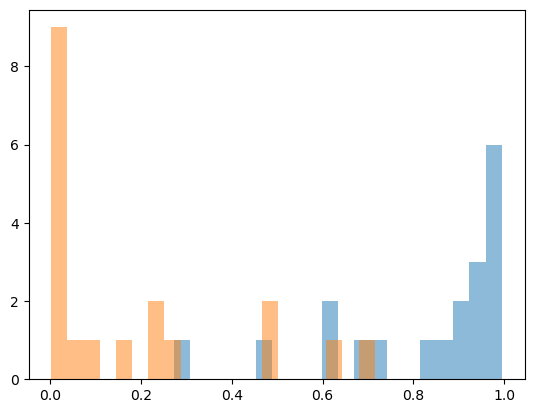

In [29]:
plt.hist(k, 20,alpha=0.5)
plt.hist(t, 20,alpha=0.5)
#plt.xticks([x * 0.05 for x in range(0, 20)])
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [30]:
thresholds = []
for thresh in np.arange(0.01, 0.99, 0.001):
    thresh = np.round(thresh, 3)
    res = f1_score(preds['Actuals'], (preds['Active'] > thresh).astype(int))
    thresholds.append([thresh, res])
    print("F1 score at threshold {0} is {1}".format(thresh, res))
    
thresholds.sort(key=lambda x: x[1], reverse=True)
best_thresh = thresholds[0][0]
print("Best threshold: ", best_thresh, "Best F1: ", thresholds[0][1])

F1 score at threshold 0.01 is 0.7450980392156863
F1 score at threshold 0.011 is 0.7450980392156863
F1 score at threshold 0.012 is 0.7450980392156863
F1 score at threshold 0.013 is 0.7450980392156863
F1 score at threshold 0.014 is 0.7450980392156863
F1 score at threshold 0.015 is 0.76
F1 score at threshold 0.016 is 0.76
F1 score at threshold 0.017 is 0.76
F1 score at threshold 0.018 is 0.76
F1 score at threshold 0.019 is 0.76
F1 score at threshold 0.02 is 0.76
F1 score at threshold 0.021 is 0.76
F1 score at threshold 0.022 is 0.7755102040816326
F1 score at threshold 0.023 is 0.7755102040816326
F1 score at threshold 0.024 is 0.7916666666666666
F1 score at threshold 0.025 is 0.7916666666666666
F1 score at threshold 0.026 is 0.7916666666666666
F1 score at threshold 0.027 is 0.7916666666666666
F1 score at threshold 0.028 is 0.7916666666666666
F1 score at threshold 0.029 is 0.7916666666666666
F1 score at threshold 0.03 is 0.7916666666666666
F1 score at threshold 0.031 is 0.7916666666666666
F

F1 score at threshold 0.194 is 0.8444444444444443
F1 score at threshold 0.195 is 0.8444444444444443
F1 score at threshold 0.196 is 0.8444444444444443
F1 score at threshold 0.197 is 0.8444444444444443
F1 score at threshold 0.198 is 0.8444444444444443
F1 score at threshold 0.199 is 0.8444444444444443
F1 score at threshold 0.2 is 0.8444444444444443
F1 score at threshold 0.201 is 0.8444444444444443
F1 score at threshold 0.202 is 0.8444444444444443
F1 score at threshold 0.203 is 0.8444444444444443
F1 score at threshold 0.204 is 0.8444444444444443
F1 score at threshold 0.205 is 0.8444444444444443
F1 score at threshold 0.206 is 0.8444444444444443
F1 score at threshold 0.207 is 0.8444444444444443
F1 score at threshold 0.208 is 0.8444444444444443
F1 score at threshold 0.209 is 0.8444444444444443
F1 score at threshold 0.21 is 0.8444444444444443
F1 score at threshold 0.211 is 0.8444444444444443
F1 score at threshold 0.212 is 0.8444444444444443
F1 score at threshold 0.213 is 0.8444444444444443
F1 

F1 score at threshold 0.374 is 0.8780487804878049
F1 score at threshold 0.375 is 0.8780487804878049
F1 score at threshold 0.376 is 0.8780487804878049
F1 score at threshold 0.377 is 0.8780487804878049
F1 score at threshold 0.378 is 0.8780487804878049
F1 score at threshold 0.379 is 0.8780487804878049
F1 score at threshold 0.38 is 0.8780487804878049
F1 score at threshold 0.381 is 0.8780487804878049
F1 score at threshold 0.382 is 0.8780487804878049
F1 score at threshold 0.383 is 0.8780487804878049
F1 score at threshold 0.384 is 0.8780487804878049
F1 score at threshold 0.385 is 0.8780487804878049
F1 score at threshold 0.386 is 0.8780487804878049
F1 score at threshold 0.387 is 0.8780487804878049
F1 score at threshold 0.388 is 0.8780487804878049
F1 score at threshold 0.389 is 0.8780487804878049
F1 score at threshold 0.39 is 0.8780487804878049
F1 score at threshold 0.391 is 0.8780487804878049
F1 score at threshold 0.392 is 0.8780487804878049
F1 score at threshold 0.393 is 0.8780487804878049
F1

F1 score at threshold 0.571 is 0.8947368421052632
F1 score at threshold 0.572 is 0.8947368421052632
F1 score at threshold 0.573 is 0.8947368421052632
F1 score at threshold 0.574 is 0.8947368421052632
F1 score at threshold 0.575 is 0.8947368421052632
F1 score at threshold 0.576 is 0.8947368421052632
F1 score at threshold 0.577 is 0.8947368421052632
F1 score at threshold 0.578 is 0.8947368421052632
F1 score at threshold 0.579 is 0.8947368421052632
F1 score at threshold 0.58 is 0.8947368421052632
F1 score at threshold 0.581 is 0.8947368421052632
F1 score at threshold 0.582 is 0.8947368421052632
F1 score at threshold 0.583 is 0.8947368421052632
F1 score at threshold 0.584 is 0.8947368421052632
F1 score at threshold 0.585 is 0.8947368421052632
F1 score at threshold 0.586 is 0.8947368421052632
F1 score at threshold 0.587 is 0.8947368421052632
F1 score at threshold 0.588 is 0.8947368421052632
F1 score at threshold 0.589 is 0.8947368421052632
F1 score at threshold 0.59 is 0.8947368421052632
F1

F1 score at threshold 0.751 is 0.8125000000000001
F1 score at threshold 0.752 is 0.8125000000000001
F1 score at threshold 0.753 is 0.8125000000000001
F1 score at threshold 0.754 is 0.8125000000000001
F1 score at threshold 0.755 is 0.8125000000000001
F1 score at threshold 0.756 is 0.8125000000000001
F1 score at threshold 0.757 is 0.8125000000000001
F1 score at threshold 0.758 is 0.8125000000000001
F1 score at threshold 0.759 is 0.8125000000000001
F1 score at threshold 0.76 is 0.8125000000000001
F1 score at threshold 0.761 is 0.8125000000000001
F1 score at threshold 0.762 is 0.8125000000000001
F1 score at threshold 0.763 is 0.8125000000000001
F1 score at threshold 0.764 is 0.8125000000000001
F1 score at threshold 0.765 is 0.8125000000000001
F1 score at threshold 0.766 is 0.8125000000000001
F1 score at threshold 0.767 is 0.8125000000000001
F1 score at threshold 0.768 is 0.8125000000000001
F1 score at threshold 0.769 is 0.8125000000000001
F1 score at threshold 0.77 is 0.8125000000000001
F1

F1 score at threshold 0.944 is 0.5384615384615384
F1 score at threshold 0.945 is 0.5384615384615384
F1 score at threshold 0.946 is 0.5384615384615384
F1 score at threshold 0.947 is 0.5384615384615384
F1 score at threshold 0.948 is 0.5384615384615384
F1 score at threshold 0.949 is 0.5384615384615384
F1 score at threshold 0.95 is 0.5384615384615384
F1 score at threshold 0.951 is 0.5384615384615384
F1 score at threshold 0.952 is 0.4799999999999999
F1 score at threshold 0.953 is 0.4799999999999999
F1 score at threshold 0.954 is 0.4799999999999999
F1 score at threshold 0.955 is 0.4799999999999999
F1 score at threshold 0.956 is 0.4799999999999999
F1 score at threshold 0.957 is 0.4799999999999999
F1 score at threshold 0.958 is 0.4799999999999999
F1 score at threshold 0.959 is 0.4799999999999999
F1 score at threshold 0.96 is 0.4799999999999999
F1 score at threshold 0.961 is 0.4799999999999999
F1 score at threshold 0.962 is 0.4799999999999999
F1 score at threshold 0.963 is 0.4166666666666667
F1

<h4>Metrics</h4>

In [31]:
conditions = [(preds['Active']>=best_thresh),(preds['Active']<best_thresh)]
values = [1,0]
preds['Preds'] = np.select(conditions, values)
preds

mol    Active  Actuals  \
0   Clc1ccc(-c2cc3c([nH]c(C(=O)NNC(=O)c4oc([N+](=O...  0.926527        1   
1   O=[N+]([O-])c1oc(C(=O)N2CCN(C(=O)c3ccc(COc4ccc...  0.007090        0   
2   O=[N+]([O-])c1oc(C(=O)NNC(=O)c2[nH]c3c(c2)cc(-...  0.715205        0   
3                   S(=O)(=O)(Nc1nc2[nH]ncc2cn1)CCCCF  0.270381        0   
4          S(=O)(=O)(Nc1cc2c(C)n[nH]c2cc1)CCCC(F)(F)F  0.995696        1   
5   O=[N+]([O-])c1oc(C(=O)NC(C)(C)c2sc3c(c2)cccc3)cc1  0.038932        0   
6   O=[N+]([O-])c1oc(C(=O)NNc2nc(Nc3ccccc3)nc(Nc3c...  0.476289        0   
7   O=[N+]([O-])c1oc(C(=O)N2CC(NC(=O)c3[nH]c4c(c3)...  0.704639        1   
8   O=[N+]([O-])c1oc(C(=O)NNC(=O)c2n(C)c3c(c2)cccc...  0.848274        1   
9   O=[N+]([O-])c1oc(C(=O)NNC(=O)c2cc3c(cc2)cccc3)cc1  0.854124        1   
10        S(=O)(=O)(Nc1cc2c(C)c(C(=O)N)[nH]c2cc1)CCCC  0.736351        1   
11  O=[N+]([O-])c1oc(C(=O)NC(C)(C)c2ccc(COc3c(OC)c...  0.014289        0   
12  O=[N+]([O-])c1oc(C(=O)NNC(=O)c2ccc(COc3ccc(OCC...  0.602761        1   
13  Clc1cc2c([nH]c(C(=O)NNC(=O)c3oc([N+](=O)[O-])c...  0.975506        1   
14  O=[N+]([O-])c1oc(/C=N/N=C/2\[NH+]=C(NC3(C)CC3)...  0.247648        0   
15  O=C(C1=C(C2=CC(N(S(CCCC)(=O)=O)[H])=CC=C2N1[H]...  0.021713        0   
16                     O=C(Nc1c2c(ncc1)cccc2)c1nccnc1  0.003590        0   
17  Clc1c(C(=O)NNC(=O)c2oc([N+](=O)[O-])cc2)sc2c1c...  0.962272        1   
18  Clc1c(C(=O)Nc2cc(c(F)cc2)C2=CCC(C(=O)NC)CC2)cc...  0.951544        1   
19  Clc1ccc(OCc2ccc(C(NC(=O)c3oc([N+](=O)[O-])cc3)...  0.105909        0   
20        Clc1c(C(=O)Nc2cc(c(OC)cc2)C2CCCCC2)ccc(F)c1  0.151309        0   
21                          O=C(Nc1ncc(C)cc1)c1nccnc1  0.005149        0   
22  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NC(C)C)[nH]c2cc1)CCCCC  0.478429        0   
23  O=[N+]([O-])c1oc(C(=O)NC(C)(C)c2cc3c(cc2)cccc3...  0.023685        0   
24  O=[N+]([O-])c1oc(C(=O)NNC(=O)c2n(-c3ccccc3)c3c...  0.628974        0   
25  O=[N+]([O-])c1oc(C(=O)N2CCN(C(=O)c3ccc(N4CC[NH...  0.001923        0   
26  O=[N+]([O-])c1oc(/C=N/Nc2nc(Nc3ccccc3)nc(NC3CC...  0.607554        1   
27  Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(C(=O)NCCOC)CC...  0.901215        1   
28   Clc1c(C(=O)Nc2cc(c(OC)cc2)C2=CCC(OC)CC2)ccc(F)c1  0.220439        0   
29  Clc1ccc(Oc2cc3c([nH]c(C(=O)NNC(=O)c4oc([N+](=O...  0.934631        1   
30  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(COC4)CC3)[nH]...  0.272797        1   
31                     O=C(Nc1c2c(cnc1)cccc2)c1nccnc1  0.004941        0   
32  O=[N+]([O-])c1oc(C(=O)N/N=C/2\N=C(NC(C)C)NC(NC...  0.470489        1   
33  O=[N+]([O-])c1oc(/C=N/Nc2nc(NC(C)C)nc(NC(C)C)n...  0.895597        1   
34  Clc1c(C(CN2C(=O)C(C(=O)O)=CC=C2)c2c3c([nH]c2)c...  0.990071        1   
35    S(=O)(=O)(/N=C\1/C=C2N(C)NC=C2C=C/1)CCCC(F)(F)F  0.990300        1   
36  O=[N+]([O-])c1oc(C(=O)N2CCN(C(=O)c3ccc(COc4ccc...  0.004465        0   
37  Clc1c(C(=O)Nc2cc(c(F)cc2)C2=CCC(C(=O)NCCO)CC2)...  0.979892        1   

    Preds  
0       1  
1       0  
2       1  
3       0  
4       1  
5       0  
6       1  
7       1  
8       1  
9       1  
10      1  
11      0  
12      1  
13      1  
14      0  
15      0  
16      0  
17      1  
18      1  
19      0  
20      0  
21      0  
22      1  
23      0  
24      1  
25      0  
26      1  
27      1  
28      0  
29      1  
30      1  
31      0  
32      1  
33      1  
34      1  
35      1  
36      0  
37      1

In [32]:
cf = confusion_matrix(preds['Actuals'], preds['Preds'])

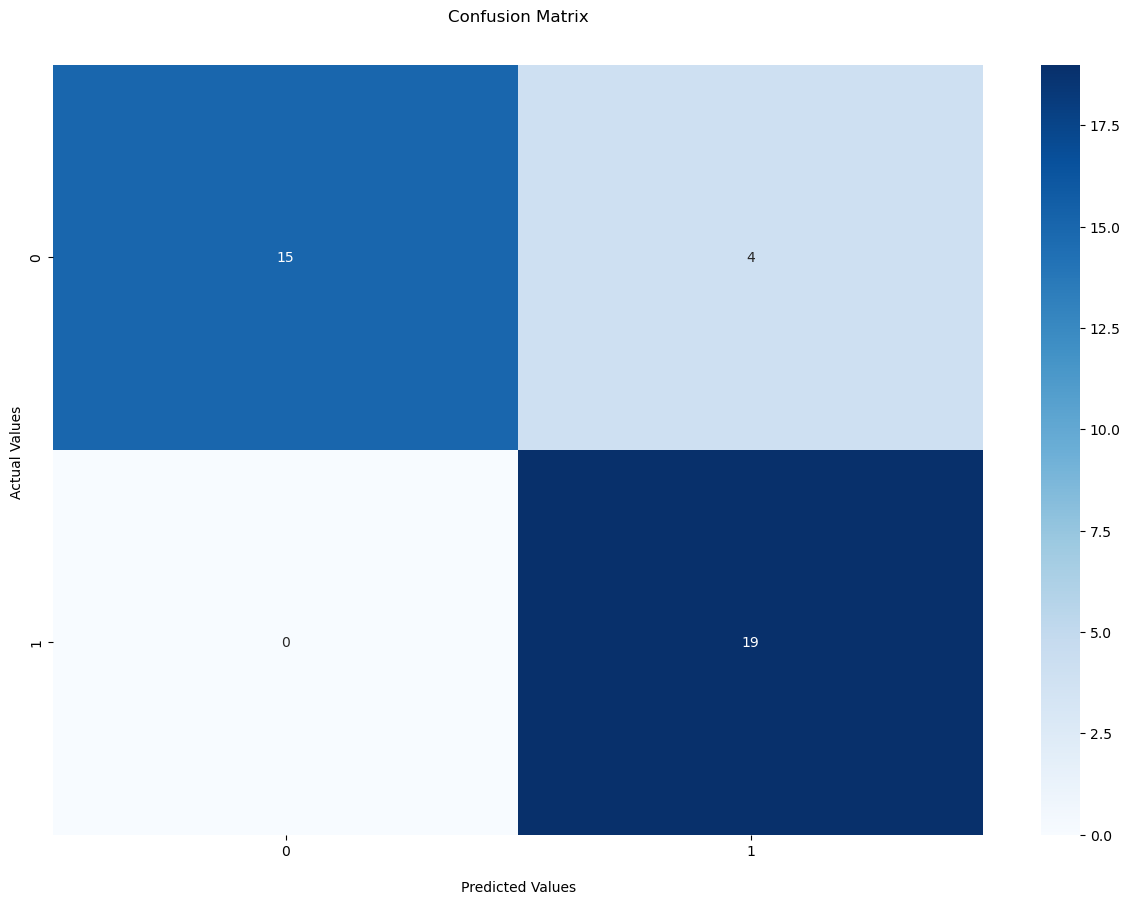

In [33]:
ax = sns.heatmap(cf, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [34]:
labels = ['Balanced Accuracy','F1 Score','Accuracy Score','Precision Score','Recall Score']
metrics = [balanced_accuracy_score(preds['Actuals'], preds['Preds']),f1_score(preds['Actuals'], preds['Preds']),
           accuracy_score(preds['Actuals'], preds['Preds']),precision_score(preds['Actuals'], preds['Preds']),
           recall_score(preds['Actuals'], preds['Preds'])]

In [35]:
metrics_t = pd.DataFrame()
metrics_t['Metrics'] = labels
metrics_t['Values'] = metrics
metrics_t

Metrics    Values
0  Balanced Accuracy  0.894737
1           F1 Score  0.904762
2     Accuracy Score  0.894737
3    Precision Score  0.826087
4       Recall Score  1.000000

<h3>External Set</h3>

In [36]:
target = pd.read_csv("externaltest.csv")
target.head()

Id Number                                             SMILES  AUC0-5h  \
0  JSF-4740  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC(OCc4ccccc4)C3)...    221.0   
1  JSF-4736  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C3)CC4)[nH]c2...    921.0   
2  JSF-4796       Fc1c(CNC(=O)CCC2CN(c3nc(N)nc(C)c3)CCC2)cccc1      3.0   
3  JSF-4739  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC(OCc4ccccc4)C3)...      3.0   
4  JSF-4828  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3c(F)cccc3F)[nH]...   2393.0   

        apol  arorings  ast_fraglike  ast_fraglike_ext  ast_violation  \
0  70.985001         3             0                 0              3   
1  58.715824         2             0                 0              2   
2  59.395618         2             0                 0              2   
3  70.985001         3             0                 0              3   
4  62.016239         3             0                 0              2   

   ast_violation_ext  a_acc  ...  vsa_acid  vsa_base    vsa_don    vsa_hyd  \
0                  5      4  ...         0         0  13.757783  332.52667   
1                  3      3  ...         0         0  13.757783  252.37566   
2                  3      3  ...         0         0  23.425066  264.62952   
3                  5      4  ...         0         0  13.757783  332.52667   
4                  4      3  ...         0         0  19.440359  291.95215   

   vsa_other    vsa_pol     Weight  weinerPath  weinerPol  zagreb  
0  23.055140  61.844982  455.57898        3520         47     170  
1  23.055140  59.341228  375.49298        1801         38     148  
2  39.821667  48.357140  371.45999        2202         38     136  
3  23.055140  61.844982  455.57898        3520         47     170  
4  23.055140  65.023804  435.49500        2768         47     156  

[5 rows x 212 columns]

In [37]:
conditions = [(target['AUC0-5h']>=1000),(target['AUC0-5h']<1000)]
values = [1,0]
target['Active'] = np.select(conditions, values)
ext_set = target[['SMILES','Active']]
ext_set

SMILES  Active
0   S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC(OCc4ccccc4)C3)...       0
1   S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C3)CC4)[nH]c2...       0
2        Fc1c(CNC(=O)CCC2CN(c3nc(N)nc(C)c3)CCC2)cccc1       0
3   S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC(OCc4ccccc4)C3)...       0
4   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3c(F)cccc3F)[nH]...       1
5   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3sccc3)[nH]c2cc1...       0
6   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3ncccc3)[nH]c2cc...       1
7   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NC(C)(C)c3ncccc3)[n...       1
8   S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C(O)CC4)C3)[n...       0
9   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NC(C)c3ncccc3)[nH]c...       1
10  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C(=O)CC4)C3)[...       0
11  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C(F)CC4)C3)[n...       1
12  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3ccncc3)[nH]c2cc...       1
13  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3cnccc3)[nH]c2cc...       1
14  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3nccnc3)[nH]c2cc...       1
15  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3ncccn3)[nH]c2cc...       1
16  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3c(F)cccn3)[nH]c...       1
17  Clc1cc(CNC(=O)c2c(C)c3c([nH]2)ccc(NS(=O)(=O)CC...       1
18  Brc1cnc(CNC(=O)c2c(C)c3c([nH]2)ccc(NS(=O)(=O)C...       1
19  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3ncc(C(F)(F)F)cc...       1

In [38]:
train_ext = ext_set[['SMILES']]
y_ext = ext_set[['Active']]
train_ext.to_csv('exttrain.csv',index=False)

In [39]:
ext_parameters = ['--test_path','exttrain.csv',
                  '--preds_path','preds1.csv',
                  #'--features_generator','rdkit_2d',
                 #'--no_features_scaling',
                 #'--individual_ensemble_predictions',
                  '--checkpoint_dir','checkpoints']

In [40]:
pred1 = chemprop.args.PredictArgs().parse_args(ext_parameters)

In [41]:
y_o = chemprop.train.make_predictions(args=pred1)

Loading training args
Setting molecule featurization parameters to default.
Loading data


20it [00:00, ?it/s]
100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20068.44it/s]


Validating SMILES
Test size = 20



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.73s/it]

Saving predictions to preds1.csv
Elapsed time = 0:00:07


In [42]:
preds_ext = pd.read_csv('preds1.csv')
preds_ext['Actuals'] = y_ext
preds_ext

SMILES    Active  Actuals
0   S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC(OCc4ccccc4)C3)...  0.325609        0
1   S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C3)CC4)[nH]c2...  0.018213        0
2        Fc1c(CNC(=O)CCC2CN(c3nc(N)nc(C)c3)CCC2)cccc1  0.026455        0
3   S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC(OCc4ccccc4)C3)...  0.325609        0
4   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3c(F)cccc3F)[nH]...  0.737309        1
5   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3sccc3)[nH]c2cc1...  0.335876        0
6   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3ncccc3)[nH]c2cc...  0.276451        1
7   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NC(C)(C)c3ncccc3)[n...  0.163193        1
8   S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C(O)CC4)C3)[n...  0.237089        0
9   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NC(C)c3ncccc3)[nH]c...  0.413053        1
10  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C(=O)CC4)C3)[...  0.245206        0
11  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C(F)CC4)C3)[n...  0.051616        1
12  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3ccncc3)[nH]c2cc...  0.179934        1
13  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3cnccc3)[nH]c2cc...  0.223616        1
14  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3nccnc3)[nH]c2cc...  0.222130        1
15  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3ncccn3)[nH]c2cc...  0.299946        1
16  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3c(F)cccn3)[nH]c...  0.530117        1
17  Clc1cc(CNC(=O)c2c(C)c3c([nH]2)ccc(NS(=O)(=O)CC...  0.677369        1
18  Brc1cnc(CNC(=O)c2c(C)c3c([nH]2)ccc(NS(=O)(=O)C...  0.222851        1
19  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3ncc(C(F)(F)F)cc...  0.865360        1

In [43]:
ex_1 = preds_ext.loc[preds_ext['Actuals']==1]
ex_0 = preds_ext.loc[preds_ext['Actuals']==0] 

In [44]:
q = ex_1['Active'].tolist()
w = ex_0['Active'].tolist()

In [45]:
conditions = [(preds_ext['Active']>=best_thresh),(preds_ext['Active']<best_thresh)]
values = [1,0]
preds_ext['Predicted'] = np.select(conditions, values)
preds_ext

SMILES    Active  Actuals  \
0   S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC(OCc4ccccc4)C3)...  0.325609        0   
1   S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C3)CC4)[nH]c2...  0.018213        0   
2        Fc1c(CNC(=O)CCC2CN(c3nc(N)nc(C)c3)CCC2)cccc1  0.026455        0   
3   S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC(OCc4ccccc4)C3)...  0.325609        0   
4   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3c(F)cccc3F)[nH]...  0.737309        1   
5   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3sccc3)[nH]c2cc1...  0.335876        0   
6   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3ncccc3)[nH]c2cc...  0.276451        1   
7   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NC(C)(C)c3ncccc3)[n...  0.163193        1   
8   S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C(O)CC4)C3)[n...  0.237089        0   
9   S(=O)(=O)(Nc1cc2c(C)c(C(=O)NC(C)c3ncccc3)[nH]c...  0.413053        1   
10  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C(=O)CC4)C3)[...  0.245206        0   
11  S(=O)(=O)(Nc1cc2c(C)c(C(=O)N3CC4(C(F)CC4)C3)[n...  0.051616        1   
12  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3ccncc3)[nH]c2cc...  0.179934        1   
13  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3cnccc3)[nH]c2cc...  0.223616        1   
14  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3nccnc3)[nH]c2cc...  0.222130        1   
15  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3ncccn3)[nH]c2cc...  0.299946        1   
16  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3c(F)cccn3)[nH]c...  0.530117        1   
17  Clc1cc(CNC(=O)c2c(C)c3c([nH]2)ccc(NS(=O)(=O)CC...  0.677369        1   
18  Brc1cnc(CNC(=O)c2c(C)c3c([nH]2)ccc(NS(=O)(=O)C...  0.222851        1   
19  S(=O)(=O)(Nc1cc2c(C)c(C(=O)NCc3ncc(C(F)(F)F)cc...  0.865360        1   

    Predicted  
0           1  
1           0  
2           0  
3           1  
4           1  
5           1  
6           1  
7           0  
8           0  
9           1  
10          0  
11          0  
12          0  
13          0  
14          0  
15          1  
16          1  
17          1  
18          0  
19          1

In [46]:
cf_ext = confusion_matrix(preds_ext['Actuals'], preds_ext['Predicted'])

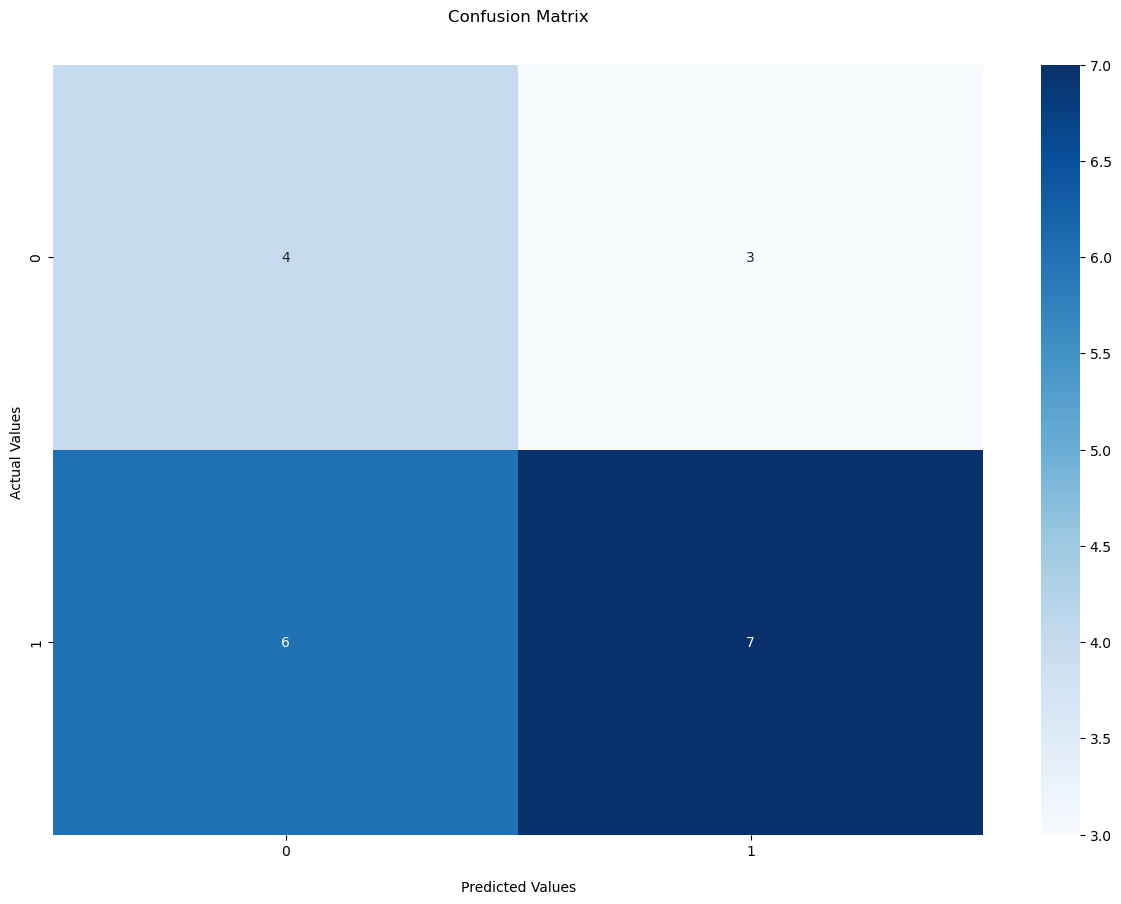

In [47]:
ax = sns.heatmap(cf_ext, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [48]:
labels = ['Balanced Accuracy','F1 Score','Accuracy Score','Precision Score','Recall Score']
metrics = [balanced_accuracy_score(preds_ext['Actuals'], preds_ext['Predicted']),f1_score(preds_ext['Actuals'], preds_ext['Predicted']),
           accuracy_score(preds_ext['Actuals'], preds_ext['Predicted']),precision_score(preds_ext['Actuals'], preds_ext['Predicted']),
           recall_score(preds_ext['Actuals'], preds_ext['Predicted'])]

In [49]:
metrics_et = pd.DataFrame()
metrics_et['Metrics'] = labels
metrics_et['Values'] = metrics
metrics_et

Metrics    Values
0  Balanced Accuracy  0.554945
1           F1 Score  0.608696
2     Accuracy Score  0.550000
3    Precision Score  0.700000
4       Recall Score  0.538462

<h3>Docking Predictions</h3>

In [50]:
dock = pd.read_csv("KasADockedTop1000_2Descriptors.csv")
dock.head()

MoleculeId                                             SMILES  \
0   Z57030687  O=C(Nc1c(Cc2ccccc2)cccc1)C1CCN(c2ncnc3sc4c(c23...   
1   Z56823499  O=C1C(=CNN2C(=O)c3c(sc4c3CCCC4)N=C2)CCCC1=Cc1c...   
2   Z53786665  Clc1ccc(-c2nc3c(c(C(=O)OCC4=Nc5sc6c(c5C(=O)N4)...   
3  Z105382408  Fc1ccc(C(N2CCN(CC3=Nc4sc5c(c4C(=O)N3)CCC5)CC2)...   
4   Z56760621  O=C1NC(c2c3c(nc(-c4ccccc4)c2)cccc3)=Nc2sc3c(c1...   

                                            RDKitMol  \
0  <rdkit.Chem.rdchem.Mol object at 0x000001A7ABF...   
1  <rdkit.Chem.rdchem.Mol object at 0x000001A7ABF...   
2  <rdkit.Chem.rdchem.Mol object at 0x000001A7AF1...   
3  <rdkit.Chem.rdchem.Mol object at 0x000001A7AF1...   
4  <rdkit.Chem.rdchem.Mol object at 0x000001A7AF1...   

                                         molStripped  strippedSalts  Cluster  \
0  O=C(Nc1c(Cc2ccccc2)cccc1)C1CCN(c2ncnc3sc4c(c23...            NaN        0   
1  O=C1C(=CNN2C(=O)c3c(sc4c3CCCC4)N=C2)CCCC1=Cc1c...            NaN        0   
2  Clc1ccc(-c2nc3c(c(C(=O)OCC4=Nc5sc6c(c5C(=O)N4)...            NaN        0   
3  Fc1ccc(C(N2CCN(CC3=Nc4sc5c(c4C(=O)N3)CCC5)CC2)...            NaN        0   
4  O=C1NC(c2c3c(nc(-c4ccccc4)c2)cccc3)=Nc2sc3c(c1...            NaN        0   

        apol  arorings  ast_fraglike  ast_fraglike_ext  ...  vsa_acid  \
0  79.145790         4             0                 0  ...         0   
1  65.380241         2             0                 0  ...         0   
2  71.641861         4             0                 0  ...         0   
3  74.072617         3             0                 0  ...         0   
4  63.671066         4             0                 0  ...         0   

   vsa_base   vsa_don    vsa_hyd  vsa_other    vsa_pol     Weight  weinerPath  \
0         0  5.682576  343.89801  48.930611  30.614649  482.65198        4161   
1         0  9.421040  269.47348  46.198566  42.237457  417.53299        2677   
2         0  5.682576  318.73322  41.352348  44.181568  501.99399        3964   
3         0  5.682576  365.40448  24.140093  24.932074  492.59399        4073   
4         0  5.682576  278.38156  24.140093  30.614649  409.51300        2317   

   weinerPol  zagreb  
0         58     192  
1         50     164  
2         61     196  
3         58     196  
4         54     172  

[5 rows x 215 columns]

In [51]:
dock_smiles = dock[['molStripped']]

In [52]:
dock_smiles.to_csv('dock.csv',index=False)

In [53]:
dock_parameters = ['--test_path','dock.csv',
                  '--preds_path','preds2.csv',
                  #'--features_generator','rdkit_2d',
                 #'--no_features_scaling',
                 #'--individual_ensemble_predictions',
                  '--checkpoint_dir','checkpoints']

In [54]:
pred2 = chemprop.args.PredictArgs().parse_args(dock_parameters)

In [55]:
y_d = chemprop.train.make_predictions(args=pred2)

Loading training args
Setting molecule featurization parameters to default.
Loading data


956it [00:00, 191643.39it/s]
100%|████████████████████████████████████████████████████████████████████████████| 956/956 [00:00<00:00, 159180.41it/s]

Validating SMILES


Test size = 956



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:34<00:00, 34.62s/it]

Saving predictions to preds2.csv
Elapsed time = 0:00:35


In [56]:
preds_dock = pd.read_csv('preds2.csv')
preds_dock

molStripped    Active
0    O=C(Nc1c(Cc2ccccc2)cccc1)C1CCN(c2ncnc3sc4c(c23...  0.008025
1    O=C1C(=CNN2C(=O)c3c(sc4c3CCCC4)N=C2)CCCC1=Cc1c...  0.018122
2    Clc1ccc(-c2nc3c(c(C(=O)OCC4=Nc5sc6c(c5C(=O)N4)...  0.016948
3    Fc1ccc(C(N2CCN(CC3=Nc4sc5c(c4C(=O)N3)CCC5)CC2)...  1.000000
4    O=C1NC(c2c3c(nc(-c4ccccc4)c2)cccc3)=Nc2sc3c(c1...  0.002359
..                                                 ...       ...
951  Clc1cc2nc(N3C(c4sccc4)CC(c4sccc4)=N3)nc(-c3ccc...  0.700464
952  Clc1cc2c(-c3ccccc3)nc(N3C(c4c(C)cccc4)CC(c4cc(...  0.591581
953  Clc1cc2c(-c3ccccc3)nc(N3C(c4ccc(OCC)cc4)CC(c4s...  0.617545
954  Brc1ccc(C2N(c3nc(-c4ccccc4)c4c(n3)ccc(Cl)c4)N=...  0.580670
955  Clc1cc2c(-c3ccccc3)nc(N3C(c4ccccc4)CC(c4occc4)...  0.676540

[956 rows x 2 columns]

In [57]:
conditions = [(preds_dock['Active']>=best_thresh),(preds_dock['Active']<best_thresh)]
values = [1,0]
preds_dock['Predicted'] = np.select(conditions, values)
preds_dock

molStripped    Active  Predicted
0    O=C(Nc1c(Cc2ccccc2)cccc1)C1CCN(c2ncnc3sc4c(c23...  0.008025          0
1    O=C1C(=CNN2C(=O)c3c(sc4c3CCCC4)N=C2)CCCC1=Cc1c...  0.018122          0
2    Clc1ccc(-c2nc3c(c(C(=O)OCC4=Nc5sc6c(c5C(=O)N4)...  0.016948          0
3    Fc1ccc(C(N2CCN(CC3=Nc4sc5c(c4C(=O)N3)CCC5)CC2)...  1.000000          1
4    O=C1NC(c2c3c(nc(-c4ccccc4)c2)cccc3)=Nc2sc3c(c1...  0.002359          0
..                                                 ...       ...        ...
951  Clc1cc2nc(N3C(c4sccc4)CC(c4sccc4)=N3)nc(-c3ccc...  0.700464          1
952  Clc1cc2c(-c3ccccc3)nc(N3C(c4c(C)cccc4)CC(c4cc(...  0.591581          1
953  Clc1cc2c(-c3ccccc3)nc(N3C(c4ccc(OCC)cc4)CC(c4s...  0.617545          1
954  Brc1ccc(C2N(c3nc(-c4ccccc4)c4c(n3)ccc(Cl)c4)N=...  0.580670          1
955  Clc1cc2c(-c3ccccc3)nc(N3C(c4ccccc4)CC(c4occc4)...  0.676540          1

[956 rows x 3 columns]

In [58]:
preds_dock['Predicted'].value_counts()

0    491
1    465
Name: Predicted, dtype: int64

In [59]:
preds_dock.to_csv('Dock_preds.csv')